<a href="https://colab.research.google.com/github/Toto17515/TTT/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

##Library

In [289]:
#Basic
import decimal
import calendar
import math
import statsmodels
import pandas as pd
import numpy as np
import matplotlib as mpl
import statsmodels.api as sm
from itertools import combinations
from math import isnan, nan
from scipy import stats
from datetime import datetime 
from matplotlib import pyplot as plt
from locale import atof, setlocale, LC_NUMERIC
setlocale(LC_NUMERIC, '')

'en_US.UTF-8'

In [290]:

#แสดงกราฟเป็นภาษาไทย
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

##Data

###Database XM

####Forex

In [291]:
EUR_USD = pd.read_csv('https://raw.githubusercontent.com/Toto17515/KKU_Project/main/EUR_USD.csv', header = None)

###Database INVESTING.COM

####Commodity

In [292]:
Gold = pd.read_csv('https://raw.githubusercontent.com/Toto17515/KKU_Project/main/Gold.csv')
Crude_Oil = pd.read_csv('https://raw.githubusercontent.com/Toto17515/KKU_Project/main/Oil.csv')

####Stock

In [293]:
stoxx_600 = pd.read_csv('https://raw.githubusercontent.com/Toto17515/KKU_Project/main/STOXX%20600.csv')
s_and_p_500 = pd.read_csv('https://raw.githubusercontent.com/Toto17515/KKU_Project/main/S%26P%20500.csv')

#Data Cleaning

##Time Frame

In [ ]:
#สร้างกรอบเวลาของข้อมูล
Date = pd.DataFrame({'Date':pd.date_range('2015-01-01','2021-12-31')})
Date.head()

,Date
0,2015-01-01
1,2015-01-02
2,2015-01-03
3,2015-01-04
4,2015-01-05


In [ ]:
#กำหนดชื่อวันของข้อมูล
name = []
for each_row in Date.iterrows():
  name.append(each_row[1]['Date'].day_name())
Date['Day Name'] = pd.Series(name, name = 'Day Name')
Date.head()

,Date,Day Name
0,2015-01-01,Thursday
1,2015-01-02,Friday
2,2015-01-03,Saturday
3,2015-01-04,Sunday
4,2015-01-05,Monday


In [ ]:
#ตัดข้อมูลที่เป็นวันธรรมดา
weekday = []
for each_row in Date.iterrows():
  if each_row[1]['Day Name'] == 'Saturday' or each_row[1]['Day Name'] == 'Sunday':
    weekday.append(False)
  else:
    weekday.append(True)
Date = Date[weekday]
Date.reset_index(drop=True, inplace=True)
Date.head()

,Date,Day Name
0,2015-01-01,Thursday
1,2015-01-02,Friday
2,2015-01-05,Monday
3,2015-01-06,Tuesday
4,2015-01-07,Wednesday


In [ ]:
#เลือกแค่วันที่
Date = Date[['Date']]
Date.head()

,Date
0,2015-01-01
1,2015-01-02
2,2015-01-05
3,2015-01-06
4,2015-01-07


In [ ]:
#จำนวนวันธรรมดา
weekday = Date.shape[0]
weekday 

1827

##Database XM

###Forex

####EUR/USD

In [ ]:
#เรียกดูของข้อมูล
EUR_USD.head()

,0,1,2,3,4,5,6
0,2014.03.21,00:00,1.37793,1.38099,1.37649,1.37921,52590
1,2014.03.24,00:00,1.37993,1.38751,1.37596,1.38374,57015
2,2014.03.25,00:00,1.38375,1.38463,1.37486,1.38252,69979
3,2014.03.26,00:00,1.38250,1.38269,1.37757,1.37844,58027
4,2014.03.27,00:00,1.37843,1.37959,1.37281,1.37404,70767


In [ ]:
#เปลี่ยนชื่อ columns
EUR_USD = EUR_USD.rename(columns={0:'Date', 1:'Time', 2:'Open', 3:'High', 4:'Low', 5:'Close', 6:'Volume'})
EUR_USD.head()

,Date,Time,Open,High,Low,Close,Volume
0,2014.03.21,00:00,1.37793,1.38099,1.37649,1.37921,52590
1,2014.03.24,00:00,1.37993,1.38751,1.37596,1.38374,57015
2,2014.03.25,00:00,1.38375,1.38463,1.37486,1.38252,69979
3,2014.03.26,00:00,1.38250,1.38269,1.37757,1.37844,58027
4,2014.03.27,00:00,1.37843,1.37959,1.37281,1.37404,70767


In [ ]:
#ลือกเฉพาะข้อมูลที่สนใจ
EUR_USD = EUR_USD[['Date', 'Open', 'High', 'Low', 'Close']]
EUR_USD.head()

,Date,Open,High,Low,Close
0,2014.03.21,1.37793,1.38099,1.37649,1.37921
1,2014.03.24,1.37993,1.38751,1.37596,1.38374
2,2014.03.25,1.38375,1.38463,1.37486,1.38252
3,2014.03.26,1.38250,1.38269,1.37757,1.37844
4,2014.03.27,1.37843,1.37959,1.37281,1.37404


In [ ]:
#ตรวจสอบ Messy Format 
EUR_USD.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [ ]:
#ตรวจสอบชนิดข้อมูลของ Date
type(EUR_USD['Date'][0])

str

In [ ]:
#แปลงข้อูล Date from srt to datetime
EUR_USD['Date'] = pd.to_datetime(EUR_USD['Date'],format ='%Y.%m.%d', errors='raise')
EUR_USD.head()

,Date,Open,High,Low,Close
0,2014-03-21,1.37793,1.38099,1.37649,1.37921
1,2014-03-24,1.37993,1.38751,1.37596,1.38374
2,2014-03-25,1.38375,1.38463,1.37486,1.38252
3,2014-03-26,1.38250,1.38269,1.37757,1.37844
4,2014-03-27,1.37843,1.37959,1.37281,1.37404


In [ ]:
#ตรวจสอบ Messy Format 
EUR_USD.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

In [ ]:
#ตรวจสอบจำนวนข้อมูล
if EUR_USD.shape[0] == weekday:
  print('True',)
else:
  print('False, Different ', abs(weekday - EUR_USD.shape[0]) )

False, Different  221


In [ ]:
#สร้าง DataFrame ที่มีข้อมูลเท่ากัน
EURUSD = Date[['Date']]
for i in {'Open', 'High', 'Low', 'Close'}:
  EURUSD[i] = Date['Date'].map(EUR_USD.set_index('Date')[i])
EURUSD = EURUSD[['Date', 'Open', 'High', 'Low', 'Close']]
EURUSD.head()

,Date,Open,High,Low,Close
0,2015-01-01,NaN,NaN,NaN,NaN
1,2015-01-02,1.20480,1.20689,1.19993,1.20002
2,2015-01-05,1.19509,1.19756,1.18577,1.19320
3,2015-01-06,1.19322,1.19680,1.18834,1.18886
4,2015-01-07,1.18889,1.18957,1.18013,1.18387


In [ ]:
#ตรวจสอบจำนวนข้อมูล
if EURUSD.shape[0] == weekday:
  print('True',)
else:
  print('False, Different ', abs(weekday - EURUSD.shape[0]) )

True


In [ ]:
#ตรวจสอบ Missing Value 
EURUSD.isnull().sum()

Date      0
Open     11
High     11
Low      11
Close    11
dtype: int64

In [ ]:
#แทนค่าข้อมูลที่เป็น Missing Value
EURUSD = EURUSD.fillna(method='ffill')
EURUSD.head() 

,Date,Open,High,Low,Close
0,2015-01-01,NaN,NaN,NaN,NaN
1,2015-01-02,1.20480,1.20689,1.19993,1.20002
2,2015-01-05,1.19509,1.19756,1.18577,1.19320
3,2015-01-06,1.19322,1.19680,1.18834,1.18886
4,2015-01-07,1.18889,1.18957,1.18013,1.18387


In [ ]:
#ตรวจสอบ Missing Value 
EURUSD.isnull().sum()

Date     0
Open     1
High     1
Low      1
Close    1
dtype: int64

In [ ]:
#เรียกดู Missing Value
EURUSD[EURUSD.isnull()['Close']]

,Date,Open,High,Low,Close
0,2015-01-01,NaN,NaN,NaN,NaN


In [ ]:
#แทนค่าข้อมูลวันที่ 2015-01-01 ด้วยข้อมูลวันที่ 2014-12-31 จาก XM
add_data =EUR_USD[EUR_USD['Date'] == datetime(day=31,month=12,year=2014)]
add_data.reset_index(inplace= True)
for i in {'Open', 'High', 'Low', 'Close'}:
  EURUSD[i].replace({float("NaN"): add_data[i][0]}, inplace=True)
EURUSD.head(1)

,Date,Open,High,Low,Close
0,2015-01-01,1.21574,1.2169,1.20966,1.20999


In [ ]:
#ตรวจสอบ Missing Value 
EURUSD.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

##Database INVESTING.COM

###Commodity

####Gold

In [ ]:
#เรียกดูของข้อมูล
Gold.head()

,Date,Price,Open,High,Low,Change %
0,"Dec 31, 2021","1,828.39","1,815.44","1,830.58","1,814.15",0.74%
1,"Dec 30, 2021","1,815.01","1,803.99","1,817.44","1,795.78",0.63%
2,"Dec 29, 2021","1,803.66","1,805.59","1,808.16","1,788.94",-0.09%
3,"Dec 28, 2021","1,805.37","1,811.84","1,820.70","1,804.38",-0.31%
4,"Dec 27, 2021","1,810.90","1,808.19","1,813.74","1,802.89",0.15%


In [ ]:
#ลือกเฉพาะข้อมูลที่สนใจ
Gold = Gold[['Date', 'Price']]
Gold.head()

,Date,Price
0,"Dec 31, 2021","1,828.39"
1,"Dec 30, 2021","1,815.01"
2,"Dec 29, 2021","1,803.66"
3,"Dec 28, 2021","1,805.37"
4,"Dec 27, 2021","1,810.90"


In [ ]:
#เปลี่ยนชื่อ columns
Gold = Gold.rename(columns={'Price':'Close'})
Gold.head()

,Date,Close
0,"Dec 31, 2021","1,828.39"
1,"Dec 30, 2021","1,815.01"
2,"Dec 29, 2021","1,803.66"
3,"Dec 28, 2021","1,805.37"
4,"Dec 27, 2021","1,810.90"


In [ ]:
#ตรวจสอบ Messy Format 
Gold.dtypes

Date     object
Close    object
dtype: object

In [ ]:
#ตรวจสอบชนิดข้อมูลของ Date
type(Gold['Date'][0])

str

In [ ]:
#แปลงข้อูล Date from srt to datetime
Gold['Date'] = pd.to_datetime(Gold['Date'],format ='%b %d, %Y', errors='raise')
Gold.head()

,Date,Close
0,2021-12-31,"1,828.39"
1,2021-12-30,"1,815.01"
2,2021-12-29,"1,803.66"
3,2021-12-28,"1,805.37"
4,2021-12-27,"1,810.90"


In [ ]:
#ตรวจสอบชนิดข้อมูลของ Close
type(Gold['Close'][0])

str

In [ ]:
#แปลงข้อมูล Close from string to float
for each_row in Gold.iterrows():
  if type(each_row[1]['Close']) != float:
    Gold.replace({each_row[1]['Close']:atof(each_row[1]['Close'])}, inplace=True)
Gold.head()

,Date,Close
0,2021-12-31,1828.39
1,2021-12-30,1815.01
2,2021-12-29,1803.66
3,2021-12-28,1805.37
4,2021-12-27,1810.90


In [ ]:
#ตรวจสอบ Messy Format 
Gold.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [ ]:
#ตรวจสอบจำนวนข้อมูล
if Gold.shape[0] == weekday:
  print('True',)
else:
  print('False, Different ', abs(weekday -Gold.shape[0]) )

False, Different  3


In [ ]:
#สร้าง DataFrame ที่มีข้อมูลเท่ากัน
XAUUSD = Date[['Date']]
XAUUSD['Close'] = Date['Date'].map(Gold.set_index('Date')['Close'])
XAUUSD.head()

,Date,Close
0,2015-01-01,1181.97
1,2015-01-02,1189.18
2,2015-01-05,1204.45
3,2015-01-06,1219.20
4,2015-01-07,1210.80


In [ ]:
#ตรวจสอบจำนวนข้อมูล
if XAUUSD.shape[0] == weekday:
  print('True',)
else:
  print('False, Different ', abs(weekday - XAUUSD.shape[0]) )

True


In [ ]:
#ตรวจสอบ Missing Value 
XAUUSD.isnull().sum()

Date     0
Close    3
dtype: int64

In [ ]:
#แทนค่าข้อมูลที่เป็น Missing Value
XAUUSD = XAUUSD.fillna(method='ffill')
XAUUSD.head() 

,Date,Close
0,2015-01-01,1181.97
1,2015-01-02,1189.18
2,2015-01-05,1204.45
3,2015-01-06,1219.20
4,2015-01-07,1210.80


In [ ]:
#ตรวจสอบ Missing Value 
XAUUSD.isnull().sum()

Date     0
Close    0
dtype: int64

####Crude Oil

In [ ]:
#เรียกดูของข้อมูล
Crude_Oil.head()

,Date,Price,Open,High,Low,Change %
0,"Dec 31, 2021",75.63,76.59,77.33,75.22,-1.28%
1,"Dec 30, 2021",76.61,76.81,77.71,76.06,-0.30%
2,"Dec 29, 2021",76.84,76.41,77.66,75.67,0.55%
3,"Dec 28, 2021",76.42,76.11,77.22,75.83,0.37%
4,"Dec 27, 2021",76.14,73.62,76.40,72.88,3.44%


In [ ]:
#ลือกเฉพาะข้อมูลที่สนใจ
Crude_Oil = Crude_Oil[['Date', 'Price']]
Crude_Oil.head()

,Date,Price
0,"Dec 31, 2021",75.63
1,"Dec 30, 2021",76.61
2,"Dec 29, 2021",76.84
3,"Dec 28, 2021",76.42
4,"Dec 27, 2021",76.14


In [ ]:
#เปลี่ยนชื่อ columns
Crude_Oil = Crude_Oil.rename(columns={'Price':'Close'})
Crude_Oil.head()

,Date,Close
0,"Dec 31, 2021",75.63
1,"Dec 30, 2021",76.61
2,"Dec 29, 2021",76.84
3,"Dec 28, 2021",76.42
4,"Dec 27, 2021",76.14


In [ ]:
#ตรวจสอบ Messy Format 
Crude_Oil.dtypes

Date      object
Close    float64
dtype: object

In [ ]:
#ตรวจสอบชนิดข้อมูลของ Date
type(Crude_Oil['Date'][0])

str

In [ ]:
#แปลงข้อูล Date from srt to datetime
Crude_Oil['Date'] = pd.to_datetime(Crude_Oil['Date'],format ='%b %d, %Y', errors='raise')
Crude_Oil.head()

,Date,Close
0,2021-12-31,75.63
1,2021-12-30,76.61
2,2021-12-29,76.84
3,2021-12-28,76.42
4,2021-12-27,76.14


In [ ]:
#ตรวจสอบ Messy Format 
Crude_Oil.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [ ]:
#ตรวจสอบจำนวนข้อมูล
if Crude_Oil.shape[0] == weekday:
  print('True',)
else:
  print('False, Different ', abs(weekday - Crude_Oil.shape[0]) )

False, Different  185


In [ ]:
#สร้าง DataFrame ที่มีข้อมูลเท่ากัน
WTIUSD = Date[['Date']]
WTIUSD['Close'] = Date['Date'].map(Crude_Oil.set_index('Date')['Close'])
WTIUSD.head()

,Date,Close
0,2015-01-01,NaN
1,2015-01-02,52.69
2,2015-01-05,49.91
3,2015-01-06,48.03
4,2015-01-07,48.78


In [ ]:
#ตรวจสอบจำนวนข้อมูล
if WTIUSD.shape[0] == weekday:
  print('True',)
else:
  print('False, Different ', abs(weekday - WTIUSD.shape[0]) )

True


In [ ]:
#ตรวจสอบ Missing Value 
WTIUSD.isnull().sum()

Date      0
Close    37
dtype: int64

In [ ]:
#แทนค่าข้อมูลที่เป็น Missing Value
WTIUSD = WTIUSD.fillna(method='ffill')
WTIUSD.head() 

,Date,Close
0,2015-01-01,NaN
1,2015-01-02,52.69
2,2015-01-05,49.91
3,2015-01-06,48.03
4,2015-01-07,48.78


In [ ]:
#ตรวจสอบ Missing Value 
WTIUSD.isnull().sum()

Date     0
Close    1
dtype: int64

In [ ]:
#แทนค่าข้อมูล Close วันที่ 2015-01-01 ด้วยข้อมูลวันที่ 2014-12-31 จาก investing.com
WTIUSD['Close'].replace({float("NaN"): 53.78}, inplace=True)
WTIUSD.head(1)

,Date,Close
0,2015-01-01,53.78


In [ ]:
#ตรวจสอบ Missing Value 
WTIUSD.isnull().sum()

Date     0
Close    0
dtype: int64

###Stock

####STOXX 600




In [ ]:
#เรียกดูของข้อมูล
stoxx_600.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 31, 2021",487.80,487.80,487.80,487.80,-,-0.19%
1,"Dec 30, 2021",488.71,488.15,489.97,488.06,83.71M,0.15%
2,"Dec 29, 2021",487.98,488.88,490.10,486.46,103.05M,-0.11%
3,"Dec 28, 2021",488.50,485.84,488.89,485.76,53.50M,0.62%
4,"Dec 27, 2021",485.49,481.91,485.91,481.33,48.62M,0.62%


In [ ]:
#ลือกเฉพาะข้อมูลที่สนใจ
stoxx = stoxx_600[['Date', 'Price']]
stoxx.head()

,Date,Price
0,"Dec 31, 2021",487.80
1,"Dec 30, 2021",488.71
2,"Dec 29, 2021",487.98
3,"Dec 28, 2021",488.50
4,"Dec 27, 2021",485.49


In [ ]:
#เปลี่ยนชื่อ columns
stoxx = stoxx.rename(columns={'Price':'Close'})
stoxx.head()

,Date,Close
0,"Dec 31, 2021",487.80
1,"Dec 30, 2021",488.71
2,"Dec 29, 2021",487.98
3,"Dec 28, 2021",488.50
4,"Dec 27, 2021",485.49


In [ ]:
#ตรวจสอบ Messy Format 
stoxx.dtypes

Date      object
Close    float64
dtype: object

In [ ]:
#ตรวจสอบชนิดข้อมูลของ Date
type(stoxx['Date'][0])

str

In [ ]:
#แปลงข้อูล Date from srt to datetime
stoxx['Date'] = pd.to_datetime(stoxx['Date'],format ='%b %d, %Y', errors='raise')
stoxx.head()

,Date,Close
0,2021-12-31,487.80
1,2021-12-30,488.71
2,2021-12-29,487.98
3,2021-12-28,488.50
4,2021-12-27,485.49


In [ ]:
#ตรวจสอบ Messy Format 
stoxx.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [ ]:
#ตรวจสอบจำนวนข้อมูล
if stoxx.shape[0] == weekday:
  print('True')
else:
  print('False, Different ', abs(weekday - stoxx.shape[0]) )

False, Different  28


In [ ]:
#สร้าง DataFrame ที่มีข้อมูลเท่ากัน
STOXX = Date[['Date']]
STOXX['Close'] = Date['Date'].map(stoxx.set_index('Date')['Close'])
STOXX.head()

,Date,Close
0,2015-01-01,NaN
1,2015-01-02,341.33
2,2015-01-05,333.99
3,2015-01-06,331.61
4,2015-01-07,333.20


In [ ]:
#ตรวจสอบจำนวนข้อมูล
if STOXX.shape[0] == weekday:
  print('True')
else:
  print('False, Different ', abs(weekday - STOXX.shape[0]) )

True


In [ ]:
#ตรวจสอบ Missing Value
STOXX.isnull().sum()

Date      0
Close    28
dtype: int64

In [ ]:
#แทนค่าข้อมูล
STOXX = STOXX.fillna(method='ffill')
STOXX.head() 

,Date,Close
0,2015-01-01,NaN
1,2015-01-02,341.33
2,2015-01-05,333.99
3,2015-01-06,331.61
4,2015-01-07,333.20


In [ ]:
#ตรวจสอบ Missing Value
STOXX.isnull().sum()

Date     0
Close    1
dtype: int64

In [ ]:
#เรียกดู Missing Value
STOXX[STOXX.isnull()['Close']]

,Date,Close
0,2015-01-01,NaN


In [ ]:
#แทนค่าข้อมูลวันที่ 2015-01-01 ด้วยข้อมูลวันที่ 2014-12-31 จาก investing.com
STOXX['Close'].replace({float("NaN"): 342.54}, inplace=True)
STOXX.head(1)

,Date,Close
0,2015-01-01,342.54


In [ ]:
#ตรวจสอบ Missing Value
STOXX.isnull().sum()

Date     0
Close    0
dtype: int64

####S&P 500

In [ ]:
#เรียกดูของข้อมูล
s_and_p_500.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 31, 2021","4,766.18","4,775.21","4,786.83","4,765.75",-,-0.26%
1,"Dec 30, 2021","4,778.73","4,794.23","4,808.93","4,775.33",-,-0.30%
2,"Dec 29, 2021","4,793.06","4,788.64","4,804.06","4,778.08",-,0.14%
3,"Dec 28, 2021","4,786.36","4,795.49","4,807.02","4,780.04",-,-0.10%
4,"Dec 27, 2021","4,791.19","4,733.99","4,791.49","4,733.99",-,1.38%


In [ ]:
#ลือกเฉพาะข้อมูลที่สนใจ
spx = s_and_p_500[['Date', 'Price']]
spx.head()

,Date,Price
0,"Dec 31, 2021","4,766.18"
1,"Dec 30, 2021","4,778.73"
2,"Dec 29, 2021","4,793.06"
3,"Dec 28, 2021","4,786.36"
4,"Dec 27, 2021","4,791.19"


In [ ]:
#เปลี่ยนชื่อ columns
spx = spx.rename(columns={'Price':'Close'})
spx.head()

,Date,Close
0,"Dec 31, 2021","4,766.18"
1,"Dec 30, 2021","4,778.73"
2,"Dec 29, 2021","4,793.06"
3,"Dec 28, 2021","4,786.36"
4,"Dec 27, 2021","4,791.19"


In [ ]:
#ตรวจสอบ Messy Format 
spx.dtypes

Date     object
Close    object
dtype: object

In [ ]:
#ตรวจสอบชนิดข้อมูลของ Date
type(spx['Date'][0])

str

In [ ]:
#แปลงข้อูล Date from srt to datetime
spx['Date'] = pd.to_datetime(spx['Date'],format ='%b %d, %Y', errors='raise')
spx.head()

,Date,Close
0,2021-12-31,"4,766.18"
1,2021-12-30,"4,778.73"
2,2021-12-29,"4,793.06"
3,2021-12-28,"4,786.36"
4,2021-12-27,"4,791.19"


In [ ]:
#ตรวจสอบชนิดข้อมูลของ Close
type(spx['Close'][0])

str

In [ ]:
#แปลงข้อมูล Close from string to float
for each_row in spx.iterrows():
  if type(each_row[1]['Close']) != float:
    spx.replace({each_row[1]['Close']:atof(each_row[1]['Close'])}, inplace=True)
spx.head()

,Date,Close
0,2021-12-31,4766.18
1,2021-12-30,4778.73
2,2021-12-29,4793.06
3,2021-12-28,4786.36
4,2021-12-27,4791.19


In [ ]:
#ตรวจสอบ Messy Format 
spx.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [ ]:
#ตรวจสอบจำนวนข้อมูล
if spx.shape[0] == weekday:
  print('True')
else:
  print('False, Different ', abs(weekday - spx.shape[0]) )

False, Different  64


In [ ]:
#สร้าง DataFrame ที่มีข้อมูลเท่ากัน
SPX = Date[['Date']]
SPX['Close'] = Date['Date'].map(spx.set_index('Date')['Close'])
SPX.head() 

,Date,Close
0,2015-01-01,NaN
1,2015-01-02,2058.20
2,2015-01-05,2020.58
3,2015-01-06,2002.61
4,2015-01-07,2025.90


In [ ]:
#ตรวจสอบจำนวนข้อมูล
if SPX.shape[0] == weekday:
  print('True')
else:
  print('False, Different ', abs(weekday - SPX.shape[0]) )

True


In [ ]:
#ตรวจสอบ Missing Value
SPX.isnull().sum()

Date      0
Close    64
dtype: int64

In [ ]:
#แทนค่าข้อมูล
SPX = SPX.fillna(method='ffill')
SPX.head() 

,Date,Close
0,2015-01-01,NaN
1,2015-01-02,2058.20
2,2015-01-05,2020.58
3,2015-01-06,2002.61
4,2015-01-07,2025.90


In [ ]:
#ตรวจสอบ Missing Value
SPX.isnull().sum()

Date     0
Close    1
dtype: int64

In [ ]:
#เรียกดู Missing Value
SPX[SPX.isnull()['Close']]

,Date,Close
0,2015-01-01,NaN


In [ ]:
#แทนค่าข้อมูลวันที่ 2015-01-01 ด้วยข้อมูลวันที่ 2014-12-31 จาก investing.com
SPX['Close'].replace({float("NaN"): 2058.90}, inplace=True)
SPX.head()

,Date,Close
0,2015-01-01,2058.90
1,2015-01-02,2058.20
2,2015-01-05,2020.58
3,2015-01-06,2002.61
4,2015-01-07,2025.90


In [ ]:
#ตรวจสอบ Missing Value
SPX.isnull().sum()

Date     0
Close    0
dtype: int64

#Define

Variable
* `Y1` แทน อัตราแลกเปลี่ยนสูงสุดของวันของ EURUSD 
* `Y2` แทน อัตราแลกเปลี่ยนต่ำสุดของวันของ EURUSD 
* `Y3` แทน อัตราแลกเปลี่ยนเมื่อสิ้นสุดวันของ EURUSD 
* `X1` แทน ราคาทองคำ (USD)
* `X2` แทน ราคาน้ำมันดิบ  (USD)
* `X3` แทน ดัชนี STOXX 600 
* `X4` แทน ดัชนี S&P 500

Parameter

*   `A`   แทน ค่าที่น้อยที่สุดของค่าผลต่างระหว่างค่าการพยากรณ์จากตัวแบบอนุกรมเวลากับค่าจริงที่พยากรณ์ว่าจะเป็น Up แล้วมีผลลัพธ์ Down
*   `B` แทน ค่าที่มากที่สุดของค่าผลต่างระหว่างค่าการพยากรณ์จากตัวแบบอนุกรมเวลากับค่าจริงที่พยากรณ์ว่าจะเป็น Down แล้วมีผลลัพธ์ Up
*   `C` แทน ค่าพารามิเตอร์ของ RSI ที่แสดงถึงว่ามีการซื้อมากกว่าการขาย
*   `D` แทน ค่าพารามิเตอร์ของ RSI ที่แสดงถึงว่ามีการขายมากกว่าซื้อมาก
*   `E` แทน ค่าพารามิเตอร์ของ William %R ที่แสดงถึงว่ามีการซื้อมากกว่าการขาย
*   `F` แทน ค่าพารามิเตอร์ของ William %R ที่แสดงถึงว่ามีการขายมากกว่าการซื้อ
*   `G` แทน ค่าบวกเพิ่ม AF ของ PSAR
*   `H` แทน ค่า AF สูงสุดของ PSAR 
*   `I` แทน จำนวนกรอบเวลาของ EMA
*   `J` แทน จำนวนกรอบเวลาของ RSI
*   `K` แทน จำนวนกรอบเวลาของ Williams %R 



Model

* `Model1` ตัวแปรภายนอก คือ X1

* `Model2` ตัวแปรภายนอก คือ X2

* `Model3` ตัวแปรภายนอก คือ X3

* `Model4` ตัวแปรภายนอก คือ X4

* `Model5` ตัวแปรภายนอก คือ X1 และ X2

* `Model6` ตัวแปรภายนอก คือ X1 และ X3

* `Model7` ตัวแปรภายนอก คือ X1 และ X4

* `Model8` ตัวแปรภายนอก คือ X2 และ X3

* `Model9` ตัวแปรภายนอก คือ X2 และ X4

* `Model10` ตัวแปรภายนอก คือ X3 และ X4

* `Model11` ตัวแปรภายนอก คือ X1, X2 และ X3 

* `Model12` ตัวแปรภายนอก คือ X1, X2 และ X4

* `Model13` ตัวแปรภายนอก คือ X1, X3 และ X4

* `Model14` ตัวแปรภายนอก คือ X2, X3 และ X4

* `Model15` ตัวแปรภายนอก คือ X1, X2, X3 และ X4











































































































































































































































































































































































































































































































































































































































































































































































































#Calculate Indicator 

เลือกหาค่าพารามิเตอร์จากข้อมูลตั้งแต่ 01/01/2015 ถึง 31/12/2020

In [ ]:
EURUSD[EURUSD['Date'] <= datetime(2020,12,31)]['Date'].count()

1566

##EMA

###Calculate

สร้าง Algorithm ของ EMA

In [ ]:
#สร้าง Data Frame สำหรับทดสอบ EMA
Close_EMA = [22.27,22.19,22.08,22.17,22.18,22.13,22.23,22.43,22.24,22.29,22.15,22.39,22.38,22.61,23.36,
             24.05,23.75,23.83,23.95,23.63,23.82,23.87,23.65,23.19,23.10,23.33,22.68,23.10,22.40,22.17]

In [ ]:
#EMA Indicator
def EMAIndicator(Close, I):
  if I > 1 and len(Close) > 1:
    return I
  else:
    return print('error')  

In [ ]:
#test
EMAIndicator(Close_EMA, 1)

error


In [ ]:
#test
EMAIndicator(Close_EMA[:1], 5)

error


In [ ]:
#test
EMAIndicator(Close_EMA, 10)

10

In [ ]:
#EMA Indicator
def EMAIndicator(Close, I):
  if I > 1 and len(Close) > 1:
    EMA = []
    for a in range(I-1):
      EMA.append(float('NaN'))
    return EMA
  else:
    return print('error')  

In [ ]:
#test
EMAIndicator(Close_EMA, 10)

[nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [ ]:
#EMA Indicator
def EMAIndicator(Close, I):
  if I > 1 and len(Close) > 1:
    EMA = []
    for a in range(I-1):
      EMA.append(float('NaN'))
    alpha = 2/(I+1)
    ws = 0
    wc = 0
    for b in range(I):
      ws = ws + Close[b]*(1-alpha)**b
      wc = wc + (1-alpha)**b
    EMA.append(ws/wc)
    return EMA
  else:
    return print('error')  

In [ ]:
#EMA Indicator
def EMAIndicator(Close, I):
  if I > 1 and len(Close) > 1:
    EMA = []
    for a in range(I-1):
      EMA.append(float('NaN'))
    alpha = 2/(I+1)
    ws = 0
    wc = 0
    for b in range(I):
      ws = ws + Close[b]*(1-alpha)**b
      wc = wc + (1-alpha)**b
    EMA.append(ws/wc)
    return alpha
  else:
    return print('error')

In [ ]:
#test
EMAIndicator(Close_EMA, 10) #ค่าจริง 22.25

0.18181818181818182

In [ ]:
#EMA Indicator
def EMAIndicator(Close, I):
  if I > 1 and len(Close) > 1:
    EMA = []
    for a in range(I-1):
      EMA.append(float('NaN'))
    alpha = 2/(I+1)
    ws = 0
    wc = 0
    for b in range(I):
      ws = ws + Close[b]*(1-alpha)**b
      wc = wc + (1-alpha)**b
    EMA.append(ws/wc)
    for c in range(len(Close)-I):
      EMA.append(EMA[c+I-1]+alpha*(Close[c+I]-EMA[c+I-1]))
    return EMA
  else:
    return print('error')  

In [ ]:
#test
EMAIndicator(Close_EMA, 10)

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 22.203927986400135,
 22.194122897963748,
 22.229736916515794,
 22.257057477149285,
 22.321228844940325,
 22.510096327678447,
 22.790078813555095,
 22.96460993836326,
 23.121953585933575,
 23.272507479400197,
 23.337506119509253,
 23.42523227959848,
 23.5060991378533,
 23.532262930970884,
 23.470033307157998,
 23.40275452403836,
 23.389526428758657,
 23.26052162352981,
 23.231335873797118,
 23.080183896743097,
 22.91469591551708]

###Find

สร้าง Algorithm เพือหาค่าพารามิเตอร์

In [ ]:
#ค่าจริง
EURUSD[:30]

,Date,Open,High,Low,Close
0,2015-01-01,1.21574,1.21690,1.20966,1.20999
1,2015-01-02,1.20480,1.20689,1.19993,1.20002
2,2015-01-05,1.19509,1.19756,1.18577,1.19320
3,2015-01-06,1.19322,1.19680,1.18834,1.18886
4,2015-01-07,1.18889,1.18957,1.18013,1.18387
5,2015-01-08,1.18386,1.18466,1.17534,1.17910
6,2015-01-09,1.17908,1.18452,1.17617,1.18396
7,2015-01-12,1.18452,1.18700,1.17853,1.18331
8,2015-01-13,1.18321,1.18589,1.17526,1.17719
9,2015-01-14,1.17715,1.18456,1.17266,1.17878


In [ ]:
#Algorithm หาค่าพารามิเตอร์
def Parameter_EMA(EURUSD_Close, I, N):
  ema = EMAIndicator(EURUSD_Close[:N], I)
  return ema

In [ ]:
#ลองคำนวณ EMA ย้อนหลัง 5 วัน จำนวน 30 ตัวอย่าง
Parameter_EMA(EURUSD['Close'], 5, 30)

[nan,
 nan,
 nan,
 nan,
 1.2001897156398107,
 1.1931598104265404,
 1.1900932069510268,
 1.1878321379673513,
 1.1842847586449008,
 1.1824498390966005,
 1.1760132260644003,
 1.1693454840429336,
 1.1664369893619557,
 1.1625846595746372,
 1.1620164397164248,
 1.153494293144283,
 1.1424695287628555,
 1.136233019175237,
 1.1368120127834913,
 1.1340813418556608,
 1.1333442279037738,
 1.1316194852691825,
 1.1324263235127883,
 1.1376042156751922,
 1.1365361437834616,
 1.1402274291889745,
 1.1372616194593164,
 1.1356144129728776,
 1.1344029419819184,
 1.1340719613212789]

In [ ]:
#จำนวนผลลัพธ์การคำนวณ EMA ย้อนหลัง 5 วัน จำนวน 30 ตัวอย่าง
len(Parameter_EMA(EURUSD['Close'], 5, 30))

30

In [ ]:
#Algorithm หาค่าพารามิเตอร์
def Parameter_EMA(EURUSD_Close, I, N):
  ema = EMAIndicator(EURUSD_Close[:N], I)
  ema_trend = []
  return EURUSD_Close[:N][4] 

In [ ]:
#ลองเรียกข้อมูลจริงที่ 5
Parameter_EMA(EURUSD['Close'], 5, 30)

1.18387

In [ ]:
#Algorithm หาค่าพารามิเตอร์
def Parameter_EMA(EURUSD_Close, I, N):
  ema = EMAIndicator(EURUSD_Close[:N], I)
  ema_trend = []
  return ema[4]

In [ ]:
#ลองเรียก EMA วันที่ 5
Parameter_EMA(EURUSD['Close'], 5, 30)

1.2001897156398107

In [ ]:
#Algorithm หาค่าพารามิเตอร์
def Parameter_EMA(EURUSD_Close, I, N):
  ema = EMAIndicator(EURUSD_Close[:N], I)
  ema_trend = []
  return EURUSD_Close[:N][29] 

In [ ]:
#ลองเรียกค่าจริงวันที่ 30
Parameter_EMA(EURUSD['Close'], 5, 30)

1.13341

In [ ]:
#Algorithm หาค่าพารามิเตอร์
def Parameter_EMA(EURUSD_Close, I, N):
  ema = EMAIndicator(EURUSD_Close[:N], I)
  ema_trend = []
  return ema[29]

In [ ]:
#ลองเรียก EMA วันที่ 30
Parameter_EMA(EURUSD['Close'], 5, 30)

1.1340719613212789

In [ ]:
#Algorithm หาค่าพารามิเตอร์
def Parameter_EMA(EURUSD_Close, I, N):
  ema = EMAIndicator(EURUSD_Close[:N], I)
  ema_trend = []
  for i in range(N):
    if EURUSD_Close[:N][i] > ema[i]: ema_trend.append('Up')
    elif EURUSD_Close[:N][i] < ema[i]: ema_trend.append('Down')
    else: ema_trend.append('Sideway')
  return pd.DataFrame({'Trend':ema_trend,'Close':EURUSD['Date'][:30]})

In [ ]:
#ลองหาแนวโน้ม EMA ย้อนหลัง 5 วัน จำนวน 30 ตัวอย่าง
Parameter_EMA(EURUSD['Close'], 5, 30)

,Trend,Close
0,Sideway,2015-01-01
1,Sideway,2015-01-02
2,Sideway,2015-01-05
3,Sideway,2015-01-06
4,Down,2015-01-07
5,Down,2015-01-08
6,Down,2015-01-09
7,Down,2015-01-12
8,Down,2015-01-13
9,Down,2015-01-14


In [ ]:
#เรียกวันที่
EURUSD[:30]['Date'][15]

Timestamp('2015-01-22 00:00:00')

In [ ]:
#Algorithm หาค่าพารามิเตอร์
def Parameter_EMA(EURUSD_Date, EURUSD_Close, I, N):
  ema = EMAIndicator(EURUSD_Close[:N], I)
  ema_trend = []
  for i in range(N):
    if EURUSD_Close[:N][i] > ema[i]: ema_trend.append('Up')
    elif EURUSD_Close[:N][i] < ema[i]: ema_trend.append('Down')
    else: ema_trend.append('Sideway')
  signal_trend_ema = []; signal_start_ema = []; signal_end_ema = []
  for j in range(N):
    if j > 1:
      if ema_trend[j] != 'Sideway' and ema_trend[j-1] != ema_trend[j]:
        signal_trend_ema.append(ema_trend[j])
        signal_start_ema.append(EURUSD_Date[:N][j])
        if len(signal_trend_ema) > 1:
          signal_end_ema.append(EURUSD_Date[:N][j])
    if j == N-1: signal_end_ema.append(EURUSD_Date[:N][j])
  signal = pd.DataFrame({'Trend':signal_trend_ema, 'Start':signal_start_ema,'End':signal_end_ema})       
  return signal 

In [ ]:
#ลองเรียกสัญญาณการซื้อขาย
Parameter_EMA(EURUSD['Date'],EURUSD['Close'], 5, 30)

,Trend,Start,End
0,Down,2015-01-07,2015-01-27
1,Up,2015-01-27,2015-01-28
2,Down,2015-01-28,2015-02-02
3,Up,2015-02-02,2015-02-04
4,Down,2015-02-04,2015-02-05
5,Up,2015-02-05,2015-02-06
6,Down,2015-02-06,2015-02-11


In [ ]:
#ทดสอบหา pip
a = EURUSD['Close'][EURUSD['Date']==datetime(2015,1,7)]
b = EURUSD['Close'][EURUSD['Date']==datetime(2015,1,27)]
print(a.values)
print(b.values)

[1.18387]
[1.13797]


In [ ]:
(1.18387-1.13797)*10**5

4590.0000000000055

In [ ]:
#Algorithm หาค่าพารามิเตอร์
def Parameter_EMA(EURUSD_Close, I, N):
  ema = EMAIndicator(EURUSD_Close[:N], I)
  ema_trend = []
  for i in range(N):
    if EURUSD_Close[:N][i] > ema[i]: ema_trend.append('Up')
    elif EURUSD_Close[:N][i] < ema[i]: ema_trend.append('Down')
    else: ema_trend.append('Sideway')
  signal_trend_ema = []; signal_start_ema = []; signal_end_ema = []
  for j in range(N):
    if j > 1:
      if ema_trend[j] != 'Sideway' and ema_trend[j-1] != ema_trend[j]:
        signal_trend_ema.append(ema_trend[j])
        signal_start_ema.append(EURUSD_Close[:N][j])
        if len(signal_trend_ema) > 1:
          signal_end_ema.append(EURUSD_Close[:N][j])
    if j == N-1: signal_end_ema.append(EURUSD_Close[:N][j])
  pip = []
  for k in range(len(signal_trend_ema)):
    if signal_trend_ema[k] == 'Up':
      pip.append((signal_end_ema[k] - signal_start_ema[k])*10**5)
    else:     
      pip.append((signal_start_ema[k] - signal_end_ema[k])*10**5)
  return pip

In [ ]:
#ลองเรียก pip
Parameter_EMA(EURUSD['Close'], 5, 30)

[4590.0000000000055,
 -934.9999999999969,
 -541.9999999999981,
 36.0000000000138,
 -1320.9999999999943,
 -1628.0000000000073,
 -208.00000000000819]

In [ ]:
#Algorithm หาค่าพารามิเตอร์
def Parameter_EMA(EURUSD_Close, I, N):
  ema = EMAIndicator(EURUSD_Close[:N], I)
  ema_trend = []
  for i in range(N):
    if EURUSD_Close[:N][i] > ema[i]: ema_trend.append('Up')
    elif EURUSD_Close[:N][i] < ema[i]: ema_trend.append('Down')
    else: ema_trend.append('Sideway')
  signal_trend_ema = []; signal_start_ema = []; signal_end_ema = []
  for j in range(N):
    if j > 1:
      if ema_trend[j] != 'Sideway' and ema_trend[j-1] != ema_trend[j]:
        signal_trend_ema.append(ema_trend[j])
        signal_start_ema.append(EURUSD_Close[:N][j])
        if len(signal_trend_ema) > 1:
          if signal_trend_ema[len(signal_trend_ema)-2] != ema_trend[j]:
            signal_end_ema.append(EURUSD_Close[:N][j])
    if j == N-1: signal_end_ema.append(EURUSD_Close[:N][j])
  pip = []
  for k in range(len(signal_trend_ema)):
    if signal_trend_ema[k] == 'Up':
      pip.append((signal_end_ema[k] - signal_start_ema[k])*10**5)
    else:     
      pip.append((signal_start_ema[k] - signal_end_ema[k])*10**5)
  return round(sum(pip))

In [ ]:
# pip รวม
Parameter_EMA(EURUSD['Close'], 5, 30)

-8

In [ ]:
#Algorithm หาค่าพารามิเตอร์
def Parameter_EMA(EURUSD_Close, listI, N):
  Max ={}
  for I in listI:
    ema = EMAIndicator(EURUSD_Close[:N], I)
    ema_trend = []
    for i in range(N):
      if EURUSD_Close[:N][i] > ema[i]: ema_trend.append('Up')
      elif EURUSD_Close[:N][i] < ema[i]: ema_trend.append('Down')
      else: ema_trend.append('Sideway')
    signal_trend_ema = []; signal_start_ema = []; signal_end_ema = []
    for j in range(N):
      if j > 1:
        if ema_trend[j] != 'Sideway' and ema_trend[j-1] != ema_trend[j]:
          signal_trend_ema.append(ema_trend[j])
          signal_start_ema.append(EURUSD_Close[:N][j])
          if len(signal_trend_ema) > 1:
            if signal_trend_ema[len(signal_trend_ema)-2] != ema_trend[j]:
              signal_end_ema.append(EURUSD_Close[:N][j])
      if j == N-1: signal_end_ema.append(EURUSD_Close[:N][j])
    pip = []
    for k in range(len(signal_trend_ema)):
      if signal_trend_ema[k] == 'Up':
        pip.append((signal_end_ema[k] - signal_start_ema[k])*10**5)
      else:     
        pip.append((signal_start_ema[k] - signal_end_ema[k])*10**5)
    Max[round(sum(pip))] = 'I = '+str(I)+' give '+str(round(sum(pip)))+' pip.'
  return Max[max(Max.keys())]

หาค่าพารามิเตอร์ EMA

In [ ]:
listI = list(np.arange(3,21,1))
Parameter_EMA(EURUSD['Close'], listI, 1566)

KeyboardInterrupt: ignored

Precision


In [ ]:
#Algorithm หาความถูกต้อง 
def Precision_EMA(EURUSD_Close, I, N):
  ema = EMAIndicator(EURUSD_Close[:N], I)
  ema_trend = []
  for i in range(N):
    if EURUSD_Close[:N][i] > ema[i]: ema_trend.append('Up')
    elif EURUSD_Close[:N][i] < ema[i]: ema_trend.append('Down')
    else: ema_trend.append('Sideway')
  signal_trend_ema = []; signal_start_ema = []; signal_end_ema = []
  for j in range(N):
    if j > 1:
      if ema_trend[j] != 'Sideway' and ema_trend[j-1] != ema_trend[j]:
        signal_trend_ema.append(ema_trend[j])
        signal_start_ema.append(EURUSD_Close[:N][j])
        if len(signal_trend_ema) > 1:
          if signal_trend_ema[len(signal_trend_ema)-2] != ema_trend[j]:
            signal_end_ema.append(EURUSD_Close[:N][j])
    if j == N-1: signal_end_ema.append(EURUSD_Close[:N][j])
  pip = []
  for k in range(len(signal_trend_ema)):
    if signal_trend_ema[k] == 'Up':
      pip.append((signal_end_ema[k] - signal_start_ema[k])*10**5)
    else:     
      pip.append((signal_start_ema[k] - signal_end_ema[k])*10**5)
  precision = 0
  for l in pip:
    if l > 0: precision+=1
  return precision/len(pip)*100

In [ ]:
Precision_EMA(EURUSD['Close'], 4, 1566)

##PSAR

###Calculate

สร้าง Algorithm ของ PSAR

In [ ]:
#สร้าง Data Frame สำหรับทดสอบ PSAR
High_PSAR = [51.00,52.00,52.35,52.10,51.80,52.10,52.50,52.80,52.50,53.50,53.50,53.80,54.20,53.40,53.50,54.40,
             55.20,55.70,57.00,57.50,58.00,57.70,58.00,57.50,57.00,56.70,57.50,56.70,56.00,56.20,54.80,55.50,
             54.70,54.00,52.50,51.00,51.50,51.70]
Low_PSAR = [50.00,51.00,51.50,51.00,50.50,51.25,51.70,51.85,51.50,52.30,52.50,53.00,53.50,52.50,52.10,53.00,
            54.00,55.00,56.00,56.50,57.00,56.50,57.30,56.70,56.30,56.20,56.00,55.50,55.00,54.90,54.00,54.50,
            53.80,53.00,51.50,50.00,50.50,50.20]    
Close_PSAR = [50,51,52,52,51,52,52,52,52,53,53,53,54,53,53,54,55,55,56,57,57,57,58,57,57,57,56,56,55,56,54,55,
              54,53,52,50,51,51]   

In [ ]:
#PSAR Indicator
def PSARIndicator(High, Low, G, H):
  direction = 'None'
  if len(High) == len(Low) and len(High)> 2:
    if (High[1] > High[0] and Low[1] < Low[0]) or (High[1] < High[0] and Low[1] > Low[0]):
      direction = 'Sideway'  
    elif  High[1] > High[0]:
      direction = 'Up'
    else:
      direction = 'Down'
    return direction
  else:
    return print('error')  

In [ ]:
#test
print(PSARIndicator([70,80,90], [10,20,30], 0, 0))
print(PSARIndicator([70,60,90], [10,0,30], 0, 0))
print(PSARIndicator([70,80,90], [10,0,30], 0, 0))
print(PSARIndicator([70,60,90], [10,20,30], 0, 0))

Up
Down
Sideway
Sideway


In [ ]:
#PSAR Indicator
def PSARIndicator(High, Low, G, H):
  sar = [float('NaN'),float('NaN')]
  psar_trend = ['Sideway', 'Sideway']
  direction = 'None'
  if len(High) == len(Low) and len(High)> 2:
    if (High[1] > High[0] and Low[1] < Low[0]) or (High[1] < High[0] and Low[1] > Low[0]):
      direction = 'Sideway'
      psar_trend.append('Sideway')  
      sar.append(float('NaN'))
    elif  High[1] > High[0]:
      direction = 'Up'
      sar.append(min(Low[:2]))
    else:
      direction = 'Down'
      sar.append(max(High[:2]))
    return psar_trend
  else:
    return print('error')  

In [ ]:
#test
print(PSARIndicator([70,80,90], [10,20,30], 0, 0))
print(PSARIndicator([70,60,90], [10,0,30], 0, 0))
print(PSARIndicator([70,80,90], [10,0,30], 0, 0))
print(PSARIndicator([70,60,90], [10,20,30], 0, 0))

['Sideway', 'Sideway']
['Sideway', 'Sideway']
['Sideway', 'Sideway', 'Sideway']
['Sideway', 'Sideway', 'Sideway']


In [ ]:
#PSAR Indicator
def PSARIndicator(High, Low, G, H):
  sar = [float('NaN'),float('NaN')]
  psar_trend = ['Sideway', 'Sideway']
  direction = 'None'
  if len(High) == len(Low) and len(High)> 2:
    if (High[1] > High[0] and Low[1] < Low[0]) or (High[1] < High[0] and Low[1] > Low[0]):
      direction = 'Sideway'
      psar_trend.append('Sideway')  
      sar.append(float('NaN'))
    elif  High[1] > High[0]:
      direction = 'Up'
      sar.append(min(Low[:2]))
    else:
      direction = 'Down'
      sar.append(max(High[:2]))
    return sar
  else:
    return print('error')  

In [ ]:
#test
print(PSARIndicator([70,80,90], [10,20,30], 0, 0))
print(PSARIndicator([70,60,90], [10,0,30], 0, 0))
print(PSARIndicator([70,80,90], [10,0,30], 0, 0))
print(PSARIndicator([70,60,90], [10,20,30], 0, 0))

[nan, nan, 10]
[nan, nan, 70]
[nan, nan, nan]
[nan, nan, nan]


In [ ]:
#PSAR Indicator
def PSARIndicator(High, Low, G, H):
  sar = [float('NaN'),float('NaN')]
  psar_trend = ['Sideway', 'Sideway']
  direction = 'None'
  if len(High) == len(Low) and len(High)> 2:
    for i in range(len(High)-1):
      if (High[i+1] > High[i] and Low[i+1] < Low[i]) or (High[i+1] < High[i] and Low[i+1] > Low[i]):
        direction = 'Sideway'
        psar_trend.append('Sideway')  
        sar.append(float('NaN'))
      elif  High[i+1] > High[i]:
        direction = 'Up'
        sar.append(min(Low[:i+1])); break
      else:
        direction = 'Down'
        sar.append(max(High[:i+1])); break
    return sar
  else:
    return print('error')  

In [ ]:
#test
print(PSARIndicator([70,80,90], [10,20,30], 0, 0))
print(PSARIndicator([70,60,90], [10,0,30], 0, 0))
print(PSARIndicator([70,80,90], [10,0,30], 0, 0))
print(PSARIndicator([70,60,90], [10,20,30], 0, 0))

[nan, nan, 10]
[nan, nan, 70]
[nan, nan, nan, 0]
[nan, nan, nan, 10]


In [ ]:
#PSAR Indicator
def PSARIndicator(High, Low, G, H):
  sar = [float('NaN'),float('NaN')]
  psar_trend = ['Sideway', 'Sideway']
  direction = 'None'
  if len(High) == len(Low) and len(High)> 2:
    for i in range(len(High)-1):
      if (High[i+1] > High[i] and Low[i+1] < Low[i]) or (High[i+1] < High[i] and Low[i+1] > Low[i]):
        direction = 'Sideway'
        psar_trend.append('Sideway')  
        sar.append(float('NaN'))
      elif  High[i+1] > High[i]:
        direction = 'Up'
        sar.append(min(Low[:i+1])); break
      else:
        direction = 'Down'
        sar.append(max(High[:i+1])); break
    return sar
  else:
    return print('error')  

In [ ]:
#test
PSARIndicator(High_PSAR, Low_PSAR, 0.02, 0.20)

[nan, nan, 50.0]

In [ ]:
#PSAR Indicator
def PSARIndicator(High, Low, G, H):
  sar = [float('NaN'),float('NaN')]
  psar_trend = ['Sideway', 'Sideway']
  direction = 'None'; H = 0; L = 0; d = 2; AF = 0.02
  if len(High) == len(Low) and len(High)> 2:
    #Begin
    for i in range(len(High)-1):
      if (High[i+1] > High[i] and Low[i+1] < Low[i]) or (High[i+1] < High[i] and Low[i+1] > Low[i]):
        direction = 'Sideway'
        psar_trend.append('Sideway')  
        sar.append(float('NaN'))
        d += 1
      elif  High[i+1] > High[i]:
        direction = 'Up'
        H = max(High[:i+d+1])
        sar.append(min(Low[:i+1])); break
      else:
        direction = 'Down'
        L = min(Low[:i+d+1])
        sar.append(max(High[:i+1])); break
    return d
  else:
    return print('error')  

In [ ]:
#test d
PSARIndicator(High_PSAR, Low_PSAR, 0.02, 0.20)

2

In [ ]:
#test d
PSARIndicator([70,60,90], [10,20,30], 0.02, 0.20)

3

In [ ]:
#PSAR Indicator
def PSARIndicator(High, Low, G, H):
  sar = [float('NaN'),float('NaN')]
  psar_trend = ['Sideway', 'Sideway']
  direction = 'None'; H = 0; L = 0; d = 2; AF = 0.02
  if len(High) == len(Low) and len(High)> 2:
    #Begin
    for i in range(len(High)-1):
      if (High[i+1] > High[i] and Low[i+1] < Low[i]) or (High[i+1] < High[i] and Low[i+1] > Low[i]):
        direction = 'Sideway'
        psar_trend.append('Sideway')  
        sar.append(float('NaN'))
        d += 1
      elif  High[i+1] > High[i]:
        direction = 'Up'
        H = max(High[:i+d+1])
        sar.append(min(Low[:i+1])); break
      else:
        direction = 'Down'
        L = min(Low[:i+d+1])
        sar.append(max(High[:i+1])); break
    #PSAR
    return [sar[0+d],H,AF,Low[0+d]]
  else:
    return print('error')  

In [ ]:
#test
PSARIndicator(High_PSAR, Low_PSAR, 0.02, 0.20)

[50.0, 52.35, 0.02, 51.5]

In [ ]:
#PSAR Indicator
def PSARIndicator(High, Low, G, H):
  ep = [float('NaN'),float('NaN'),float('NaN')] #test
  af = [float('NaN'),float('NaN'),float('NaN')] #test
  sar = [float('NaN'),float('NaN')]
  psar_trend = ['Sideway', 'Sideway']
  direction = 'None'; h = 0; k = 0; d = 2; AF = 0.02
  if len(High) == len(Low) and len(High)> 2:
    #Begin
    for i in range(len(High)-1):
      if (High[i+1] > High[i] and Low[i+1] < Low[i]) or (High[i+1] < High[i] and Low[i+1] > Low[i]):
        direction = 'Sideway'
        psar_trend.append('Sideway')  
        sar.append(float('NaN'))
        d += 1
      elif  High[i+1] > High[i]:
        direction = 'Up'
        h = max(High[:i+d+1])
        sar.append(min(Low[:i+1])); break
      else:
        direction = 'Down'
        l = min(Low[:i+d+1])
        sar.append(max(High[:i+1])); break
    #PSAR
    for j in range(len(High)-d):
      if direction == 'Up': 
        af.append(AF); ep.append(h); #test
        psar = sar[j+d]+AF*(h-sar[j+d])
        if Low[j+d] > psar: 
          sar.append(psar)
          psar_trend.append('Up')
          direction = 'Up'
          if j < len(High)-d-1:
            if h < High[j+d+1]: 
              h = High[j+d+1]
              if AF < H: AF += G
        else: 
          sar.append(h)
          psar_trend.append('Down')
          direction = 'Down'
          AF = 0.02
          if j < len(High)-d-1: l = Low[j+d+1]
      else:
        af.append(AF); ep.append(l); #test
        psar = sar[j+d]-AF*(sar[j+d]-l)
        if High[j+d] < psar: 
          sar.append(psar)
          psar_trend.append('Down')
          direction = 'Down'
          if j < len(Low)-d-1:
            if l > Low[j+d+1]: 
              l = Low[j+d+1]
              if AF < H: AF += G
        else: 
          sar.append(l)
          psar_trend.append('Up')
          direction = 'Up'
          AF = 0.02   
          if j < len(Low)-d-1: h = High[j+d+1]   
    test = pd.DataFrame({'EP':ep, 'AF':af,'SAR':sar}) #test      
    return test
  else:
    return print('error')  

In [ ]:
#test
PSARIndicator(High_PSAR, Low_PSAR, 0.02, 0.20)

,EP,AF,SAR
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,50.000000
3,52.35,0.02,50.047000
4,52.35,0.02,50.093060
5,52.35,0.02,50.138199
6,52.35,0.02,50.182435
7,52.50,0.04,50.275137
8,52.80,0.06,50.426629
9,52.80,0.06,50.569031


In [ ]:
#PSAR Indicator
def PSARIndicator(High, Low, G, H):
  sar = [float('NaN'),float('NaN')]
  psar_trend = ['Sideway', 'Sideway']
  direction = 'None'; h = 0; k = 0; d = 2; AF = 0.02
  if len(High) == len(Low) and len(High)> 2:
    #Begin
    for i in range(len(High)-1):
      if (High[i+1] > High[i] and Low[i+1] < Low[i]) or (High[i+1] < High[i] and Low[i+1] > Low[i]):
        direction = 'Sideway'
        psar_trend.append('Sideway')  
        sar.append(float('NaN'))
        d += 1
      elif  High[i+1] > High[i]:
        direction = 'Up'
        h = max(High[:i+d+1])
        sar.append(min(Low[:i+1])); break
      else:
        direction = 'Down'
        l = min(Low[:i+d+1])
        sar.append(max(High[:i+1])); break
    #PSAR
    for j in range(len(High)-d):
      if direction == 'Up':
        psar = sar[j+d]+AF*(h-sar[j+d])
        if Low[j+d] > psar: 
          sar.append(psar)
          psar_trend.append('Up')
          direction = 'Up'
          if j < len(High)-d-1:
            if h < High[j+d+1]: 
              h = High[j+d+1]
              if AF < H: AF += G
        else: 
          sar.append(h)
          psar_trend.append('Down')
          direction = 'Down'
          AF = 0.02
          if j < len(High)-d-1: l = Low[j+d+1]
      else:
        psar = sar[j+d]-AF*(sar[j+d]-l)
        if High[j+d] < psar: 
          sar.append(psar)
          psar_trend.append('Down')
          direction = 'Down'
          if j < len(Low)-d-1:
            if l > Low[j+d+1]: 
              l = Low[j+d+1]
              if AF < H: AF += G
        else: 
          sar.append(l)
          psar_trend.append('Up')
          direction = 'Up'
          AF = 0.02   
          if j < len(Low)-d-1: h = High[j+d+1]     
    return sar
  else:
    return print('error')  

In [ ]:
#test
PSARIndicator(High_PSAR, Low_PSAR, 0.02, 0.20)

[nan,
 nan,
 50.0,
 50.047,
 50.093059999999994,
 50.1381988,
 50.182434824,
 50.27513743104,
 50.4266291851776,
 50.56903143406695,
 50.803508919341596,
 51.01922820579427,
 51.29730538521484,
 51.64562873898906,
 51.95215329031037,
 54.2,
 53.0,
 53.044,
 53.15024,
 53.38122559999999,
 53.710727551999994,
 54.139654796799995,
 54.52568931712,
 54.873120385408,
 55.1858083468672,
 55.46722751218048,
 55.72050476096243,
 55.94845428486619,
 58.0,
 57.94,
 57.8184,
 57.589296,
 57.37393824,
 57.0880231808,
 56.67922086272,
 56.057714359193604,
 55.2096343489065,
 54.48028554005959,
 53.85304556445125]

In [ ]:
#PSAR Indicator
def PSARIndicator(High, Low, G, H):
  sar = [float('NaN'),float('NaN')]
  psar_trend = ['Sideway', 'Sideway']
  direction = 'None'; h = 0; k = 0; d = 2; AF = 0.02
  if len(High) == len(Low) and len(High)> 2:
    #Begin
    for i in range(len(High)-1):
      if (High[i+1] > High[i] and Low[i+1] < Low[i]) or (High[i+1] < High[i] and Low[i+1] > Low[i]):
        direction = 'Sideway'
        psar_trend.append('Sideway')  
        sar.append(float('NaN'))
        d += 1
      elif  High[i+1] > High[i]:
        direction = 'Up'
        h = max(High[:i+d+1])
        sar.append(min(Low[:i+1])); break
      else:
        direction = 'Down'
        l = min(Low[:i+d+1])
        sar.append(max(High[:i+1])); break
    #PSAR
    for j in range(len(High)-d):
      if direction == 'Up':
        psar = sar[j+d]+AF*(h-sar[j+d])
        if Low[j+d] > psar: 
          sar.append(psar)
          psar_trend.append('Up')
          direction = 'Up'
          if j < len(High)-d-1:
            if h < High[j+d+1]: 
              h = High[j+d+1]
              if AF < H: AF += G
        else: 
          sar.append(h)
          psar_trend.append('Down')
          direction = 'Down'
          AF = 0.02
          if j < len(High)-d-1: l = Low[j+d+1]
      else:
        psar = sar[j+d]-AF*(sar[j+d]-l)
        if High[j+d] < psar: 
          sar.append(psar)
          psar_trend.append('Down')
          direction = 'Down'
          if j < len(Low)-d-1:
            if l > Low[j+d+1]: 
              l = Low[j+d+1]
              if AF < H: AF += G
        else: 
          sar.append(l)
          psar_trend.append('Up')
          direction = 'Up'
          AF = 0.02   
          if j < len(Low)-d-1: h = High[j+d+1]     
    return psar_trend
  else:
    return print('error')  

In [ ]:
#test
PSARIndicator(High_PSAR, Low_PSAR, 0.02, 0.20)

['Sideway',
 'Sideway',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Down',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down']

###Find

สร้าง Algorithm เพือหาค่าพารามิเตอร์

In [ ]:
#Algorithm หาค่าพารามิเตอร์
def Parameter_PSAR(Close, High, Low, G, H, N):
  signal_trend_psar = []; signal_start_psar = []; signal_end_psar = [] #ADD
  sar = [float('NaN'),float('NaN')]
  psar_trend = ['Sideway', 'Sideway']
  direction = 'None'; h = 0; k = 0; d = 2; AF = 0.02
  if len(High) == len(Low) and len(High)> 2:
    #Begin
    for i in range(len(High)-1):
      if (High[i+1] > High[i] and Low[i+1] < Low[i]) or (High[i+1] < High[i] and Low[i+1] > Low[i]):
        direction = 'Sideway'
        psar_trend.append('Sideway')  
        sar.append(float('NaN'))
        d += 1
      elif  High[i+1] > High[i]:
        direction = 'Up'
        h = max(High[:i+d+1])
        signal_start_psar.append(Close[i+d]) #ADD
        signal_trend_psar.append(direction) #ADD
        sar.append(min(Low[:i+1])); break
      else:
        direction = 'Down'
        l = min(Low[:i+d+1])
        signal_start_psar.append(Close[i+d+1]) #ADD
        signal_trend_psar.append(direction) #ADD
        sar.append(max(High[:i+1])); break
    #PSAR
    for j in range(len(High)-d):
      if direction == 'Up':
        psar = sar[j+d]+AF*(h-sar[j+d])
        if Low[j+d] > psar: 
          sar.append(psar)
          psar_trend.append('Up')
          direction = 'Up'
          if j < len(High)-d-1:
            if h < High[j+d+1]: 
              h = High[j+d+1]
              if AF < H: AF += G
        else:
          sar.append(h)
          psar_trend.append('Down')
          direction = 'Down'
          AF = 0.02
          if j < len(High)-d-1: 
            l = Low[j+d+1]
            signal_start_psar.append(Close[j+d]) #ADD
          signal_end_psar.append(Close[j+d]) #ADD
          signal_trend_psar.append(direction) #ADD 
      else:
        psar = sar[j+d]-AF*(sar[j+d]-l)
        if High[j+d] < psar: 
          sar.append(psar)
          psar_trend.append('Down')
          direction = 'Down'
          if j < len(Low)-d-1:
            if l > Low[j+d+1]: 
              l = Low[j+d+1]
              if AF < H: AF += G
        else: 
          sar.append(l)
          psar_trend.append('Up')
          direction = 'Up'
          AF = 0.02   
          if j < len(Low)-d-1: 
            h = High[j+d+1]
            signal_start_psar.append(Close[j+d]) #ADD    
          signal_end_psar.append(Close[j+d]) #ADD
          signal_trend_psar.append(direction) #ADD  
    signal_end_psar.append(Close[N-1]) #ADD 
    signal = pd.DataFrame({'Trend':signal_trend_psar, 'Start':signal_start_psar,'End':signal_end_psar})       
    return signal 
  else:
    return print('error')  

In [ ]:
#test
Parameter_PSAR(Close_PSAR, High_PSAR, Low_PSAR, 0.02, 0.2, 38)

In [ ]:
#Algorithm หาค่าพารามิเตอร์
def Parameter_PSAR(Close, High, Low, G, H, N):
  signal_trend_psar = []; signal_start_psar = []; signal_end_psar = [] #ADD
  sar = [float('NaN'),float('NaN')]
  psar_trend = ['Sideway', 'Sideway']
  direction = 'None'; h = 0; k = 0; d = 2; AF = 0.02
  if len(High) == len(Low) and len(High)> 2:
    #Begin
    for i in range(len(High)-1):
      if (High[i+1] > High[i] and Low[i+1] < Low[i]) or (High[i+1] < High[i] and Low[i+1] > Low[i]):
        direction = 'Sideway'
        psar_trend.append('Sideway')  
        sar.append(float('NaN'))
        d += 1
      elif  High[i+1] > High[i]:
        direction = 'Up'
        h = max(High[:i+d+1])
        signal_start_psar.append(Close[i+d]) #ADD
        signal_trend_psar.append(direction) #ADD
        sar.append(min(Low[:i+1])); break
      else:
        direction = 'Down'
        l = min(Low[:i+d+1])
        signal_start_psar.append(Close[i+d+1]) #ADD
        signal_trend_psar.append(direction) #ADD
        sar.append(max(High[:i+1])); break
    #PSAR
    for j in range(len(High)-d):
      if direction == 'Up':
        psar = sar[j+d]+AF*(h-sar[j+d])
        if Low[j+d] > psar: 
          sar.append(psar)
          psar_trend.append('Up')
          direction = 'Up'
          if j < len(High)-d-1:
            if h < High[j+d+1]: 
              h = High[j+d+1]
              if AF < H: AF += G
        else:
          sar.append(h)
          psar_trend.append('Down')
          direction = 'Down'
          AF = 0.02
          if j < len(High)-d-1: 
            l = Low[j+d+1]
            signal_start_psar.append(Close[j+d]) #ADD
          signal_end_psar.append(Close[j+d]) #ADD
          signal_trend_psar.append(direction) #ADD 
      else:
        psar = sar[j+d]-AF*(sar[j+d]-l)
        if High[j+d] < psar: 
          sar.append(psar)
          psar_trend.append('Down')
          direction = 'Down'
          if j < len(Low)-d-1:
            if l > Low[j+d+1]: 
              l = Low[j+d+1]
              if AF < H: AF += G
        else: 
          sar.append(l)
          psar_trend.append('Up')
          direction = 'Up'
          AF = 0.02   
          if j < len(Low)-d-1: 
            h = High[j+d+1]
            signal_start_psar.append(Close[j+d]) #ADD    
          signal_end_psar.append(Close[j+d]) #ADD
          signal_trend_psar.append(direction) #ADD  
    signal_end_psar.append(Close[N-1]) #ADD
    pip = []
    for k in range(len(signal_trend_psar)):
      if signal_trend_psar[k] == 'Up':
        pip.append((signal_end_psar[k] - signal_start_psar[k])*10**5)
      else:     
        pip.append((signal_start_psar[k] - signal_end_psar[k])*10**5)   
    return sum(pip)
  else:
    return print('error')  

In [ ]:
#test
Parameter_PSAR(Close_PSAR, High_PSAR, Low_PSAR, 0.02, 0.20, 38)

In [ ]:
#Algorithm หาค่าพารามิเตอร์
def Parameter_PSAR(Close, High, Low, listG, listH, N):
  Max = {}
  for G in listG:
    for H in listH:
      if H >=G and round(((H-0.02)*100)%(G*100)) == 0.00:
        signal_trend_psar = []; signal_start_psar = []; signal_end_psar = [] #ADD
        sar = [float('NaN'),float('NaN')]
        psar_trend = ['Sideway', 'Sideway']
        direction = 'None'; h = 0; k = 0; d = 2; AF = 0.02
        #Begin
        for i in range(len(High)-1):
          if (High[i+1] > High[i] and Low[i+1] < Low[i]) or (High[i+1] < High[i] and Low[i+1] > Low[i]):
            direction = 'Sideway'
            psar_trend.append('Sideway')  
            sar.append(float('NaN'))
            d += 1
          elif  High[i+1] > High[i]:
            direction = 'Up'
            h = max(High[:i+d+1])
            signal_start_psar.append(Close[i+d]) #ADD
            signal_trend_psar.append(direction) #ADD
            sar.append(min(Low[:i+1])); break
          else:
            direction = 'Down'
            l = min(Low[:i+d+1])
            signal_start_psar.append(Close[i+d+1]) #ADD
            signal_trend_psar.append(direction) #ADD
            sar.append(max(High[:i+1])); break
        #PSAR
        for j in range(len(High)-d):
          if direction == 'Up':
            psar = sar[j+d]+AF*(h-sar[j+d])
            if Low[j+d] > psar: 
              sar.append(psar)
              psar_trend.append('Up')
              direction = 'Up'
              if j < len(High)-d-1:
                if h < High[j+d+1]: 
                  h = High[j+d+1]
                  if AF < H: AF += G
            else:
              sar.append(h)
              psar_trend.append('Down')
              direction = 'Down'
              AF = 0.02
              if j < len(High)-d-1: 
                l = Low[j+d+1]
                signal_start_psar.append(Close[j+d]) #ADD
              signal_end_psar.append(Close[j+d]) #ADD
              signal_trend_psar.append(direction) #ADD 
          else:
            psar = sar[j+d]-AF*(sar[j+d]-l)
            if High[j+d] < psar: 
              sar.append(psar)
              psar_trend.append('Down')
              direction = 'Down'
              if j < len(Low)-d-1:
                if l > Low[j+d+1]: 
                  l = Low[j+d+1]
                  if AF < H: AF += G
            else: 
              sar.append(l)
              psar_trend.append('Up')
              direction = 'Up'
              AF = 0.02   
              if j < len(Low)-d-1: 
                h = High[j+d+1]
                signal_start_psar.append(Close[j+d]) #ADD    
              signal_end_psar.append(Close[j+d]) #ADD
              signal_trend_psar.append(direction) #ADD  
        signal_end_psar.append(Close[N-1]) #ADD
        pip = []
        for k in range(len(signal_trend_psar)):
          if signal_trend_psar[k] == 'Up':
            pip.append((signal_end_psar[k] - signal_start_psar[k])*10**5)
          else:     
            pip.append((signal_start_psar[k] - signal_end_psar[k])*10**5)
        Max[round(sum(pip))] = 'G = '+str(G)+' and H = '+str(H)+' give '+str(round(sum(pip)))+' pip.'   
  return Max[max(Max.keys())]  

In [ ]:
#test
listG = [0.02]
listH = [0.20]
Parameter_PSAR( Close_PSAR, High_PSAR, Low_PSAR, listG, listH, 38)

หาค่าพารามิเตอร์ PSAR

In [ ]:
listG = list(np.arange(0.01,1.01,0.01))
listH = list(np.arange(0.01,1.01,0.01))
Parameter_PSAR(EURUSD['High'][:1556], EURUSD['Low'][:1556], EURUSD['Close'][:1556], listG, listH, 1556)

Precision

In [ ]:
#Algorithm หาความถูกต้อง
def Parameter_PSAR(Close, High, Low, G, H, N):
  if H >=G and round(((H-0.02)*100)%(G*100)) == 0.00:
    signal_trend_psar = []; signal_start_psar = []; signal_end_psar = [] #ADD
    sar = [float('NaN'),float('NaN')]
    psar_trend = ['Sideway', 'Sideway']
    direction = 'None'; h = 0; k = 0; d = 2; AF = 0.02
    #Begin
    for i in range(len(High)-1):
      if (High[i+1] > High[i] and Low[i+1] < Low[i]) or (High[i+1] < High[i] and Low[i+1] > Low[i]):
        direction = 'Sideway'
        psar_trend.append('Sideway')  
        sar.append(float('NaN'))
        d += 1
      elif  High[i+1] > High[i]:
        direction = 'Up'
        h = max(High[:i+d+1])
        signal_start_psar.append(Close[i+d]) #ADD
        signal_trend_psar.append(direction) #ADD
        sar.append(min(Low[:i+1])); break
      else:
        direction = 'Down'
        l = min(Low[:i+d+1])
        signal_start_psar.append(Close[i+d+1]) #ADD
        signal_trend_psar.append(direction) #ADD
        sar.append(max(High[:i+1])); break
    #PSAR
    for j in range(len(High)-d):
      if direction == 'Up':
        psar = sar[j+d]+AF*(h-sar[j+d])
        if Low[j+d] > psar: 
          sar.append(psar)
          psar_trend.append('Up')
          direction = 'Up'
          if j < len(High)-d-1:
            if h < High[j+d+1]: 
              h = High[j+d+1]
              if AF < H: AF += G
        else:
          sar.append(h)
          psar_trend.append('Down')
          direction = 'Down'
          AF = 0.02
          if j < len(High)-d-1: 
            l = Low[j+d+1]
            signal_start_psar.append(Close[j+d]) #ADD
          signal_end_psar.append(Close[j+d]) #ADD
          signal_trend_psar.append(direction) #ADD 
      else:
        psar = sar[j+d]-AF*(sar[j+d]-l)
        if High[j+d] < psar: 
          sar.append(psar)
          psar_trend.append('Down')
          direction = 'Down'
          if j < len(Low)-d-1:
            if l > Low[j+d+1]: 
              l = Low[j+d+1]
              if AF < H: AF += G
        else: 
          sar.append(l)
          psar_trend.append('Up')
          direction = 'Up'
          AF = 0.02   
          if j < len(Low)-d-1: 
            h = High[j+d+1]
            signal_start_psar.append(Close[j+d]) #ADD    
          signal_end_psar.append(Close[j+d]) #ADD
          signal_trend_psar.append(direction) #ADD  
    signal_end_psar.append(Close[N-1]) #ADD
    pip = []
    for k in range(len(signal_trend_psar)):
      if signal_trend_psar[k] == 'Up':
        pip.append((signal_end_psar[k] - signal_start_psar[k])*10**5)
      else:     
        pip.append((signal_start_psar[k] - signal_end_psar[k])*10**5)
  precision = 0
  for l in pip:
    if l > 0: precision+=1  
  return precision/len(pip)*100

In [ ]:
Parameter_PSAR(EURUSD['High'][:1556], EURUSD['Low'][:1556], EURUSD['Close'][:1556], 0.41, 0.84, 1556)

##RSI

###Calculate

สร้าง Algorithm ของ RSI


In [ ]:
#สร้าง Data Frame สำหรับทดสอบ RSI
Close_RSI = [54.80,56.80,57.85,59.85,60.57,61.10,62.17,60.60,62.35,62.15,62.35,61.45,62.80,61.37,62.50,62.57,
             60.80,59.37,60.35,62.35,62.17,62.55,64.55,64.37,65.30,64.42,62.00,61.60,62.05,60.05,59.70,60.90,
             60.25,58.27,58.70,57.72,58.10,58.20]

In [ ]:
#RSI Indicator
def RSIIndicator(Close, C, D, J):
  Diff = []; Up = []; Down = []; 
  UpAVG = []; DownAVG = []; RSI = []; 
  for a in range(J):
    RSI.append(float('NaN'))
  return RSI

In [ ]:
#test
RSIIndicator(Close_RSI, 70, 30, 14)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [ ]:
#RSI Indicator
def RSIIndicator(Close, C, D, J):
  Diff = []; Up = []; Down = []; 
  UpAVG = []; DownAVG = []; RSI = []; 
  for a in range(J):
    RSI.append(float('NaN'))
  for i in range(len(Close)):
    if i > 0: Diff.append(Close[i]-Close[i-1])
  return Diff

In [ ]:
#test
RSIIndicator(Close_RSI, 70, 30, 14)

[2.0,
 1.0500000000000043,
 2.0,
 0.7199999999999989,
 0.5300000000000011,
 1.0700000000000003,
 -1.5700000000000003,
 1.75,
 -0.20000000000000284,
 0.20000000000000284,
 -0.8999999999999986,
 1.3499999999999943,
 -1.4299999999999997,
 1.1300000000000026,
 0.07000000000000028,
 -1.7700000000000031,
 -1.4299999999999997,
 0.980000000000004,
 2.0,
 -0.17999999999999972,
 0.37999999999999545,
 2.0,
 -0.1799999999999926,
 0.9299999999999926,
 -0.8799999999999955,
 -2.4200000000000017,
 -0.3999999999999986,
 0.44999999999999574,
 -2.0,
 -0.3499999999999943,
 1.1999999999999957,
 -0.6499999999999986,
 -1.9799999999999969,
 0.4299999999999997,
 -0.980000000000004,
 0.38000000000000256,
 0.10000000000000142]

In [ ]:
#RSI Indicator
def RSIIndicator(Close, C, D, J):
  Diff = []; Up = []; Down = []; 
  UpAVG = []; DownAVG = []; RSI = []; 
  for a in range(J):
    RSI.append(float('NaN'))
  for i in range(len(Close)):
    if i > 0: Diff.append(Close[i]-Close[i-1])
  for j in range(len(Diff)):
    if Diff[j] > 0:
      Up.append(Diff[j])
      Down.append(0)
    elif Diff[j] < 0:
      Up.append(0)
      Down.append(-Diff[j])
    else:
      Up.append(0)
      Down.append(0)
  return pd.DataFrame({'Up':Up, 'Down':Down})

In [ ]:
#test
RSIIndicator(Close_RSI, 70, 30, 14)

,Up,Down
0,2.00,0.00
1,1.05,0.00
2,2.00,0.00
3,0.72,0.00
4,0.53,0.00
5,1.07,0.00
6,0.00,1.57
7,1.75,0.00
8,0.00,0.20
9,0.20,0.00


In [ ]:
#RSI Indicator
def RSIIndicator(Close, C, D, J):
  Diff = []; Up = []; Down = []; 
  UpAVG = []; DownAVG = []; RSI = []; 
  for a in range(J):
    RSI.append(float('NaN'))
  for i in range(len(Close)):
    if i > 0: Diff.append(Close[i]-Close[i-1])
  for j in range(len(Diff)):
    if Diff[j] > 0:
      Up.append(Diff[j])
      Down.append(0)
    elif Diff[j] < 0:
      Up.append(0)
      Down.append(-Diff[j])
    else:
      Up.append(0)
      Down.append(0)
  UpAVG.append(sum(Up[:J])/len(Up[:J]))
  DownAVG.append(sum(Down[:J])/len(Down[:J]))
  for k in range(len(Diff)-J):
    UpAVG.append((UpAVG[k]*(J-1)+Up[k+J])/J)
    DownAVG.append((DownAVG[k]*(J-1)+Down[k+J])/J)
  return pd.DataFrame({'UpAVG':UpAVG, 'DownAVG':DownAVG})

In [ ]:
#test
RSIIndicator(Close_RSI, 70, 30, 14)

,UpAVG,DownAVG
0,0.842857,0.292857
1,0.787653,0.271939
2,0.731392,0.378943
3,0.679150,0.454019
4,0.700639,0.421589
5,0.793451,0.391475
6,0.736776,0.376370
7,0.711292,0.349486
8,0.803342,0.324523
9,0.745961,0.314200


In [ ]:
#RSI Indicator
def RSIIndicator(Close, C, D, J):
  Diff = []; Up = []; Down = []; 
  UpAVG = []; DownAVG = []; RSI = []; 
  for a in range(J):
    RSI.append(float('NaN'))
  for i in range(len(Close)):
    if i > 0: Diff.append(Close[i]-Close[i-1])
  for j in range(len(Diff)):
    if Diff[j] > 0:
      Up.append(Diff[j])
      Down.append(0)
    elif Diff[j] < 0:
      Up.append(0)
      Down.append(-Diff[j])
    else:
      Up.append(0)
      Down.append(0)
  UpAVG.append(sum(Up[:J])/len(Up[:J]))
  DownAVG.append(sum(Down[:J])/len(Down[:J]))
  for k in range(len(Diff)-J):
    UpAVG.append((UpAVG[k]*(J-1)+Up[k+J])/J)
    DownAVG.append((DownAVG[k]*(J-1)+Down[k+J])/J)
  for l in range(len(UpAVG)):
    RSI.append(100-100/(1+(UpAVG[l]/DownAVG[l])))
  return RSI

In [ ]:
#test
RSIIndicator(Close_RSI, 70, 30, 14)

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 74.21383647798743,
 74.33551617873653,
 65.87128621880291,
 59.93370363734097,
 62.432875890539535,
 66.96204697604155,
 66.18861651447845,
 67.05377172870163,
 71.2267916756337,
 70.36298568875856,
 72.23644000343111,
 67.86486386872977,
 57.55038436032565,
 56.03442838280476,
 57.39413422020892,
 49.99381161255652,
 48.80778355871766,
 52.93078557840559,
 50.55560977081177,
 44.06848750240704,
 45.698104948164286,
 42.64829302076659,
 44.20327646474223,
 44.62874249804858]

###Find

สร้าง Algorithm เพือหาค่าพารามิเตอร์

In [ ]:
#Algorithm หาค่าพารามิเตอร์
def Parameter_RSI(EURUSD_Close, C, D, J, N):
  rsi = RSIIndicator(EURUSD_Close[:N], C, D, J)
  return pd.DataFrame(rsi)

In [ ]:
#ลองคำนวณ RSI ย้อนหลัง 5 วัน จำนวน 30 ตัวอย่าง
Parameter_RSI(EURUSD['Close'], 70, 30, 5, 30)

In [ ]:
#จำนวนผลลัพธ์การคำนวณ RSI ย้อนหลัง 5 วัน จำนวน 30 ตัวอย่าง
len(Parameter_RSI(EURUSD['Close'], 70, 30, 5, 30))

In [ ]:
#Algorithm หาค่าพารามิเตอร์
def Parameter_RSI(EURUSD_Close, C, D, J, N):
  rsi = RSIIndicator(EURUSD_Close[:N], C, D, J)
  rsi_trend = []
  for i in range(N):
    if rsi[i] >= C: rsi_trend.append('Up')
    elif rsi[i] <= D: rsi_trend.append('Down')
    else: rsi_trend.append('Sideway')
  return pd.DataFrame(rsi_trend)

In [ ]:
#ลองหาแนวโน้ม RSI ย้อนหลัง 5 วัน จำนวน 30 ตัวอย่าง
Parameter_RSI(EURUSD['Close'], 70, 30, 5, 30)

In [ ]:
#Algorithm หาค่าพารามิเตอร์
def Parameter_RSI(EURUSD_Date, EURUSD_Close, C, D, J, N):
  rsi = RSIIndicator(EURUSD_Close[:N], C, D, J)
  rsi_trend = []
  for i in range(N):
    if rsi[i] >= C: rsi_trend.append('Up')
    elif rsi[i] <= D: rsi_trend.append('Down')
    else: rsi_trend.append('Sideway')
  signal_trend_rsi = ['Sideway']; signal_start_rsi = [EURUSD_Date[:N][0]]
  signal_end_rsi = []
  for j in range(N):
    if j > 1:
      if rsi_trend[j-1] != rsi_trend[j]:
        signal_trend_rsi.append(rsi_trend[j])
        signal_start_rsi.append(EURUSD_Date[:N][j])
        if len(signal_trend_rsi) > 1:
          signal_end_rsi.append(EURUSD_Date[:N][j])
    if j == N-1: signal_end_rsi.append(EURUSD_Date[:N][j])
  signal = pd.DataFrame({'Trend':signal_trend_rsi, 'Start':signal_start_rsi,'End':signal_end_rsi})       
  return signal 

In [ ]:
#ลองเรียกสัญญาณการซื้อขาย
Parameter_RSI(EURUSD['Date'], EURUSD['Close'], 70, 30, 5, 30)

In [ ]:
#ค่าจริง
EURUSD[:30]

In [ ]:
#ทดสอบหา pip
a = EURUSD['Close'][EURUSD['Date']==datetime(2015,1,8)]
b = EURUSD['Close'][EURUSD['Date']==datetime(2015,1,21)]
print(a)
print(b)

In [ ]:
(1.1791-1.16088)*10**5

In [ ]:
#Algorithm หาค่าพารามิเตอร์
def Parameter_RSI(EURUSD_Close, C, D, J, N):
  rsi = RSIIndicator(EURUSD_Close[:N], C, D, J)
  rsi_trend = []
  for i in range(N):
    if rsi[i] >= C: rsi_trend.append('Up')
    elif rsi[i] <= D: rsi_trend.append('Down')
    else: rsi_trend.append('Sideway')
  signal_trend_rsi = ['Sideway']; signal_start_rsi = [EURUSD_Close[:N][0]]
  signal_end_rsi = []
  for j in range(N):
    if j > 1:
      if rsi_trend[j-1] != rsi_trend[j]:
        signal_trend_rsi.append(rsi_trend[j])
        signal_start_rsi.append(EURUSD_Close[:N][j])
        if len(signal_trend_rsi) > 1:
          signal_end_rsi.append(EURUSD_Close[:N][j])
    if j == N-1: signal_end_rsi.append(EURUSD_Close[:N][j])
  pip = []
  for k in range(len(signal_trend_rsi)):
    if signal_trend_rsi[k] == 'Up':
      pip.append((signal_end_rsi[k] - signal_start_rsi[k])*10**5)
    if signal_trend_rsi[k] == 'Down':    
      pip.append((signal_start_rsi[k] - signal_end_rsi[k])*10**5)
  return pip

In [ ]:
#ลองเรียก pip
Parameter_RSI(EURUSD['Close'], 70, 30, 5, 30)

In [ ]:
#Algorithm หาค่าพารามิเตอร์
def Parameter_RSI(EURUSD_Close, C, D, J, N):
  rsi = RSIIndicator(EURUSD_Close[:N], C, D, J)
  rsi_trend = []
  for i in range(N):
    if rsi[i] >= C: rsi_trend.append('Up')
    elif rsi[i] <= D: rsi_trend.append('Down')
    else: rsi_trend.append('Sideway')
  signal_trend_rsi = ['Sideway']; signal_start_rsi = [EURUSD_Close[:N][0]]
  signal_end_rsi = []
  for j in range(N):
    if j > 1:
      if rsi_trend[j-1] != rsi_trend[j]:
        signal_trend_rsi.append(rsi_trend[j])
        signal_start_rsi.append(EURUSD_Close[:N][j])
        if len(signal_trend_rsi) > 1:
          signal_end_rsi.append(EURUSD_Close[:N][j])
    if j == N-1: signal_end_rsi.append(EURUSD_Close[:N][j])
  pip = []
  for k in range(len(signal_trend_rsi)):
    if signal_trend_rsi[k] == 'Up':
      pip.append((signal_end_rsi[k] - signal_start_rsi[k])*10**5)
    if signal_trend_rsi[k] == 'Down':    
      pip.append((signal_start_rsi[k] - signal_end_rsi[k])*10**5)
  return round(sum(pip))

In [ ]:
# pip รวม
Parameter_RSI(EURUSD['Close'], 70, 30, 5, 30)

In [ ]:
#Algorithm หาค่าพารามิเตอร์
def Parameter_RSI(EURUSD_Close, listC, listD, listJ, N):
  Max ={}
  for C in listC:
    for D in listD:
      for J in listJ:
        rsi = RSIIndicator(EURUSD_Close[:N], C, D, J)
        rsi_trend = []
        for i in range(N):
          if rsi[i] >= C: rsi_trend.append('Up')
          elif rsi[i] <= D: rsi_trend.append('Down')
          else: rsi_trend.append('Sideway')
        signal_trend_rsi = ['Sideway']; signal_start_rsi = [EURUSD_Close[:N][0]]
        signal_end_rsi = []
        for j in range(N):
          if j > 1:
            if rsi_trend[j-1] != rsi_trend[j]:
              signal_trend_rsi.append(rsi_trend[j])
              signal_start_rsi.append(EURUSD_Close[:N][j])
              if len(signal_trend_rsi) > 1:
                signal_end_rsi.append(EURUSD_Close[:N][j])
          if j == N-1: signal_end_rsi.append(EURUSD_Close[:N][j])
        pip = []
        for k in range(len(signal_trend_rsi)):
          if signal_trend_rsi[k] == 'Up':
            pip.append((signal_end_rsi[k] - signal_start_rsi[k])*10**5)
          if signal_trend_rsi[k] == 'Down':     
            pip.append((signal_start_rsi[k] - signal_end_rsi[k])*10**5)
        text1 = 'C = '+str(C)+', D = '+str(D)+' and J = '+str(J)
        text2 = ' give '+str(round(sum(pip)))+' pip.'
        Max[round(sum(pip))] = text1 + text2
  return Max[max(Max.keys())]

In [ ]:
#test
listC = [70,80]
listD = [30,20]
listJ = [14]
Parameter_RSI(EURUSD['Close'], listC, listD, listJ, 1566)

หาค่าพารามิเตอร์ RSI

In [ ]:
listC = list(np.arange(51,101,1))
listD = list(np.arange(0,50,1))
listJ = list(np.arange(3,21,1))
Parameter_RSI(EURUSD['Close'], listC, listD, listJ, 1566)

Precision


In [ ]:
#Algorithm หาค่าพารามิเตอร์
def Precision_RSI(EURUSD_Close, C, D, J, N):
  rsi = RSIIndicator(EURUSD_Close[:N], C, D, J)
  rsi_trend = []
  for i in range(N):
    if rsi[i] >= C: rsi_trend.append('Up')
    elif rsi[i] <= D: rsi_trend.append('Down')
    else: rsi_trend.append('Sideway')
  signal_trend_rsi = []; signal_start_rsi = []; signal_end_rsi = []
  for j in range(N):
    if j > 1:
      if rsi_trend[j] != 'Sideway' and rsi_trend[j-1] != rsi_trend[j]:
        signal_trend_rsi.append(rsi_trend[j])
        signal_start_rsi.append(EURUSD_Close[:N][j])
        if len(signal_trend_rsi) > 1:
          signal_end_rsi.append(EURUSD_Close[:N][j-1])
    if j == N-1: signal_end_rsi.append(EURUSD_Close[:N][j])
  pip = []
  for k in range(len(signal_trend_rsi)):
    if signal_trend_rsi[k] == 'Up':
      pip.append((signal_end_rsi[k] - signal_start_rsi[k])*10**5)
    else:     
      pip.append((signal_start_rsi[k] - signal_end_rsi[k])*10**5)
  precision = 0
  for l in pip:
    if l > 0: precision+=1
  return precision/len(pip)*100

In [ ]:
Precision_RSI(EURUSD['Close'], 55, 30, 3, 1566)

##WPR

###Calculate

สร้าง Algorithm ของ RSI


In [ ]:
#สร้าง Data Frame สำหรับทดสอบ WPR
High_WPR = [0.71017, 0.70533, 0.71219, 0.71828, 0.71859, 0.71818, 0.71755, 0.71348, 0.71769, 0.72231,
            0.71842, 0.71324, 0.71554, 0.72195]
Low_WPR = [0.69921, 0.69969, 0.70387, 0.71144, 0.71347, 0.71311, 0.71100, 0.70892, 0.70914, 0.71448, 
           0.71213, 0.70816, 0.70979, 0.71199]
Close_WPR = [0.69958, 0.07050, 0.71180, 0.71706, 0.71458, 0.71721, 0.71293, 0.71028, 0.71646, 0.71735, 
             0.71217, 0.71097, 0.71523, 0.72122]

In [ ]:
#WPR Indicator
def WPRIndicator(High, Low, Close, E, F, K):
  WPR = []; 
  for a in range(K-1):
     WPR.append(float('NaN'))
  return  WPR

In [ ]:
#test
WPRIndicator(High_WPR, Low_WPR, Close_WPR, -20, -80, 5)

[nan, nan, nan, nan]

In [ ]:
#WPR Indicator
def WPRIndicator(High, Low, Close, E, F, K):
  WPR = []; 
  for a in range(K-1):
     WPR.append(float('NaN'))
  for i in range(len(Close)):
    if i >= K-1: 
      Highest = max(High[i-K+1:i+1]) 
      Lowest = min(Low[i-K+1:i+1])
      WPR.append((Close[i]-Highest)/(Highest-Lowest)*100)
  return WPR

In [ ]:
#test
WPRIndicator(High_WPR, Low_WPR, Close_WPR, -20, -80, 5)

[nan,
 nan,
 nan,
 nan,
 -20.691434468524086,
 -7.301587301586999,
 -38.45108695652185,
 -85.93588417786935,
 -22.02688728024793,
 -37.042569081403734,
 -75.72815533980604,
 -80.14134275618389,
 -50.03533568904578,
 -7.703180212014386]

###Find

สร้าง Algorithm เพือหาค่าพารามิเตอร์

In [ ]:
#Algorithm หาค่าพารามิเตอร์
def Parameter_WPR(EURUSD_High, EURUSD_Low, EURUSD_Close, E, F, K, N):
  wpr = WPRIndicator(EURUSD_High[:N], EURUSD_Low[:N], EURUSD_Close[:N], E, F, K)
  return pd.DataFrame(wpr)

In [ ]:
#ลองคำนวณ RSI ย้อนหลัง 5 วัน จำนวน 30 ตัวอย่าง
Parameter_WPR(EURUSD['High'], EURUSD['Low'], EURUSD['Close'], -20, -80, 5, 30)

In [ ]:
#Algorithm หาค่าพารามิเตอร์
def Parameter_WPR(EURUSD_High, EURUSD_Low, EURUSD_Close, E, F, K, N):
  wpr = WPRIndicator(EURUSD_High[:N], EURUSD_Low[:N], EURUSD_Close[:N], E, F, K)
  wpr_trend = []
  for i in range(N):
    if wpr[i] >= E: wpr_trend.append('Up')
    elif wpr[i] <= F: wpr_trend.append('Down')
    else: wpr_trend.append('Sideway')
  return pd.DataFrame(wpr_trend)

In [ ]:
#ลองหาแนวโน้ม WPR ย้อนหลัง 5 วัน จำนวน 30 ตัวอย่าง
Parameter_WPR(EURUSD['High'], EURUSD['Low'], EURUSD['Close'], -20, -80, 5, 30)

In [ ]:
#Algorithm หาค่าพารามิเตอร์
def Parameter_WPR(EURUSD_Date, EURUSD_High, EURUSD_Low, EURUSD_Close, E, F, K, N):
  wpr = WPRIndicator(EURUSD_High[:N], EURUSD_Low[:N], EURUSD_Close[:N], E, F, K)
  wpr_trend = []
  for i in range(N):
    if wpr[i] >= E: wpr_trend.append('Up')
    elif wpr[i] <= F: wpr_trend.append('Down')
    else: wpr_trend.append('Sideway')
  signal_trend_wpr = ['Sideway']; signal_start_wpr = [EURUSD_Date[:N][0]]
  signal_end_wpr = []
  for j in range(N):
    if j > 1:
      if wpr_trend[j-1] != wpr_trend[j]:
        signal_trend_wpr.append(wpr_trend[j])
        signal_start_wpr.append(EURUSD_Date[:N][j])
        if len(signal_trend_wpr) > 1:
          signal_end_wpr.append(EURUSD_Date[:N][j])
    if j == N-1: signal_end_wpr.append(EURUSD_Date[:N][j])
  signal = pd.DataFrame({'Trend':signal_trend_wpr, 'Start':signal_start_wpr,'End':signal_end_wpr})       
  return signal 

In [ ]:
#ลองหาแนวโน้ม WPR ย้อนหลัง 5 วัน จำนวน 30 ตัวอย่าง
Parameter_WPR(EURUSD['Date'], EURUSD['High'], EURUSD['Low'], EURUSD['Close'], -20, -80, 5, 30)

In [ ]:
#ค่าจริง
EURUSD[:30]

In [ ]:
#ทดสอบหา pip
a = EURUSD['Close'][EURUSD['Date']==datetime(2015,1,7)]
b = EURUSD['Close'][EURUSD['Date']==datetime(2015,1,9)]
print(a)
print(b)

In [ ]:
(1.18387-1.18396)*10**5

In [ ]:
#Algorithm หาค่าพารามิเตอร์
def Parameter_WPR(EURUSD_High, EURUSD_Low, EURUSD_Close, E, F, K, N):
  wpr = WPRIndicator(EURUSD_High[:N], EURUSD_Low[:N], EURUSD_Close[:N], E, F, K)
  wpr_trend = []
  for i in range(N):
    if wpr[i] >= E: wpr_trend.append('Up')
    elif wpr[i] <= F: wpr_trend.append('Down')
    else: wpr_trend.append('Sideway')
  signal_trend_wpr = ['Sideway']; signal_start_wpr = [EURUSD_Close[:N][0]]
  signal_end_wpr = []
  for j in range(N):
    if j > 1:
      if wpr_trend[j-1] != wpr_trend[j]:
        signal_trend_wpr.append(wpr_trend[j])
        signal_start_wpr.append(EURUSD_Close[:N][j])
        if len(signal_trend_wpr) > 1:
          signal_end_wpr.append(EURUSD_Close[:N][j])
    if j == N-1: signal_end_wpr.append(EURUSD_Close[:N][j]) 
  pip = []
  for k in range(len(signal_trend_wpr)):
    if signal_trend_wpr[k] == 'Up':
      pip.append((signal_end_wpr[k] - signal_start_wpr[k])*10**5)
    if signal_trend_wpr[k] == 'Down':     
      pip.append((signal_start_wpr[k] - signal_end_wpr[k])*10**5)
  return pip

In [ ]:
#ลองเรียก pip
Parameter_WPR(EURUSD['High'], EURUSD['Low'], EURUSD['Close'], -20, -80, 5, 30)

In [ ]:
#Algorithm หาค่าพารามิเตอร์
def Parameter_WPR(EURUSD_High, EURUSD_Low, EURUSD_Close, E, F, K, N):
  wpr = WPRIndicator(EURUSD_High[:N], EURUSD_Low[:N], EURUSD_Close[:N], E, F, K)
  wpr_trend = []
  for i in range(N):
    if wpr[i] >= E: wpr_trend.append('Up')
    elif wpr[i] <= F: wpr_trend.append('Down')
    else: wpr_trend.append('Sideway')
  signal_trend_wpr = ['Sideway']; signal_start_wpr = [EURUSD_Close[:N][0]]
  signal_end_wpr = []
  for j in range(N):
    if j > 1:
      if wpr_trend[j-1] != wpr_trend[j]:
        signal_trend_wpr.append(wpr_trend[j])
        signal_start_wpr.append(EURUSD_Close[:N][j])
        if len(signal_trend_wpr) > 1:
          signal_end_wpr.append(EURUSD_Close[:N][j])
    if j == N-1: signal_end_wpr.append(EURUSD_Close[:N][j]) 
  pip = []
  for k in range(len(signal_trend_wpr)):
    if signal_trend_wpr[k] == 'Up':
      pip.append((signal_end_wpr[k] - signal_start_wpr[k])*10**5)
    if signal_trend_wpr[k] == 'Down':     
      pip.append((signal_start_wpr[k] - signal_end_wpr[k])*10**5)
  return round(sum(pip))

In [ ]:
# pip รวม
Parameter_WPR(EURUSD['High'], EURUSD['Low'], EURUSD['Close'], -20, -80, 5, 30)

In [ ]:
#Algorithm หาค่าพารามิเตอร์
def Parameter_WPR(EURUSD_High, EURUSD_Low, EURUSD_Close, listE, listF, listK, N):
  Max ={}
  for E in listE:
    for F in listF:
      for K in listK:
        wpr = WPRIndicator(EURUSD_High[:N], EURUSD_Low[:N], EURUSD_Close[:N], E, F, K)
        wpr_trend = []
        for i in range(N):
          if wpr[i] >= E: wpr_trend.append('Up')
          elif wpr[i] <= F: wpr_trend.append('Down')
          else: wpr_trend.append('Sideway')
        signal_trend_wpr = ['Sideway']; signal_start_wpr = [EURUSD_Close[:N][0]]
        signal_end_wpr = []
        for j in range(N):
          if j > 1:
            if wpr_trend[j-1] != wpr_trend[j]:
              signal_trend_wpr.append(wpr_trend[j])
              signal_start_wpr.append(EURUSD_Close[:N][j])
              if len(signal_trend_wpr) > 1:
                signal_end_wpr.append(EURUSD_Close[:N][j])
          if j == N-1: signal_end_wpr.append(EURUSD_Close[:N][j]) 
        pip = []
        for k in range(len(signal_trend_wpr)):
          if signal_trend_wpr[k] == 'Up':
            pip.append((signal_end_wpr[k] - signal_start_wpr[k])*10**5)
          if signal_trend_wpr[k] == 'Down':     
            pip.append((signal_start_wpr[k] - signal_end_wpr[k])*10**5)
        text1 = 'E = '+str(E)+', F = '+str(F)+' and K = '+str(K)
        text2 = ' give '+str(round(sum(pip)))+' pip.'
        Max[round(sum(pip))] = text1 + text2
  return Max[max(Max.keys())]

In [ ]:
#test
listE = [-20, -30]
listF = [-80, -70]
listK = [5, 10]
Parameter_WPR(EURUSD['High'], EURUSD['Low'], EURUSD['Close'], listE, listF, listK, 30)

หาค่าพารามิเตอร์ WPR

In [ ]:
listE = list(np.arange(-49,1,1))
listF = list(np.arange(-100,-50,1))
listK = list(np.arange(3,20,1))
Parameter_WPR(EURUSD['High'], EURUSD['Low'], EURUSD['Close'], listE, listF, listK, 1566)

Precision


In [ ]:
#Algorithm หาค่าความถูกต้อง
def Precision_WPR(EURUSD_High, EURUSD_Low, EURUSD_Close, E, F, K, N):
  wpr = WPRIndicator(EURUSD_High[:N], EURUSD_Low[:N], EURUSD_Close[:N], E, F, K)
  wpr_trend = []
  for i in range(N):
    if wpr[i] >= E: wpr_trend.append('Up')
    elif wpr[i] <= F: wpr_trend.append('Down')
    else: wpr_trend.append('Sideway')
  signal_trend_wpr = ['Sideway']; signal_start_wpr = [EURUSD_Close[:N][0]]
  signal_end_wpr = []
  for j in range(N):
    if j > 1:
      if wpr_trend[j-1] != wpr_trend[j]:
        signal_trend_wpr.append(wpr_trend[j])
        signal_start_wpr.append(EURUSD_Close[:N][j])
        if len(signal_trend_wpr) > 1:
          signal_end_wpr.append(EURUSD_Close[:N][j])
    if j == N-1: signal_end_wpr.append(EURUSD_Close[:N][j]) 
  pip = []
  for k in range(len(signal_trend_wpr)):
    if signal_trend_wpr[k] == 'Up':
      pip.append((signal_end_wpr[k] - signal_start_wpr[k])*10**5)
    if signal_trend_wpr[k] == 'Down':     
      pip.append((signal_start_wpr[k] - signal_end_wpr[k])*10**5)
  precision = 0
  for l in pip:
    if l > 0: precision+=1
  return precision/len(pip)*100

In [ ]:
Precision_WPR(EURUSD['High'], EURUSD['Low'], EURUSD['Close'], -48, -59, 4, 1566)

#Indicator


##EMA

In [ ]:
#สร้าง Data Frame สำหรับทดสอบ EMA
Close_EMA = [22.27,22.19,22.08,22.17,22.18,22.13,22.23,22.43,22.24,22.29,22.15,22.39,22.38,22.61,23.36,
             24.05,23.75,23.83,23.95,23.63,23.82,23.87,23.65,23.19,23.10,23.33,22.68,23.10,22.40,22.17]

In [ ]:
#EMA Indicator
def EMAIndicator(Close, I):
  if I > 1 and len(Close) > 1:
    return I
  else:
    return print('error')  

In [ ]:
#test
EMAIndicator(Close_EMA, 1)

error


In [ ]:
#test
EMAIndicator(Close_EMA[:1], 5)

error


In [ ]:
#test
EMAIndicator(Close_EMA, 10)

10

In [ ]:
#EMA Indicator
def EMAIndicator(Close, I):
  if I > 1 and len(Close) > 1:
    EMA = []
    for a in range(I-1):
      EMA.append(float('NaN'))
    return EMA
  else:
    return print('error')  

In [ ]:
#test
EMAIndicator(Close_EMA, 10)

[nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [ ]:
#EMA Indicator
def EMAIndicator(Close, I):
  if I > 1 and len(Close) > 1:
    EMA = []
    for a in range(I-1):
      EMA.append(float('NaN'))
    alpha = 2/(I+1)
    ws = 0
    wc = 0
    for b in range(I):
      ws = ws + Close[b]*(1-alpha)**b
      wc = wc + (1-alpha)**b
    EMA.append(ws/wc)
    return EMA
  else:
    return print('error')  

In [ ]:
#test
EMAIndicator(Close_EMA, 10) #ค่าจริง 22.25

[nan, nan, nan, nan, nan, nan, nan, nan, nan, 22.203927986400135]

In [ ]:
#EMA Indicator
def EMAIndicator(Close, I):
  if I > 1 and len(Close) > 1:
    EMA = []
    for a in range(I-1):
      EMA.append(float('NaN'))
    alpha = 2/(I+1)
    ws = 0
    wc = 0
    for b in range(I):
      ws = ws + Close[b]*(1-alpha)**b
      wc = wc + (1-alpha)**b
    EMA.append(ws/wc)
    for c in range(len(Close)-I):
      EMA.append(EMA[c+I-1]+alpha*(Close[c+I]-EMA[c+I-1]))
    return EMA
  else:
    return print('error')  

In [ ]:
#test
EMAIndicator(Close_EMA, 10)

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 22.203927986400135,
 22.194122897963748,
 22.229736916515794,
 22.257057477149285,
 22.321228844940325,
 22.510096327678447,
 22.790078813555095,
 22.96460993836326,
 23.121953585933575,
 23.272507479400197,
 23.337506119509253,
 23.42523227959848,
 23.5060991378533,
 23.532262930970884,
 23.470033307157998,
 23.40275452403836,
 23.389526428758657,
 23.26052162352981,
 23.231335873797118,
 23.080183896743097,
 22.91469591551708]

##PSAR

In [ ]:
#สร้าง Data Frame สำหรับทดสอบ PSAR
High_PSAR = [51.00,52.00,52.35,52.10,51.80,52.10,52.50,52.80,52.50,53.50,53.50,53.80,54.20,53.40,53.50,54.40,
             55.20,55.70,57.00,57.50,58.00,57.70,58.00,57.50,57.00,56.70,57.50,56.70,56.00,56.20,54.80,55.50,
             54.70,54.00,52.50,51.00,51.50,51.70]
Low_PSAR = [50.00,51.00,51.50,51.00,50.50,51.25,51.70,51.85,51.50,52.30,52.50,53.00,53.50,52.50,52.10,53.00,
            54.00,55.00,56.00,56.50,57.00,56.50,57.30,56.70,56.30,56.20,56.00,55.50,55.00,54.90,54.00,54.50,
            53.80,53.00,51.50,50.00,50.50,50.20]    
Close_PSAR = [50,51,52,52,51,52,52,52,52,53,53,53,54,53,53,54,55,55,56,57,57,57,58,57,57,57,56,56,55,56,54,55,
              54,53,52,50,51,51]   

In [ ]:
#PSAR Indicator
def PSARIndicator(High, Low, G, H):
  direction = 'None'
  if len(High) == len(Low) and len(High)> 2:
    if (High[1] > High[0] and Low[1] < Low[0]) or (High[1] < High[0] and Low[1] > Low[0]):
      direction = 'Sideway'  
    elif  High[1] > High[0]:
      direction = 'Up'
    else:
      direction = 'Down'
    return direction
  else:
    return print('error')  

In [ ]:
#test
print(PSARIndicator([70,80,90], [10,20,30], 0, 0))
print(PSARIndicator([70,60,90], [10,0,30], 0, 0))
print(PSARIndicator([70,80,90], [10,0,30], 0, 0))
print(PSARIndicator([70,60,90], [10,20,30], 0, 0))

Up
Down
Sideway
Sideway


In [ ]:
#PSAR Indicator
def PSARIndicator(High, Low, G, H):
  sar = [float('NaN'),float('NaN')]
  psar_trend = ['Sideway', 'Sideway']
  direction = 'None'
  if len(High) == len(Low) and len(High)> 2:
    if (High[1] > High[0] and Low[1] < Low[0]) or (High[1] < High[0] and Low[1] > Low[0]):
      direction = 'Sideway'
      psar_trend.append('Sideway')  
      sar.append(float('NaN'))
    elif  High[1] > High[0]:
      direction = 'Up'
      sar.append(min(Low[:2]))
    else:
      direction = 'Down'
      sar.append(max(High[:2]))
    return psar_trend
  else:
    return print('error')  

In [ ]:
#test
print(PSARIndicator([70,80,90], [10,20,30], 0, 0))
print(PSARIndicator([70,60,90], [10,0,30], 0, 0))
print(PSARIndicator([70,80,90], [10,0,30], 0, 0))
print(PSARIndicator([70,60,90], [10,20,30], 0, 0))

['Sideway', 'Sideway']
['Sideway', 'Sideway']
['Sideway', 'Sideway', 'Sideway']
['Sideway', 'Sideway', 'Sideway']


In [ ]:
#PSAR Indicator
def PSARIndicator(High, Low, G, H):
  sar = [float('NaN'),float('NaN')]
  psar_trend = ['Sideway', 'Sideway']
  direction = 'None'
  if len(High) == len(Low) and len(High)> 2:
    if (High[1] > High[0] and Low[1] < Low[0]) or (High[1] < High[0] and Low[1] > Low[0]):
      direction = 'Sideway'
      psar_trend.append('Sideway')  
      sar.append(float('NaN'))
    elif  High[1] > High[0]:
      direction = 'Up'
      sar.append(min(Low[:2]))
    else:
      direction = 'Down'
      sar.append(max(High[:2]))
    return sar
  else:
    return print('error')  

In [ ]:
#test
print(PSARIndicator([70,80,90], [10,20,30], 0, 0))
print(PSARIndicator([70,60,90], [10,0,30], 0, 0))
print(PSARIndicator([70,80,90], [10,0,30], 0, 0))
print(PSARIndicator([70,60,90], [10,20,30], 0, 0))

[nan, nan, 10]
[nan, nan, 70]
[nan, nan, nan]
[nan, nan, nan]


In [ ]:
#PSAR Indicator
def PSARIndicator(High, Low, G, H):
  sar = [float('NaN'),float('NaN')]
  psar_trend = ['Sideway', 'Sideway']
  direction = 'None'
  if len(High) == len(Low) and len(High)> 2:
    for i in range(len(High)-1):
      if (High[i+1] > High[i] and Low[i+1] < Low[i]) or (High[i+1] < High[i] and Low[i+1] > Low[i]):
        direction = 'Sideway'
        psar_trend.append('Sideway')  
        sar.append(float('NaN'))
      elif  High[i+1] > High[i]:
        direction = 'Up'
        sar.append(min(Low[:i+1])); break
      else:
        direction = 'Down'
        sar.append(max(High[:i+1])); break
    return sar
  else:
    return print('error')  

In [ ]:
#test
print(PSARIndicator([70,80,90], [10,20,30], 0, 0))
print(PSARIndicator([70,60,90], [10,0,30], 0, 0))
print(PSARIndicator([70,80,90], [10,0,30], 0, 0))
print(PSARIndicator([70,60,90], [10,20,30], 0, 0))

[nan, nan, 10]
[nan, nan, 70]
[nan, nan, nan, 0]
[nan, nan, nan, 10]


In [ ]:
#PSAR Indicator
def PSARIndicator(High, Low, G, H):
  sar = [float('NaN'),float('NaN')]
  psar_trend = ['Sideway', 'Sideway']
  direction = 'None'
  if len(High) == len(Low) and len(High)> 2:
    for i in range(len(High)-1):
      if (High[i+1] > High[i] and Low[i+1] < Low[i]) or (High[i+1] < High[i] and Low[i+1] > Low[i]):
        direction = 'Sideway'
        psar_trend.append('Sideway')  
        sar.append(float('NaN'))
      elif  High[i+1] > High[i]:
        direction = 'Up'
        sar.append(min(Low[:i+1])); break
      else:
        direction = 'Down'
        sar.append(max(High[:i+1])); break
    return sar
  else:
    return print('error')  

In [ ]:
#test
PSARIndicator(High_PSAR, Low_PSAR, 0.02, 0.20)

[nan, nan, 50.0]

In [ ]:
#PSAR Indicator
def PSARIndicator(High, Low, G, H):
  sar = [float('NaN'),float('NaN')]
  psar_trend = ['Sideway', 'Sideway']
  direction = 'None'; H = 0; L = 0; d = 2; AF = 0.02
  if len(High) == len(Low) and len(High)> 2:
    #Begin
    for i in range(len(High)-1):
      if (High[i+1] > High[i] and Low[i+1] < Low[i]) or (High[i+1] < High[i] and Low[i+1] > Low[i]):
        direction = 'Sideway'
        psar_trend.append('Sideway')  
        sar.append(float('NaN'))
        d += 1
      elif  High[i+1] > High[i]:
        direction = 'Up'
        H = max(High[:i+d+1])
        sar.append(min(Low[:i+1])); break
      else:
        direction = 'Down'
        L = min(Low[:i+d+1])
        sar.append(max(High[:i+1])); break
    return d
  else:
    return print('error')  

In [ ]:
#test d
PSARIndicator(High_PSAR, Low_PSAR, 0.02, 0.20)

2

In [ ]:
#test d
PSARIndicator([70,60,90], [10,20,30], 0.02, 0.20)

3

In [ ]:
#PSAR Indicator
def PSARIndicator(High, Low, G, H):
  sar = [float('NaN'),float('NaN')]
  psar_trend = ['Sideway', 'Sideway']
  direction = 'None'; H = 0; L = 0; d = 2; AF = 0.02
  if len(High) == len(Low) and len(High)> 2:
    #Begin
    for i in range(len(High)-1):
      if (High[i+1] > High[i] and Low[i+1] < Low[i]) or (High[i+1] < High[i] and Low[i+1] > Low[i]):
        direction = 'Sideway'
        psar_trend.append('Sideway')  
        sar.append(float('NaN'))
        d += 1
      elif  High[i+1] > High[i]:
        direction = 'Up'
        H = max(High[:i+d+1])
        sar.append(min(Low[:i+1])); break
      else:
        direction = 'Down'
        L = min(Low[:i+d+1])
        sar.append(max(High[:i+1])); break
    #PSAR
    return [sar[0+d],H,AF,Low[0+d]]
  else:
    return print('error')  

In [ ]:
#test
PSARIndicator(High_PSAR, Low_PSAR, 0.02, 0.20)

[50.0, 52.35, 0.02, 51.5]

In [ ]:
#PSAR Indicator
def PSARIndicator(High, Low, G, H):
  ep = [float('NaN'),float('NaN'),float('NaN')] #test
  af = [float('NaN'),float('NaN'),float('NaN')] #test
  sar = [float('NaN'),float('NaN')]
  psar_trend = ['Sideway', 'Sideway']
  direction = 'None'; h = 0; k = 0; d = 2; AF = 0.02
  if len(High) == len(Low) and len(High)> 2:
    #Begin
    for i in range(len(High)-1):
      if (High[i+1] > High[i] and Low[i+1] < Low[i]) or (High[i+1] < High[i] and Low[i+1] > Low[i]):
        direction = 'Sideway'
        psar_trend.append('Sideway')  
        sar.append(float('NaN'))
        d += 1
      elif  High[i+1] > High[i]:
        direction = 'Up'
        h = max(High[:i+d+1])
        sar.append(min(Low[:i+1])); break
      else:
        direction = 'Down'
        l = min(Low[:i+d+1])
        sar.append(max(High[:i+1])); break
    #PSAR
    for j in range(len(High)-d):
      if direction == 'Up': 
        af.append(AF); ep.append(h); #test
        psar = sar[j+d]+AF*(h-sar[j+d])
        if Low[j+d] > psar: 
          sar.append(psar)
          psar_trend.append('Up')
          direction = 'Up'
          if j < len(High)-d-1:
            if h < High[j+d+1]: 
              h = High[j+d+1]
              if AF < H: AF += G
        else: 
          sar.append(h)
          psar_trend.append('Down')
          direction = 'Down'
          AF = 0.02
          if j < len(High)-d-1: l = Low[j+d+1]
      else:
        af.append(AF); ep.append(l); #test
        psar = sar[j+d]-AF*(sar[j+d]-l)
        if High[j+d] < psar: 
          sar.append(psar)
          psar_trend.append('Down')
          direction = 'Down'
          if j < len(Low)-d-1:
            if l > Low[j+d+1]: 
              l = Low[j+d+1]
              if AF < H: AF += G
        else: 
          sar.append(l)
          psar_trend.append('Up')
          direction = 'Up'
          AF = 0.02   
          if j < len(Low)-d-1: h = High[j+d+1]   
    test = pd.DataFrame({'EP':ep, 'AF':af,'SAR':sar}) #test      
    return test
  else:
    return print('error')  

In [ ]:
#test
PSARIndicator(High_PSAR, Low_PSAR, 0.02, 0.20)

,EP,AF,SAR
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,50.000000
3,52.35,0.02,50.047000
4,52.35,0.02,50.093060
5,52.35,0.02,50.138199
6,52.35,0.02,50.182435
7,52.50,0.04,50.275137
8,52.80,0.06,50.426629
9,52.80,0.06,50.569031


In [ ]:
#PSAR Indicator
def PSARIndicator(High, Low, G, H):
  sar = [float('NaN'),float('NaN')]
  psar_trend = ['Sideway', 'Sideway']
  direction = 'None'; h = 0; k = 0; d = 2; AF = 0.02
  if len(High) == len(Low) and len(High)> 2:
    #Begin
    for i in range(len(High)-1):
      if (High[i+1] > High[i] and Low[i+1] < Low[i]) or (High[i+1] < High[i] and Low[i+1] > Low[i]):
        direction = 'Sideway'
        psar_trend.append('Sideway')  
        sar.append(float('NaN'))
        d += 1
      elif  High[i+1] > High[i]:
        direction = 'Up'
        h = max(High[:i+d+1])
        sar.append(min(Low[:i+1])); break
      else:
        direction = 'Down'
        l = min(Low[:i+d+1])
        sar.append(max(High[:i+1])); break
    #PSAR
    for j in range(len(High)-d):
      if direction == 'Up':
        psar = sar[j+d]+AF*(h-sar[j+d])
        if Low[j+d] > psar: 
          sar.append(psar)
          psar_trend.append('Up')
          direction = 'Up'
          if j < len(High)-d-1:
            if h < High[j+d+1]: 
              h = High[j+d+1]
              if AF < H: AF += G
        else: 
          sar.append(h)
          psar_trend.append('Down')
          direction = 'Down'
          AF = 0.02
          if j < len(High)-d-1: l = Low[j+d+1]
      else:
        psar = sar[j+d]-AF*(sar[j+d]-l)
        if High[j+d] < psar: 
          sar.append(psar)
          psar_trend.append('Down')
          direction = 'Down'
          if j < len(Low)-d-1:
            if l > Low[j+d+1]: 
              l = Low[j+d+1]
              if AF < H: AF += G
        else: 
          sar.append(l)
          psar_trend.append('Up')
          direction = 'Up'
          AF = 0.02   
          if j < len(Low)-d-1: h = High[j+d+1]     
    return sar
  else:
    return print('error')  

In [ ]:
#test
PSARIndicator(High_PSAR, Low_PSAR, 0.02, 0.20)

[nan,
 nan,
 50.0,
 50.047,
 50.093059999999994,
 50.1381988,
 50.182434824,
 50.27513743104,
 50.4266291851776,
 50.56903143406695,
 50.803508919341596,
 51.01922820579427,
 51.29730538521484,
 51.64562873898906,
 51.95215329031037,
 54.2,
 53.0,
 53.044,
 53.15024,
 53.38122559999999,
 53.710727551999994,
 54.139654796799995,
 54.52568931712,
 54.873120385408,
 55.1858083468672,
 55.46722751218048,
 55.72050476096243,
 55.94845428486619,
 58.0,
 57.94,
 57.8184,
 57.589296,
 57.37393824,
 57.0880231808,
 56.67922086272,
 56.057714359193604,
 55.2096343489065,
 54.48028554005959,
 53.85304556445125]

In [ ]:
#PSAR Indicator
def PSARIndicator(High, Low, G, H):
  sar = [float('NaN'),float('NaN')]
  psar_trend = ['Sideway', 'Sideway']
  direction = 'None'; h = 0; k = 0; d = 2; AF = 0.02
  if len(High) == len(Low) and len(High)> 2:
    #Begin
    for i in range(len(High)-1):
      if (High[i+1] > High[i] and Low[i+1] < Low[i]) or (High[i+1] < High[i] and Low[i+1] > Low[i]):
        direction = 'Sideway'
        psar_trend.append('Sideway')  
        sar.append(float('NaN'))
        d += 1
      elif  High[i+1] > High[i]:
        direction = 'Up'
        h = max(High[:i+d+1])
        sar.append(min(Low[:i+1])); break
      else:
        direction = 'Down'
        l = min(Low[:i+d+1])
        sar.append(max(High[:i+1])); break
    #PSAR
    for j in range(len(High)-d):
      if direction == 'Up':
        psar = sar[j+d]+AF*(h-sar[j+d])
        if Low[j+d] > psar: 
          sar.append(psar)
          psar_trend.append('Up')
          direction = 'Up'
          if j < len(High)-d-1:
            if h < High[j+d+1]: 
              h = High[j+d+1]
              if AF < H: AF += G
        else: 
          sar.append(h)
          psar_trend.append('Down')
          direction = 'Down'
          AF = 0.02
          if j < len(High)-d-1: l = Low[j+d+1]
      else:
        psar = sar[j+d]-AF*(sar[j+d]-l)
        if High[j+d] < psar: 
          sar.append(psar)
          psar_trend.append('Down')
          direction = 'Down'
          if j < len(Low)-d-1:
            if l > Low[j+d+1]: 
              l = Low[j+d+1]
              if AF < H: AF += G
        else: 
          sar.append(l)
          psar_trend.append('Up')
          direction = 'Up'
          AF = 0.02   
          if j < len(Low)-d-1: h = High[j+d+1]     
    return psar_trend
  else:
    return print('error')  

In [ ]:
#test
PSARIndicator(High_PSAR, Low_PSAR, 0.02, 0.20)

['Sideway',
 'Sideway',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Down',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down',
 'Down']

##RSI

In [ ]:
#สร้าง Data Frame สำหรับทดสอบ RSI
Close_RSI = [54.80,56.80,57.85,59.85,60.57,61.10,62.17,60.60,62.35,62.15,62.35,61.45,62.80,61.37,62.50,62.57,
             60.80,59.37,60.35,62.35,62.17,62.55,64.55,64.37,65.30,64.42,62.00,61.60,62.05,60.05,59.70,60.90,
             60.25,58.27,58.70,57.72,58.10,58.20]

In [ ]:
#RSI Indicator
def RSIIndicator(Close, C, D, J):
  Diff = []; Up = []; Down = []; 
  UpAVG = []; DownAVG = []; RSI = []; 
  for a in range(J):
    RSI.append(float('NaN'))
  return RSI

In [ ]:
#test
RSIIndicator(Close_RSI, 70, 30, 14)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [ ]:
#RSI Indicator
def RSIIndicator(Close, C, D, J):
  Diff = []; Up = []; Down = []; 
  UpAVG = []; DownAVG = []; RSI = []; 
  for a in range(J):
    RSI.append(float('NaN'))
  for i in range(len(Close)):
    if i > 0: Diff.append(Close[i]-Close[i-1])
  return Diff

In [ ]:
#test
RSIIndicator(Close_RSI, 70, 30, 14)

[2.0,
 1.0500000000000043,
 2.0,
 0.7199999999999989,
 0.5300000000000011,
 1.0700000000000003,
 -1.5700000000000003,
 1.75,
 -0.20000000000000284,
 0.20000000000000284,
 -0.8999999999999986,
 1.3499999999999943,
 -1.4299999999999997,
 1.1300000000000026,
 0.07000000000000028,
 -1.7700000000000031,
 -1.4299999999999997,
 0.980000000000004,
 2.0,
 -0.17999999999999972,
 0.37999999999999545,
 2.0,
 -0.1799999999999926,
 0.9299999999999926,
 -0.8799999999999955,
 -2.4200000000000017,
 -0.3999999999999986,
 0.44999999999999574,
 -2.0,
 -0.3499999999999943,
 1.1999999999999957,
 -0.6499999999999986,
 -1.9799999999999969,
 0.4299999999999997,
 -0.980000000000004,
 0.38000000000000256,
 0.10000000000000142]

In [ ]:
#RSI Indicator
def RSIIndicator(Close, C, D, J):
  Diff = []; Up = []; Down = []; 
  UpAVG = []; DownAVG = []; RSI = []; 
  for a in range(J):
    RSI.append(float('NaN'))
  for i in range(len(Close)):
    if i > 0: Diff.append(Close[i]-Close[i-1])
  for j in range(len(Diff)):
    if Diff[j] > 0:
      Up.append(Diff[j])
      Down.append(0)
    elif Diff[j] < 0:
      Up.append(0)
      Down.append(-Diff[j])
    else:
      Up.append(0)
      Down.append(0)
  return pd.DataFrame({'Up':Up, 'Down':Down})

In [ ]:
#test
RSIIndicator(Close_RSI, 70, 30, 14)

,Up,Down
0,2.00,0.00
1,1.05,0.00
2,2.00,0.00
3,0.72,0.00
4,0.53,0.00
5,1.07,0.00
6,0.00,1.57
7,1.75,0.00
8,0.00,0.20
9,0.20,0.00


In [ ]:
#RSI Indicator
def RSIIndicator(Close, C, D, J):
  Diff = []; Up = []; Down = []; 
  UpAVG = []; DownAVG = []; RSI = []; 
  for a in range(J):
    RSI.append(float('NaN'))
  for i in range(len(Close)):
    if i > 0: Diff.append(Close[i]-Close[i-1])
  for j in range(len(Diff)):
    if Diff[j] > 0:
      Up.append(Diff[j])
      Down.append(0)
    elif Diff[j] < 0:
      Up.append(0)
      Down.append(-Diff[j])
    else:
      Up.append(0)
      Down.append(0)
  UpAVG.append(sum(Up[:J])/len(Up[:J]))
  DownAVG.append(sum(Down[:J])/len(Down[:J]))
  for k in range(len(Diff)-J):
    UpAVG.append((UpAVG[k]*(J-1)+Up[k+J])/J)
    DownAVG.append((DownAVG[k]*(J-1)+Down[k+J])/J)
  return pd.DataFrame({'UpAVG':UpAVG, 'DownAVG':DownAVG})

In [ ]:
#test
RSIIndicator(Close_RSI, 70, 30, 14)

,UpAVG,DownAVG
0,0.842857,0.292857
1,0.787653,0.271939
2,0.731392,0.378943
3,0.679150,0.454019
4,0.700639,0.421589
5,0.793451,0.391475
6,0.736776,0.376370
7,0.711292,0.349486
8,0.803342,0.324523
9,0.745961,0.314200


In [ ]:
#RSI Indicator
def RSIIndicator(Close, C, D, J):
  Diff = []; Up = []; Down = []; 
  UpAVG = []; DownAVG = []; RSI = []; 
  for a in range(J):
    RSI.append(float('NaN'))
  for i in range(len(Close)):
    if i > 0: Diff.append(Close[i]-Close[i-1])
  for j in range(len(Diff)):
    if Diff[j] > 0:
      Up.append(Diff[j])
      Down.append(0)
    elif Diff[j] < 0:
      Up.append(0)
      Down.append(-Diff[j])
    else:
      Up.append(0)
      Down.append(0)
  UpAVG.append(sum(Up[:J])/len(Up[:J]))
  DownAVG.append(sum(Down[:J])/len(Down[:J]))
  for k in range(len(Diff)-J):
    UpAVG.append((UpAVG[k]*(J-1)+Up[k+J])/J)
    DownAVG.append((DownAVG[k]*(J-1)+Down[k+J])/J)
  for l in range(len(UpAVG)):
    RSI.append(100-100/(1+(UpAVG[l]/DownAVG[l])))
  return RSI

In [ ]:
#test
RSIIndicator(Close_RSI, 70, 30, 14)

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 74.21383647798743,
 74.33551617873653,
 65.87128621880291,
 59.93370363734097,
 62.432875890539535,
 66.96204697604155,
 66.18861651447845,
 67.05377172870163,
 71.2267916756337,
 70.36298568875856,
 72.23644000343111,
 67.86486386872977,
 57.55038436032565,
 56.03442838280476,
 57.39413422020892,
 49.99381161255652,
 48.80778355871766,
 52.93078557840559,
 50.55560977081177,
 44.06848750240704,
 45.698104948164286,
 42.64829302076659,
 44.20327646474223,
 44.62874249804858]

##WPR

In [ ]:
#สร้าง Data Frame สำหรับทดสอบ WPR
High_WPR = [0.71017, 0.70533, 0.71219, 0.71828, 0.71859, 0.71818, 0.71755, 0.71348, 0.71769, 0.72231,
            0.71842, 0.71324, 0.71554, 0.72195]
Low_WPR = [0.69921, 0.69969, 0.70387, 0.71144, 0.71347, 0.71311, 0.71100, 0.70892, 0.70914, 0.71448, 
           0.71213, 0.70816, 0.70979, 0.71199]
Close_WPR = [0.69958, 0.07050, 0.71180, 0.71706, 0.71458, 0.71721, 0.71293, 0.71028, 0.71646, 0.71735, 
             0.71217, 0.71097, 0.71523, 0.72122]

In [ ]:
#WPR Indicator
def WPRIndicator(High, Low, Close, E, F, K):
  WPR = []; 
  for a in range(K-1):
     WPR.append(float('NaN'))
  return  WPR

In [ ]:
#test
WPRIndicator(High_WPR, Low_WPR, Close_WPR, -20, -80, 5)

[nan, nan, nan, nan]

In [ ]:
#WPR Indicator
def WPRIndicator(High, Low, Close, E, F, K):
  WPR = []; 
  for a in range(K-1):
     WPR.append(float('NaN'))
  for i in range(len(Close)):
    if i >= K-1: 
      Highest = max(High[i-K+1:i+1]) 
      Lowest = min(Low[i-K+1:i+1])
      WPR.append((Close[i]-Highest)/(Highest-Lowest)*100)
  return WPR

In [ ]:
#test
WPRIndicator(High_WPR, Low_WPR, Close_WPR, -20, -80, 5)

[nan,
 nan,
 nan,
 nan,
 -20.691434468524086,
 -7.301587301586999,
 -38.45108695652185,
 -85.93588417786935,
 -22.02688728024793,
 -37.042569081403734,
 -75.72815533980604,
 -80.14134275618389,
 -50.03533568904578,
 -7.703180212014386]

#Set Parameter 

##Maximize

In [ ]:
#EMA Indicator
def EMAIndicator(Close, I):
  if I > 1 and len(Close) > 1:
    EMA = []
    for a in range(I-1):
      EMA.append(float('NaN'))
    alpha = 2/(I+1)
    ws = 0
    wc = 0
    for b in range(I):
      ws = ws + Close[b]*(1-alpha)**b
      wc = wc + (1-alpha)**b
    EMA.append(ws/wc)
    for c in range(len(Close)-I):
      EMA.append(EMA[c+I-1]+alpha*(Close[c+I]-EMA[c+I-1]))
    return EMA
  else:
    return print('error')  

In [ ]:
#PSAR Indicator
def PSARIndicator(High, Low, G, H):
  sar = [float('NaN'),float('NaN')]
  psar_trend = ['Sideway', 'Sideway']
  direction = 'None'; h = 0; k = 0; d = 2; AF = 0.02
  if len(High) == len(Low) and len(High)> 2:
    #Begin
    for i in range(len(High)-1):
      if (High[i+1] > High[i] and Low[i+1] < Low[i]) or (High[i+1] < High[i] and Low[i+1] > Low[i]):
        direction = 'Sideway'
        psar_trend.append('Sideway')  
        sar.append(float('NaN'))
        d += 1
      elif  High[i+1] > High[i]:
        direction = 'Up'
        h = max(High[:i+d+1])
        sar.append(min(Low[:i+1])); break
      else:
        direction = 'Down'
        l = min(Low[:i+d+1])
        sar.append(max(High[:i+1])); break
    #PSAR
    for j in range(len(High)-d):
      if direction == 'Up':
        psar = sar[j+d]+AF*(h-sar[j+d])
        if Low[j+d] > psar: 
          sar.append(psar)
          psar_trend.append('Up')
          direction = 'Up'
          if j < len(High)-d-1:
            if h < High[j+d+1]: 
              h = High[j+d+1]
              if AF < H: AF += G
        else: 
          sar.append(h)
          psar_trend.append('Down')
          direction = 'Down'
          AF = 0.02
          if j < len(High)-d-1: l = Low[j+d+1]
      else:
        psar = sar[j+d]-AF*(sar[j+d]-l)
        if High[j+d] < psar: 
          sar.append(psar)
          psar_trend.append('Down')
          direction = 'Down'
          if j < len(Low)-d-1:
            if l > Low[j+d+1]: 
              l = Low[j+d+1]
              if AF < H: AF += G
        else: 
          sar.append(l)
          psar_trend.append('Up')
          direction = 'Up'
          AF = 0.02   
          if j < len(Low)-d-1: h = High[j+d+1]     
    return psar_trend
  else:
    return print('error')  

In [ ]:
#RSI Indicator
def RSIIndicator(Close, C, D, J):
  Diff = []; Up = []; Down = []; 
  UpAVG = []; DownAVG = []; RSI = []; 
  for a in range(J):
    RSI.append(float('NaN'))
  for i in range(len(Close)):
    if i > 0: Diff.append(Close[i]-Close[i-1])
  for j in range(len(Diff)):
    if Diff[j] > 0:
      Up.append(Diff[j])
      Down.append(0)
    elif Diff[j] < 0:
      Up.append(0)
      Down.append(-Diff[j])
    else:
      Up.append(0)
      Down.append(0)
  UpAVG.append(sum(Up[:J])/len(Up[:J]))
  DownAVG.append(sum(Down[:J])/len(Down[:J]))
  for k in range(len(Diff)-J):
    UpAVG.append((UpAVG[k]*(J-1)+Up[k+J])/J)
    DownAVG.append((DownAVG[k]*(J-1)+Down[k+J])/J)
  for l in range(len(UpAVG)):
    RSI.append(100-100/(1+(UpAVG[l]/DownAVG[l])))
  return RSI

In [ ]:
#WPR Indicator
def WPRIndicator(High, Low, Close, E, F, K):
  WPR = []; 
  for a in range(K-1):
     WPR.append(float('NaN'))
  for i in range(len(Close)):
    if i >= K-1: 
      Highest = max(High[i-K+1:i+1]) 
      Lowest = min(Low[i-K+1:i+1])
      WPR.append((Close[i]-Highest)/(Highest-Lowest)*100)
  return WPR

In [ ]:
#logic
def parameter(Y1, Y2, Y3, C, D, E, F, G, H, I, J, K):
  Trend = []
  ema = EMAIndicator(Y3, I); ema_trend = []
  for i in range(len(ema)):
    if Y3[i] > ema[i]: ema_trend.append('Up')
    elif Y3[i] < ema[i]: ema_trend.append('Down')
    else: ema_trend.append('Sideway')
  psar_trend = PSARIndicator(Y1, Y2, G, H)
  rsi = RSIIndicator(Y3, C, D, J); rsi_trend = []
  for j in range(len(rsi)):
    if rsi[i] >= C: rsi_trend.append('Up')
    elif rsi[j] <= D: rsi_trend.append('Down')
    else: rsi_trend.append('Sideway')
  wpr = WPRIndicator(Y1, Y2, Y3, E, F, K); wpr_trend = []
  for k in range(len(wpr)):
    if wpr[k] >= E: wpr_trend.append('Up')
    elif wpr[k] <= F: wpr_trend.append('Down')
    else: wpr_trend.append('Sideway')
  for l in range(len(Y3)):
    if ema_trend[l] == psar_trend[l] == rsi_trend[l] == wpr_trend[l]: 
      Trend.append(ema_trend[l])
    else: Trend.append('Sideway')
  signal_trend = ['Sideway']; signal_start = [float('NaN')]; signal_stop = []
  for m in range(len(Trend)):
    if Trend[m] != signal_trend[-1]:
      signal_trend.append(Trend[m])
      signal_start.append(Y3[m])
      signal_stop.append(Y3[m])
    if len(signal_stop) != len(signal_start) and m == len(Trend)-1:
      signal_stop.append(Y3[m])
  pip = []
  for n in range(len(signal_trend)):
    if signal_trend[n] == 'Up':
      pip.append((signal_stop[n] - signal_start[n])*10**5)
    if signal_trend[n] == 'Down':     
      pip.append((signal_start[n] - signal_stop[n])*10**5)
  return round(sum(pip))

In [ ]:
def Maximize(FOREX_High, FOREX_Low,FOREX_Close, listC, listD, listE, listF, listG, listH, listI, listJ, listK):
  MAX = {}
  Y1 = FOREX_High.values.tolist(); Y2 = FOREX_Low.values.tolist(); Y3 = FOREX_Close.values.tolist()
  for c in listC:
    text1 = str('Parameter values ')
    text2 = str('C = ') + str(c) 
    for d in listD:
      text3 = str(', D = ') + str(d)
      for e in listE:
        text4 = str(', E = ') + str(e)
        for f in listF:
          text5 = str(', F = ') + str(f)
          for g in listG:
            text6 = str(', G = ') + str(g)
            for h in listH:
              text7 = str(', H = ') + str(h)
              for i in listI: 
                text8 = str(', I = ') + str(i)
                for j in listJ:
                  text9 = str(' J = ') + str(j)
                  for k in listK:
                    text10 = str(', and K = ') + str(k)
                    PIP = parameter(Y1, Y2, Y3, c, d, e, f, g, h, i, j, k)
                    text11 = str(' give a maximum PIP of ') + str(PIP) + str(' PIP.')
                    MAX[PIP] = text1+text2+text3+text4+text5+text6+text7+text8+text9+text10+text11
  return print(MAX[max(MAX.keys())])                   

##Find

เลือกหาค่าพารามิเตอร์จากข้อมูลตั้งแต่ 01/01/2015 ถึง 31/12/2020



In [ ]:
EURUSD[EURUSD['Date'] <= datetime(2020,12,31)]['Date'].count()

1566

###Set 1

In [ ]:
#Set the variables
list_C = list(np.arange(60,91,10))
list_D = list(np.arange(10,41,10))
list_E = list(np.arange(-40,-9,10))
list_F = list(np.arange(-90,-59,10))
list_G = list(np.arange(0.2,1.01,0.2))
list_H = list(np.arange(0.2,1.01,0.2))
list_I = list(np.arange(3,19,5))
list_J = list(np.arange(3,19,5))
list_K = list(np.arange(3,19,5))
print('C = ', list_C, 'D = ', list_D, 'E = ',list_E, 'F = ', list_F, 'G = ', list_G , 'H = ', list_H, 'I = ', list_I, 'J = ', list_J, 'K = ', list_K)

C =  [60, 70, 80, 90] D =  [10, 20, 30, 40] E =  [-40, -30, -20, -10] F =  [-90, -80, -70, -60] G =  [0.2, 0.4, 0.6000000000000001, 0.8, 1.0] H =  [0.2, 0.4, 0.6000000000000001, 0.8, 1.0] I =  [3, 8, 13, 18] J =  [3, 8, 13, 18] K =  [3, 8, 13, 18]


In [ ]:
#Set 1
Maximize(EURUSD['High'][:1567], EURUSD['Low'][:1567], EURUSD['Close'][:1567],list_C, list_D, list_E, list_F, list_G, list_H, list_I, list_J, list_K)

KeyboardInterrupt: ignored

###Set 2

In [ ]:
#Set the variables
list_C = list(np.arange(85,96,5))
list_D = list(np.arange(25,36,5))
list_E = list(np.arange(-15,-4,5))
list_F = list(np.arange(-65,-54,5))
list_G = list(np.arange(0.35,0.46,0.05))
list_H = list(np.arange(0.75,0.86,0.05))
list_I = list(np.arange(16,21,1))
list_J = list(np.arange(3,6,1))
list_K = list(np.arange(16,21,1))
print('C = ', list_C, 'D = ', list_D, 'E = ',list_E, 'F = ', list_F, 'G = ', list_G , 'H = ', list_H, 'I = ', list_I, 'J = ', list_J, 'K = ', list_K)

In [ ]:
#Set 2
Maximize(EURUSD['High'][:1567], EURUSD['Low'][:1567], EURUSD['Close'][:1567],list_C, list_D, list_E, list_F, list_G, list_H, list_I, list_J, list_K)

###Set 3

In [ ]:
#Set the variables
list_C = list(np.arange(92.5,100,5))
list_D = list(np.arange(27.5,33,5))
list_E = list(np.arange(-7.5,-1,5))
list_F = list(np.arange(-57.5,-51,5))
list_G = list(np.arange(0.375,0.426,0.025))
list_H = list(np.arange(0.825,0.876,0.025))
list_I = [20]
list_J = [3]
list_K = [16]
print('C = ', list_C, 'D = ', list_D, 'E = ',list_E, 'F = ', list_F, 'G = ', list_G , 'H = ', list_H, 'I = ', list_I, 'J = ', list_J, 'K = ', list_K)

In [ ]:
#Set 3
Maximize(EURUSD['High'][:1567], EURUSD['Low'][:1567], EURUSD['Close'][:1567],list_C, list_D, list_E, list_F, list_G, list_H, list_I, list_J, list_K)

ค่าพารามิเตอร์ที่เหมาะสม
* C = 95
* D = 30
* E = -5
* F = -55
* G = 0.40
* H = 0.85 -> 0.82
* I = 20
* J = 3
* K = 16

#Time Series

##Seasonal

In [ ]:
#Example
d = [86.38,72.26,84.59,64.74,57.86,53.43,44.11,34.5,41.93,69.95,104.53,112.53,
     108.5,85.81,90.25,71.66,71.37,61.63,45.1,37.73,44.83,74.36,132.51,117.18,
     93.46,101.58,104.82,86.58,83.59,65.35,55.03,50.17,60.56,115.63,133.42,
     122.54,128.97,104.72,115.14,99.25,105.06,67.41,55.45,59.4,54.44,87.06,
     119.22,110.2,103.37,100.49,102.6,90.92,91.38,65.33,56.66,59.4,65.22,114.4,
     118.77,109.04,110.8,83.6,100.92,91.57,100.8,72.31,69.73,67.24,59.1,81.87,
     100.08,82.07]
t = ['31/1/2010','28/2/2010','31/3/2010','30/4/2010','31/5/2010','30/6/2010',
     '31/7/2010','31/8/2010','30/9/2010','31/10/2010','30/11/2010','31/12/2010',
     '31/1/2011','28/2/2011','31/3/2011','30/4/2011','31/5/2011','30/6/2011',
     '31/7/2011','31/8/2011','30/9/2011','31/10/2011','30/11/2011','31/12/2011',
     '31/1/2012','29/2/2012','31/3/2012','30/4/2012','31/5/2012','30/6/2012',
     '31/7/2012','31/8/2012','30/9/2012','31/10/2012','30/11/2012','31/12/2012',
     '31/1/2013','28/2/2013','31/3/2013','30/4/2013','31/5/2013','30/6/2013',
     '31/7/2013','31/8/2013','30/9/2013','31/10/2013','30/11/2013','31/12/2013',
     '31/1/2014','28/2/2014','31/3/2014','30/4/2014','31/5/2014','30/6/2014',
     '31/7/2014','31/8/2014','30/9/2014','31/10/2014','30/11/2014','31/12/2014',
     '31/1/2015','28/2/2015','31/3/2015','30/4/2015','31/5/2015','30/6/2015',
     '31/7/2015','31/8/2015','30/9/2015','31/10/2015','30/11/2015','31/12/2015',]
Example = pd.DataFrame({'d':d,'t':t})
Example['t'] = pd.to_datetime(Example['t'])
Example = Example.set_index('t')
Example.head()

,d
t,
2010-01-31,86.38
2010-02-28,72.26
2010-03-31,84.59
2010-04-30,64.74
2010-05-31,57.86


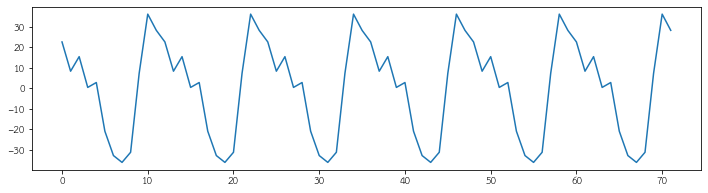

In [ ]:
#seasonal
SeasonalDecompose = statsmodels.tsa.seasonal.seasonal_decompose(Example.d.values, freq=12).seasonal
plt.figure(figsize=(12, 3))
plt.plot(SeasonalDecompose)

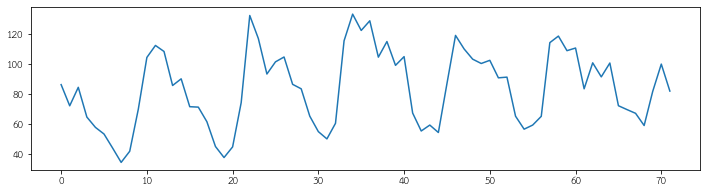

In [ ]:
#ข้อมูลจริง
plt.figure(figsize=(12, 3))
plt.plot(range(72),Example['d'])

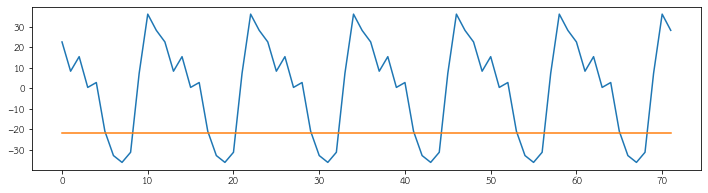

In [ ]:
#เพิ่มจุดตัด
plt.figure(figsize=(12, 3))
plt.plot(SeasonalDecompose)
line = []
for i in range(len(SeasonalDecompose)):
  line.append(min(SeasonalDecompose)+(max(SeasonalDecompose)-min(SeasonalDecompose))/5)
plt.plot(line)

In [ ]:
#ช่วงค่าต่ำสุด
LowSeasonal = []
for i in SeasonalDecompose:
  if i <= min(SeasonalDecompose)+(max(SeasonalDecompose)-min(SeasonalDecompose))/5:
    LowSeasonal.append(i)
  else: LowSeasonal.append(float('NaN'))
print(LowSeasonal)

[nan, nan, nan, nan, nan, nan, -32.81854166666666, -36.146541666666664, -31.221125000000004, nan, nan, nan, nan, nan, nan, nan, nan, nan, -32.81854166666666, -36.146541666666664, -31.221125000000004, nan, nan, nan, nan, nan, nan, nan, nan, nan, -32.81854166666666, -36.146541666666664, -31.221125000000004, nan, nan, nan, nan, nan, nan, nan, nan, nan, -32.81854166666666, -36.146541666666664, -31.221125000000004, nan, nan, nan, nan, nan, nan, nan, nan, nan, -32.81854166666666, -36.146541666666664, -31.221125000000004, nan, nan, nan, nan, nan, nan, nan, nan, nan, -32.81854166666666, -36.146541666666664, -31.221125000000004, nan, nan, nan]


In [ ]:
#จัดกลุ่มค่าต่ำสุด
MinSeasonal = []
MIN = {}
for i in range(len(LowSeasonal)):
  if not isnan(LowSeasonal[i]): MIN[LowSeasonal[i]] = i+1
  else:
      if MIN: #ไม่เป็นเซตว่าง
        MinSeasonal.append(MIN)
        MIN = {}
print(MinSeasonal)

[{-32.81854166666666: 7, -36.146541666666664: 8, -31.221125000000004: 9}, {-32.81854166666666: 19, -36.146541666666664: 20, -31.221125000000004: 21}, {-32.81854166666666: 31, -36.146541666666664: 32, -31.221125000000004: 33}, {-32.81854166666666: 43, -36.146541666666664: 44, -31.221125000000004: 45}, {-32.81854166666666: 55, -36.146541666666664: 56, -31.221125000000004: 57}, {-32.81854166666666: 67, -36.146541666666664: 68, -31.221125000000004: 69}]


In [ ]:
#หาช่วงต่ำสุด
indexLength = []
for i in MinSeasonal: 
  indexLength.append(i[min(i)])
print(indexLength)

[8, 20, 32, 44, 56, 68]


In [ ]:
#หาระยะห่างโดยเฉลี่ย
Length = []
for i in range(len(indexLength)):
  if i > 0: Length.append(abs(indexLength[i]-indexLength[i-1]))
print(Length)

[12, 12, 12, 12, 12]


In [ ]:
#s
print(round((sum(Length)/len(Length))))

12


สร้าง Algorithm การหาความยาวฤดูกาล

In [ ]:
#Algorithm
def Length_Seasonal(data, freq):
  SeasonalDecompose = statsmodels.tsa.seasonal.seasonal_decompose(data.values, freq=freq).seasonal
  LowSeasonal = []
  for i in SeasonalDecompose:
    if i <= min(SeasonalDecompose)+(max(SeasonalDecompose)-min(SeasonalDecompose))/5:
      LowSeasonal.append(i)
    else: LowSeasonal.append(float('NaN'))
  MinSeasonal = []
  MIN = {}
  for i in range(len(LowSeasonal)):
    if not isnan(LowSeasonal[i]): MIN[LowSeasonal[i]] = i+1
    else:
        if MIN:
          MinSeasonal.append(MIN)
          MIN = {}
  indexLength = []
  for i in MinSeasonal: 
    indexLength.append(i[min(i)])
  Length = []
  for i in range(len(indexLength)):
    if i > 0: Length.append(abs(indexLength[i]-indexLength[i-1]))
  if len(Length) == 0: return 0
  else: return round((sum(Length)/len(Length)))

In [ ]:
#test
Length_Seasonal(Example,12)

12

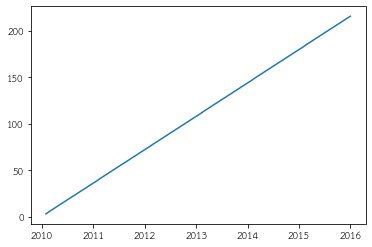

In [ ]:
#test กรณีไม่มี Seasonal
#example
d = []
n = 0
for i in range(72): 
  n += 3
  d.append(n)
t = ['31/1/2010','28/2/2010','31/3/2010','30/4/2010','31/5/2010','30/6/2010',
     '31/7/2010','31/8/2010','30/9/2010','31/10/2010','30/11/2010','31/12/2010',
     '31/1/2011','28/2/2011','31/3/2011','30/4/2011','31/5/2011','30/6/2011',
     '31/7/2011','31/8/2011','30/9/2011','31/10/2011','30/11/2011','31/12/2011',
     '31/1/2012','29/2/2012','31/3/2012','30/4/2012','31/5/2012','30/6/2012',
     '31/7/2012','31/8/2012','30/9/2012','31/10/2012','30/11/2012','31/12/2012',
     '31/1/2013','28/2/2013','31/3/2013','30/4/2013','31/5/2013','30/6/2013',
     '31/7/2013','31/8/2013','30/9/2013','31/10/2013','30/11/2013','31/12/2013',
     '31/1/2014','28/2/2014','31/3/2014','30/4/2014','31/5/2014','30/6/2014',
     '31/7/2014','31/8/2014','30/9/2014','31/10/2014','30/11/2014','31/12/2014',
     '31/1/2015','28/2/2015','31/3/2015','30/4/2015','31/5/2015','30/6/2015',
     '31/7/2015','31/8/2015','30/9/2015','31/10/2015','30/11/2015','31/12/2015',]
example = pd.DataFrame({'d':d,'t':t})
example['t'] = pd.to_datetime(example['t'])
example = example.set_index('t')
plt.plot(example['d'])

In [ ]:
#test
Length_Seasonal(example,12)

0

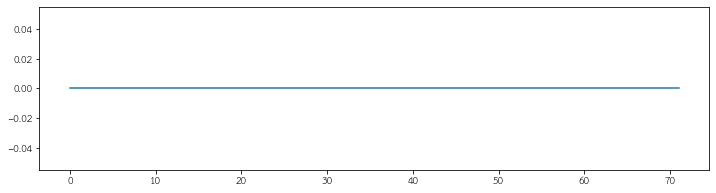

In [ ]:
#Seasonal Decompose
plt.figure(figsize=(12, 3))
plt.plot(statsmodels.tsa.seasonal.seasonal_decompose(example.d.values, freq=12).seasonal)

In [ ]:
#EURUSD
Length_Seasonal(EURUSD['Close'],30)

7

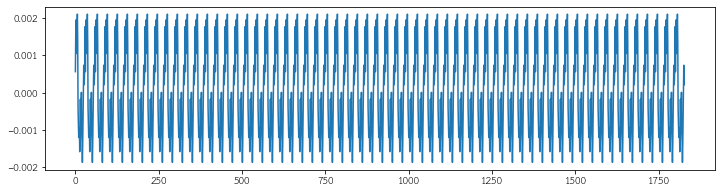

In [ ]:
#Seasonal Decompose
plt.figure(figsize=(12, 3))
plt.plot(statsmodels.tsa.seasonal.seasonal_decompose(EURUSD['Close'].values, freq=30).seasonal)

In [ ]:
#ปรับลดสัดส่วนตัวอย่าง
d = [86.38,72.26,84.59,64.74,57.86,53.43,44.11,34.5,41.93,69.95,104.53,112.53,
     108.5,85.81,90.25,71.66,71.37,61.63,45.1,37.73,44.83,74.36,132.51,117.18,
     93.46,101.58,104.82,86.58,83.59,65.35,55.03,50.17,60.56,115.63,133.42,
     122.54,128.97,104.72,115.14,99.25,105.06,67.41,55.45,59.4,54.44,87.06,
     119.22,110.2,103.37,100.49,102.6,90.92,91.38,65.33,56.66,59.4,65.22,114.4,
     118.77,109.04,110.8,83.6,100.92,91.57,100.8,72.31,69.73,67.24,59.1,81.87,
     100.08,82.07]
d100000 = []
for i in d:
  d100000.append(i/100000)
print(d100000)

[0.0008638, 0.0007226, 0.0008459, 0.0006473999999999999, 0.0005786, 0.0005343, 0.0004411, 0.000345, 0.0004193, 0.0006995, 0.0010453, 0.0011253, 0.001085, 0.0008581, 0.0009025, 0.0007166, 0.0007137000000000001, 0.0006163000000000001, 0.000451, 0.00037729999999999996, 0.0004483, 0.0007436, 0.0013250999999999998, 0.0011718, 0.0009346, 0.0010158, 0.0010482, 0.0008658, 0.0008359, 0.0006534999999999999, 0.0005503, 0.0005017, 0.0006056, 0.0011562999999999999, 0.0013341999999999998, 0.0012254, 0.0012897, 0.0010472, 0.0011514, 0.0009925, 0.0010506, 0.0006741, 0.0005545, 0.000594, 0.0005444, 0.0008706, 0.0011922, 0.0011020000000000001, 0.0010337, 0.0010049, 0.001026, 0.0009092, 0.0009138, 0.0006533, 0.0005666, 0.000594, 0.0006522, 0.001144, 0.0011876999999999999, 0.0010904, 0.001108, 0.0008359999999999999, 0.0010092, 0.0009157, 0.001008, 0.0007231000000000001, 0.0006973000000000001, 0.0006724, 0.000591, 0.0008187, 0.0010008, 0.0008206999999999999]


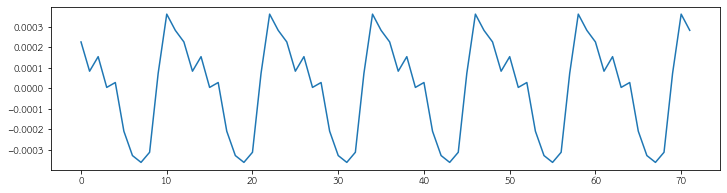

In [ ]:
#Seasonal Decompose
plt.figure(figsize=(12, 3))
plt.plot(statsmodels.tsa.seasonal.seasonal_decompose(d100000, freq=12).seasonal)

##Order

###ARIMAX

In [ ]:
#Exsample 
Ex_Y1 = EURUSD['Close'][:50]
ExY1 = pd.DataFrame({'Y1':Ex_Y1})
ExY1.head()

,Y1
0,1.20999
1,1.20002
2,1.19320
3,1.18886
4,1.18387


In [ ]:
#ADF test for Ex_Y1 series
adf_ExY1 = sm.tsa.stattools.adfuller(ExY1['Y1'])
print('ADF Statistic for EUR/USD: %f' % adf_ExY1[0])
print('p-value: %f' % adf_ExY1[1])
print('Critical Values:')
for key, value in adf_ExY1[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic for EUR/USD: 0.205228
p-value: 0.972553
Critical Values:
	1%: -3.575
	5%: -2.924
	10%: -2.600


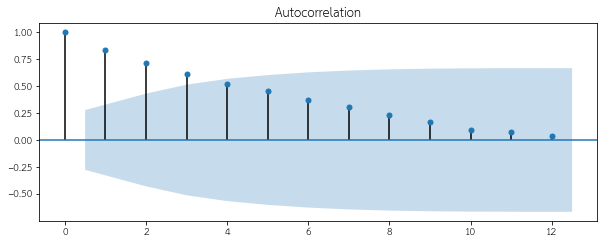

In [ ]:
#เรียกดู ACF
fig = plt.figure(figsize=(10, 8))
ax_fig = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(ExY1, lags = math.floor(len(ExY1['Y1'])/4), ax = ax_fig)
plt.show()

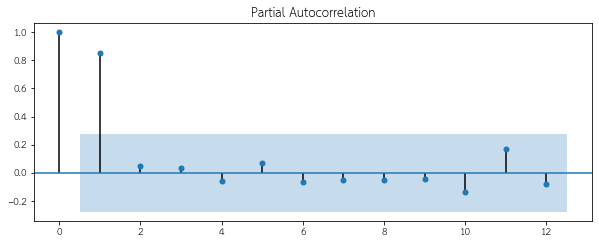

In [ ]:
#เรียกดู PACF
fig = plt.figure(figsize=(10, 8))
ax_fig = fig.add_subplot(211)
sm.graphics.tsa.plot_pacf(ExY1['Y1'], lags=math.floor(len(ExY1['Y1'])/4), ax = ax_fig)
plt.show()

In [ ]:
#ปรับให้ Stationary ด้วยการหาผลต่างครั้งที่ 1
ExY1_diff1 = ExY1['Y1'].diff() 

In [ ]:
#ADF test for ExAri_Y diff1 series
adf_ExY1_diff1 = sm.tsa.stattools.adfuller(ExY1_diff1.dropna())
print('ADF Statistic for EUR/USD diff1: %f' % adf_ExY1_diff1[0])
print('p-value: %f' % adf_ExY1_diff1[1])
print('Critical Values:')
for key, value in adf_ExY1_diff1[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic for EUR/USD diff1: -7.799020
p-value: 0.000000
Critical Values:
	1%: -3.575
	5%: -2.924
	10%: -2.600


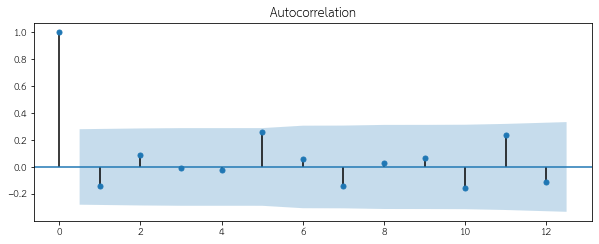

In [ ]:
#เรียกดู ACF
fig = plt.figure(figsize=(10, 8))
ax_fig = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(ExY1_diff1.dropna(),lags=math.floor(len(ExY1['Y1'])/4), ax = ax_fig)
plt.show()

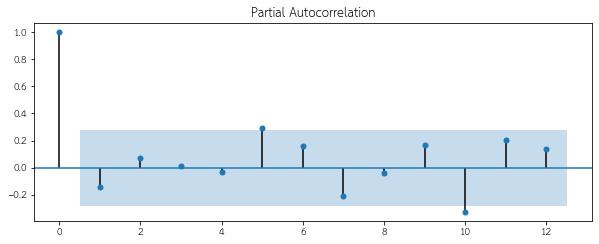

In [ ]:
#เรียกดู PACF
fig = plt.figure(figsize=(10, 8))
ax_fig = fig.add_subplot(211)
sm.graphics.tsa.plot_pacf(ExY1_diff1.dropna(),lags=math.floor(len(ExY1['Y1'])/4), ax = ax_fig)
plt.show()

In [ ]:
#แปลงข้อมูลให้ Stationary (i(d))
def d(data):
  p_value = sm.tsa.stattools.adfuller(data)[1]
  d = 0
  while (p_value > 0.05):
    d+=1
    p_value = sm.tsa.stattools.adfuller(data.diff(d).dropna())[1]
  return  d

In [ ]:
#Test
d(ExY1['Y1'])

1

In [ ]:
#หา Autoregressive process of order p (AR(p))
def p(data):
  if d(data) == 0:
    pacf = sm.graphics.tsa.pacf(data, nlags=math.floor(len(data)/4))
  else: pacf = sm.graphics.tsa.pacf(data.diff(d(data)).dropna(), nlags=math.floor(len(data)/4))
  p = []
  for i in range(len(pacf)):
    if pacf[i] > 2/math.sqrt(len(data)):
      p.append(i+1)
    if pacf[i] < -2/math.sqrt(len(data)):
      p.append(i+1)
  return p

In [ ]:
#Test
p(ExY1['Y1'])

[1, 6, 11]

In [ ]:
#หา Moving Average Process of order q (MA(q))
def q(data):
  if d(data) == 0:
    acf = sm.graphics.tsa.acf(data, nlags=math.floor(len(data)/4),fft=False)
  else: acf = sm.graphics.tsa.acf(data.diff(d(data)).dropna(), nlags=math.floor(len(data)/4),fft=False)
  q = []
  for i in range(len(acf)):
    if acf[i] > 2/math.sqrt(len(data)):
      q.append(i+1)
    if acf[i] < -2/math.sqrt(len(data)):
      q.append(i+1)
  return q

In [ ]:
#Test
q(ExY1['Y1'])

[1]

In [ ]:
# set order
def order_arimax(data):
  orders = []
  for i in (p(data)):
    for j in q(data):
      orders.append([i,d(data),j])
  return orders

In [ ]:
#test
order_arimax(ExY1['Y1'])

[[1, 1, 1], [6, 1, 1], [11, 1, 1]]

###SARIMAX

In [ ]:
#Exsample เดือน
Ex_Y2 = EURUSD['Close'][:500]
ExY2 = pd.DataFrame({'Y2':Ex_Y2})
ExY2.head()

,Y2
0,1.20999
1,1.20002
2,1.19320
3,1.18886
4,1.18387


In [ ]:
#กำหนด s
s = Length_Seasonal(ExY2['Y2'], 30)
s

15

In [ ]:
#เรียก d()
d(ExY2['Y2'])

0

In [ ]:
#lags
math.floor(len(ExY2['Y2'])/4)

125

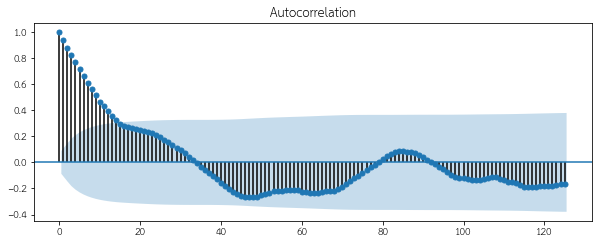

In [ ]:
#เรียกดู ACF
fig = plt.figure(figsize=(10, 8))
ax_fig = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(ExY2['Y2'], lags = math.floor(len(ExY2['Y2'])/4), ax = ax_fig)
plt.show()

[0.3260862437506451, 0.11342459534443018, -0.2447827370391762, -0.21410360900794229, -0.10104894029131015, 0.05970709931637041, -0.1314059583994645, -0.18481265228174076]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


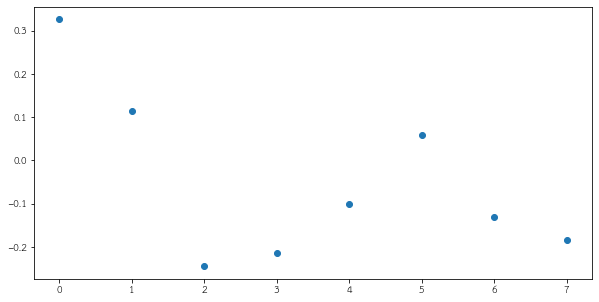

In [ ]:
#เรียกดู ACF ที่ s
fig = plt.figure(figsize=(10, 5))
acf_ExY2 = sm.graphics.tsa.acf(ExY2['Y2'], nlags=math.floor(len(ExY2['Y2'])/4))
acf_ExY2_D = []
for i in range(len(acf_ExY2)):
  if s*(i+1)-1 <= len(acf_ExY2)-1:
    acf_ExY2_D.append(acf_ExY2[s*(i+1)-1])
print(acf_ExY2_D)
plt.scatter(range(len(acf_ExY2_D)),acf_ExY2_D)

In [ ]:
#ทดสอบ Stationary ที่ s
acf = sm.graphics.tsa.acf(ExY2['Y2'],nlags=math.floor(len(ExY2['Y2'])/4),fft=False) 
acf_s = [] 
for i in range(len(acf)):
  if s*(i+1)-1 <= len(acf)-1:
    acf_s.append(acf[s*(i+1)-1]) 
print('p_value = ', sm.tsa.stattools.adfuller(acf_s)[1])

p_value =  0.19293941525142522


In [ ]:
#ปรับให้ Stationary ด้วยการหาผลต่างครั้งที่ 1
ExY2_diff1 = ExY2['Y2'].diff(s).dropna()
sm.graphics.tsa.acf(ExY2_diff1.dropna(), nlags=math.floor(len(ExY2['Y2'])/4))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 1.        ,  0.91247765,  0.81871983,  0.7202715 ,  0.62489457,
        0.53307808,  0.43458849,  0.34130865,  0.25301137,  0.16744578,
        0.07916059,  0.01347396, -0.06110528, -0.13307963, -0.19677032,
       -0.25792782, -0.23453409, -0.1936332 , -0.14984232, -0.10621385,
       -0.06625125, -0.03051903,  0.01043342,  0.0455091 ,  0.07259101,
        0.09998128,  0.11275384,  0.13143678,  0.14787831,  0.15480263,
        0.15692216,  0.15619168,  0.12831488,  0.10293336,  0.07675587,
        0.048016  ,  0.02354375, -0.01197072, -0.04358148, -0.06440888,
       -0.08806426, -0.11177698, -0.12786012, -0.15391039, -0.16286103,
       -0.16054964, -0.15744714, -0.1391207 , -0.12391004, -0.11425494,
       -0.09999206, -0.08602578, -0.06938119, -0.05315931, -0.05406084,
       -0.06163151, -0.06814617, -0.07569106, -0.07310478, -0.08521511,
       -0.11019573, -0.13628322, -0.15903706, -0.17736687, -0.1941912 ,
       -0.20800458, -0.2218976 , -0.22918976, -0.23457016, -0.22

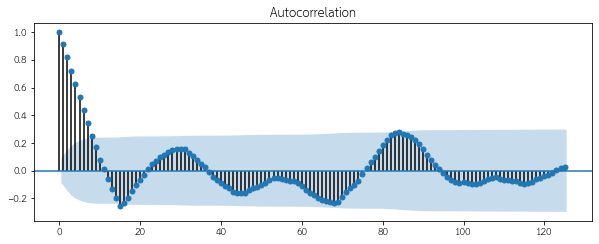

In [ ]:
#ACF ที่ปรับครั้งที่ 1
fig = plt.figure(figsize=(10, 8))
ax_fig = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(ExY2_diff1, lags = math.floor(len(ExY2['Y2'])/4), ax = ax_fig)
plt.show()

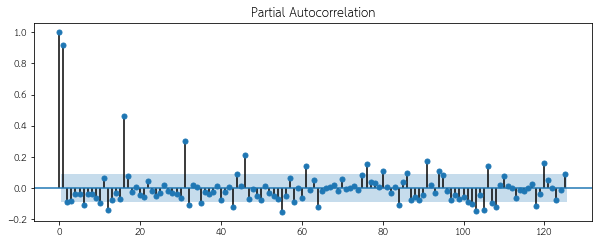

In [ ]:
#PACF ที่ปรับครั้งที่ 1
fig = plt.figure(figsize=(10, 8))
ax_fig = fig.add_subplot(211)
sm.graphics.tsa.plot_pacf(ExY2_diff1, lags = math.floor(len(ExY2['Y2'])/4), ax = ax_fig)
plt.show()

[-0.1967703235063948, 0.15480263175899794, -0.1628610312615193, -0.08521511231708837, -0.0713808963002146, 0.19593820243291404, -0.08676394912384369, -0.05436021252447553]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


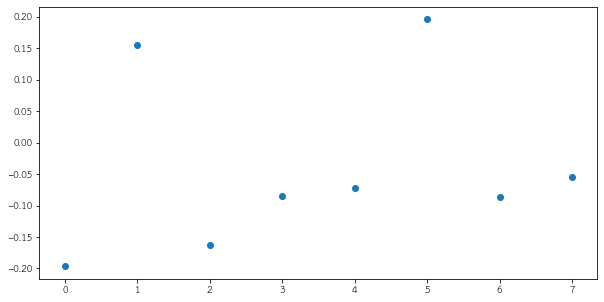

In [ ]:
#เรียกดู ACF ที่ปรับครั้งที่ 1 ที่ s
fig = plt.figure(figsize=(10, 5))
acf_ExY2 = sm.graphics.tsa.acf(ExY2_diff1, nlags=math.floor(len(ExY2['Y2'])/4))
acf_ExY2_D = []
for i in range(len(acf_ExY2)):
  if s*(i+1)-1 <= len(acf_ExY2)-1:
    acf_ExY2_D.append(acf_ExY2[s*(i+1)-1])
print(acf_ExY2_D)
plt.scatter(range(len(acf_ExY2_D)),acf_ExY2_D)

In [ ]:
#ทดสอบ Stationary ที่ s ครั้งที่ 1
acf = sm.graphics.tsa.acf(ExY2_diff1,nlags=math.floor(len(ExY2['Y2'])/4),fft=False) 
acf_s = [] 
for i in range(len(acf)):
  if s*(i+1)-1 <= len(acf)-1:
    acf_s.append(acf[s*(i+1)-1]) 
print('p_value = ', sm.tsa.stattools.adfuller(acf_s)[1])

p_value =  0.3508906520452485


In [ ]:
#ปรับให้ Stationary ด้วยการหาผลต่างครั้งที่ 2
ExY2_diff2 = ExY2['Y2'].diff(s*2).dropna()
sm.graphics.tsa.acf(ExY2_diff2.dropna(), nlags=math.floor(len(ExY2['Y2'])/4))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 1.00000000e+00,  9.38805560e-01,  8.83843235e-01,  8.29096712e-01,
        7.80910579e-01,  7.28055158e-01,  6.77052831e-01,  6.35792867e-01,
        5.96777345e-01,  5.56887264e-01,  5.17514857e-01,  4.90209246e-01,
        4.58912014e-01,  4.30376357e-01,  4.02345512e-01,  3.70454628e-01,
        3.42630582e-01,  3.15007750e-01,  2.89400618e-01,  2.63549380e-01,
        2.31715140e-01,  1.94159353e-01,  1.59432983e-01,  1.25510022e-01,
        8.75250708e-02,  4.75371413e-02, -1.64945569e-04, -4.11780947e-02,
       -8.89045166e-02, -1.35447482e-01, -1.73687706e-01, -1.63148127e-01,
       -1.65544376e-01, -1.64623969e-01, -1.67057103e-01, -1.67912102e-01,
       -1.68824228e-01, -1.74534497e-01, -1.79397079e-01, -1.86375784e-01,
       -2.04752121e-01, -2.28511668e-01, -2.42545569e-01, -2.66809209e-01,
       -2.83551792e-01, -2.96859237e-01, -3.09820099e-01, -3.17730309e-01,
       -3.25288170e-01, -3.36277987e-01, -3.40414681e-01, -3.44347796e-01,
       -3.46158803e-01, -

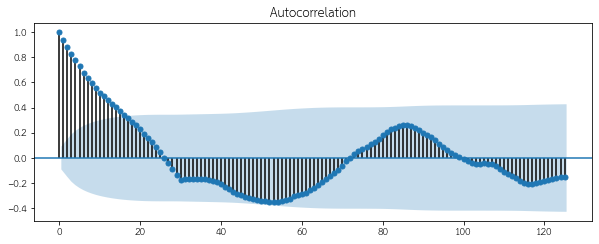

In [ ]:
#ACF ที่ปรับครั้งที่ 2
fig = plt.figure(figsize=(10, 8))
ax_fig = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(ExY2_diff2, lags = math.floor(len(ExY2['Y2'])/4), ax = ax_fig)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


[0.4023455116132729, -0.13544748166228432, -0.28355179165778127, -0.29322098024926113, 0.05296012763743587, 0.22372054750623357, -0.04405819067456913, -0.19268379304893293]


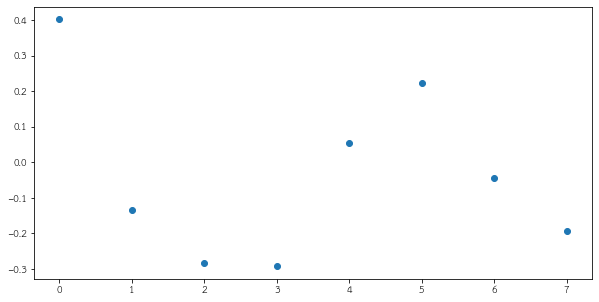

In [ ]:
#เรียกดู ACF ที่ปรับครั้งที่ 2 ที่ s
fig = plt.figure(figsize=(10, 5))
acf_ExY2 = sm.graphics.tsa.acf(ExY2_diff2, nlags=math.floor(len(ExY2['Y2'])/4))
acf_ExY2_D = []
for i in range(len(acf_ExY2)):
  if s*(i+1)-1 <= len(acf_ExY2)-1:
    acf_ExY2_D.append(acf_ExY2[s*(i+1)-1])
print(acf_ExY2_D)
plt.scatter(range(len(acf_ExY2_D)),acf_ExY2_D)

In [ ]:
#ทดสอบ Stationary ที่ s ครั้งที่ 2
acf = sm.graphics.tsa.acf(ExY2_diff2,nlags=math.floor(len(ExY2['Y2'])/4),fft=False) 
acf_s = [] 
for i in range(len(acf)):
  if s*(i+1)-1 <= len(acf)-1:
    acf_s.append(acf[s*(i+1)-1]) 
print('p_value = ', sm.tsa.stattools.adfuller(acf_s)[1])

p_value =  0.00638857454731989


In [ ]:
#แปลงข้อมูลให้ Stationary (i(D))
def D(data, s):
  if s != 0:
    if d(data) > 0: data = data.diff(d(data)).dropna()
    DATA = sm.graphics.tsa.acf(data,nlags=math.floor(len(data)/4),fft=False)
    DATA_D = [] 
    for i in range(len(DATA)):
      if s*(i+1)-1 <= len(DATA)-1:
        DATA_D.append(DATA[s*(i+1)-1]) 
    p_value = sm.tsa.stattools.adfuller(DATA_D)[1]
    D = 0
    while (p_value > 0.05):
      D+=1
      DATA = sm.graphics.tsa.acf(data.diff(D*s).dropna(), nlags=math.floor(len(data)/4),fft=False)
      for i in range(len(DATA)):
        if s*(i+1)-1 <= len(DATA)-1:
          DATA_D.append(DATA[s*(i+1)-1])
      p_value = sm.tsa.stattools.adfuller(DATA_D)[1]
    return  D
  else: return 0

In [ ]:
#test
D(ExY2['Y2'], s)

2

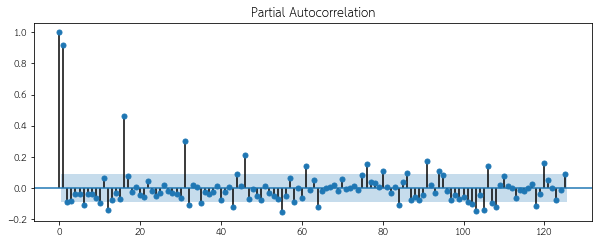

In [ ]:
#PACF ที่ปรับครั้งที่ 1
fig = plt.figure(figsize=(10, 8))
ax_fig = fig.add_subplot(211)
sm.graphics.tsa.plot_pacf(ExY2_diff1, lags = math.floor(len(ExY2['Y2'])/4), ax = ax_fig)
plt.show()

In [ ]:
#หา Autoregressive process of order p:
def p(data,s):
  if s != 0:
    DATA = data
    if d(data) != 0: DATA = data.diff(d(data)).dropna()
    if D(data,s) != 0: DATA = DATA.diff(D(data,s)*s).dropna()
    pacf = sm.graphics.tsa.pacf(DATA, nlags=math.floor(len(data)/4))
    p = []
    for i in range(len(pacf)):
      if i < s -1:
        if pacf[i] > 2/math.sqrt(len(data)):
          p.append(i + 1)
        if pacf[i] < -2/math.sqrt(len(data)):
          p.append(i + 1)
  else:
    if d(data) == 0:
      pacf = sm.graphics.tsa.pacf(data, nlags=math.floor(len(data)/4))
    else: pacf = sm.graphics.tsa.pacf(data.diff(d(data)).dropna(), nlags=math.floor(len(data)/4))
    p = []
    for i in range(len(pacf)):
      if pacf[i] > 2/math.sqrt(len(data)):
        if i + 1 <= s: p.append(i + 1)
      if pacf[i] < -2/math.sqrt(len(data)):
        if i + 1 <= s: p.append(i + 1)
  if p == []: p = [0]
  return p

In [ ]:
#Test
p(ExY2['Y2'],s)

[1, 2]

In [ ]:
2/math.sqrt(len(ExY2['Y2']))

0.08944271909999159

In [ ]:
#หา Autoregressive process of order P 
def P(data, s):
  P = []
  if s != 0:
    DATA = data
    if d(data) != 0: DATA = data.diff(d(data)).dropna()
    if D(data,s) != 0: DATA = DATA.diff(D(data,s)*s).dropna()
    pacf = sm.graphics.tsa.pacf(DATA, nlags=math.floor(len(data)/4))
    for i in range(len(pacf)):
      if s*(i+1)-1 <= len(pacf)-1:
        if pacf[s*(i+1)-1] > 2/math.sqrt(len(data)):
          P.append(i+1)
        if pacf[s*(i+1)-1] < -2/math.sqrt(len(data)):
          P.append(i+1)
  if P == []: P = [0]
  return P

In [ ]:
#Test
P(ExY2['Y2'],s)

[6, 7, 8]

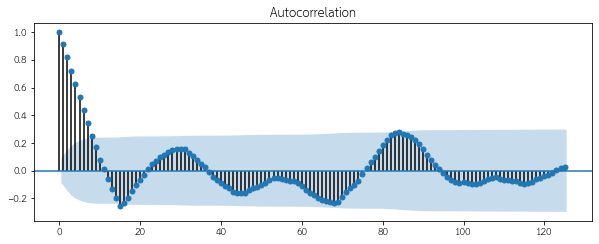

In [ ]:
#ACF ที่ปรับครั้งที่ 1
fig = plt.figure(figsize=(10, 8))
ax_fig = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(ExY2_diff1, lags = math.floor(len(ExY2['Y2'])/4), ax = ax_fig)
plt.show()

In [ ]:
#หา Moving Average Process of order q
def q(data,s):
  if s != 0:
    DATA = data
    if d(data) != 0: DATA = data.diff(d(data)).dropna()
    if D(data,s) != 0: DATA = DATA.diff(D(data,s)*s).dropna()
    acf = sm.graphics.tsa.acf(DATA, nlags=math.floor(len(data)/4), fft=False)
    q = []
    for i in range(len(acf)):
      if i < s - 1:
        if acf[i] > 2/math.sqrt(math.floor(len(data)/4)):
          q.append(i + 1)
        if acf[i] < -2/math.sqrt(math.floor(len(data)/4)):
          q.append(i + 1)
  else:
    if d(data) == 0:
      acf = sm.graphics.tsa.acf(data, nlags=math.floor(len(data)/4),fft=False)
    else: acf = sm.graphics.tsa.acf(data.diff(d(data)).dropna(), nlags=math.floor(len(data)/4),fft=False)
    q = []
    for i in range(len(acf)):
      if acf[i] > 2/math.sqrt(math.floor(len(data)/4)):
        if i + 1 <= s: q.append(i + 1)
      if acf[i] < -2/math.sqrt(math.floor(len(data)/4)):
        if i + 1 <= s: q.append(i + 1)
  if q == []: q = [0]
  return q

In [ ]:
#Test
q(ExY2['Y2'], s)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [ ]:
#หา Moving Average Process of order Q
def Q(data,s):
  Q = []
  if s != 0:
    DATA = data
    if d(data) != 0: DATA = data.diff(d(data)).dropna()
    if D(data,s) != 0: DATA = DATA.diff(D(data,s)*s).dropna()
    acf = sm.graphics.tsa.acf(DATA, nlags=math.floor(len(data)/4), fft=False)
    for i in range(len(acf)):
      if s*(i+1)-1 <= len(acf):
        if acf[s*(i+1)-1] > 2/math.sqrt(math.floor(len(data)/4)):
          Q.append(i+1)
        if acf[s*(i+1)-1] < -2/math.sqrt(math.floor(len(data)/4)):
          Q.append(i+1)
  if Q == []: Q = [0]
  return Q

In [ ]:
#Test
Q(ExY2['Y2'], s)

[1, 3, 4, 6, 8]

In [ ]:
# set order
def order_arimax(data,s):
  orders = []
  for i in (p(data,s)):
    for j in (q(data,s)):
      orders.append([i,d(data),j])
  return orders

In [ ]:
#test
order_arimax(ExY2['Y2'], s)

[[1, 0, 1],
 [1, 0, 2],
 [1, 0, 3],
 [1, 0, 4],
 [1, 0, 5],
 [1, 0, 6],
 [1, 0, 7],
 [1, 0, 8],
 [1, 0, 9],
 [1, 0, 10],
 [1, 0, 11],
 [1, 0, 12],
 [1, 0, 13],
 [1, 0, 14],
 [2, 0, 1],
 [2, 0, 2],
 [2, 0, 3],
 [2, 0, 4],
 [2, 0, 5],
 [2, 0, 6],
 [2, 0, 7],
 [2, 0, 8],
 [2, 0, 9],
 [2, 0, 10],
 [2, 0, 11],
 [2, 0, 12],
 [2, 0, 13],
 [2, 0, 14]]

In [ ]:
# set order
def order_sarimax(data,s):
  orders = []
  for i in (P(data,s)):
    for j in (Q(data,s)):
      orders.append([i,D(data,s),j,s])
  return orders

In [ ]:
#test
order_sarimax(ExY2['Y2'], s)

[[6, 2, 1, 15],
 [6, 2, 3, 15],
 [6, 2, 4, 15],
 [6, 2, 6, 15],
 [6, 2, 8, 15],
 [7, 2, 1, 15],
 [7, 2, 3, 15],
 [7, 2, 4, 15],
 [7, 2, 6, 15],
 [7, 2, 8, 15],
 [8, 2, 1, 15],
 [8, 2, 3, 15],
 [8, 2, 4, 15],
 [8, 2, 6, 15],
 [8, 2, 8, 15]]

##Model 0

In [ ]:
#Example Data
N = 200 #1566
y = EURUSD['Close'][:N]
x1 = XAUUSD['Close'][:N]
x2 = WTIUSD['Close'][:N]
x3 = STOXX['Close'][:N]
x4 = SPX['Close'][:N]
inde_variable = pd.DataFrame({'x1':x1,'x2':x2,'x3':x3,'x4':x4})

In [ ]:
s = Length_Seasonal(y,30)
s

10

In [ ]:
# get order
for i in order_arimax(y, s):
  for j in order_sarimax(y, s):
    print(i, " <---> ", j)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


[1, 0, 1]  <--->  [1, 1, 0, 10]
[1, 0, 1]  <--->  [5, 1, 0, 10]
[1, 0, 2]  <--->  [1, 1, 0, 10]
[1, 0, 2]  <--->  [5, 1, 0, 10]
[1, 0, 3]  <--->  [1, 1, 0, 10]
[1, 0, 3]  <--->  [5, 1, 0, 10]
[1, 0, 4]  <--->  [1, 1, 0, 10]
[1, 0, 4]  <--->  [5, 1, 0, 10]
[1, 0, 5]  <--->  [1, 1, 0, 10]
[1, 0, 5]  <--->  [5, 1, 0, 10]
[1, 0, 6]  <--->  [1, 1, 0, 10]
[1, 0, 6]  <--->  [5, 1, 0, 10]
[1, 0, 7]  <--->  [1, 1, 0, 10]
[1, 0, 7]  <--->  [5, 1, 0, 10]
[2, 0, 1]  <--->  [1, 1, 0, 10]
[2, 0, 1]  <--->  [5, 1, 0, 10]
[2, 0, 2]  <--->  [1, 1, 0, 10]
[2, 0, 2]  <--->  [5, 1, 0, 10]
[2, 0, 3]  <--->  [1, 1, 0, 10]
[2, 0, 3]  <--->  [5, 1, 0, 10]
[2, 0, 4]  <--->  [1, 1, 0, 10]
[2, 0, 4]  <--->  [5, 1, 0, 10]
[2, 0, 5]  <--->  [1, 1, 0, 10]
[2, 0, 5]  <--->  [5, 1, 0, 10]
[2, 0, 6]  <--->  [1, 1, 0, 10]
[2, 0, 6]  <--->  [5, 1, 0, 10]
[2, 0, 7]  <--->  [1, 1, 0, 10]
[2, 0, 7]  <--->  [5, 1, 0, 10]
[7, 0, 1]  <--->  [1, 1, 0, 10]
[7, 0, 1]  <--->  [5, 1, 0, 10]
[7, 0, 2]  <--->  [1, 1, 0, 10]
[7, 0, 2

In [ ]:
# check combinations
data = [1,2,3,4]
for i in range(len(data)): 
  for j in combinations(data,i+1):
    print(list(j))

[1]
[2]
[3]
[4]
[1, 2]
[1, 3]
[1, 4]
[2, 3]
[2, 4]
[3, 4]
[1, 2, 3]
[1, 2, 4]
[1, 3, 4]
[2, 3, 4]
[1, 2, 3, 4]


In [ ]:
# set model
def set_model(data):
  model = []
  for i in range(len(data.columns)): 
    for j in combinations(data.columns,i+1):
      model.append(list(j))
  return model

In [ ]:
#test
set_model(inde_variable)

[['x1'],
 ['x2'],
 ['x3'],
 ['x4'],
 ['x1', 'x2'],
 ['x1', 'x3'],
 ['x1', 'x4'],
 ['x2', 'x3'],
 ['x2', 'x4'],
 ['x3', 'x4'],
 ['x1', 'x2', 'x3'],
 ['x1', 'x2', 'x4'],
 ['x1', 'x3', 'x4'],
 ['x2', 'x3', 'x4'],
 ['x1', 'x2', 'x3', 'x4']]

In [ ]:
#test SARIMAX 
model_test = statsmodels.tsa.statespace.sarimax.SARIMAX(endog=y, order=[1,0,1], seasonal_order=[1, 1, 0, 10])
print(model_test.fit().summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Close   No. Observations:                  200
Model:             SARIMAX(1, 0, 1)x(1, 1, 0, 10)   Log Likelihood                 593.668
Date:                            Fri, 04 Mar 2022   AIC                          -1179.336
Time:                                    07:17:19   BIC                          -1166.348
Sample:                                         0   HQIC                         -1174.075
                                            - 200                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9251      0.025     37.247      0.000       0.876       0.974
ma.L1          0.0469      0.070   

In [ ]:
#test SARIMAX 
print(model_test.fit().pvalues)

ar.L1       1.193973e-303
ma.L1        5.045205e-01
ar.S.L10     2.404621e-20
sigma2       1.861830e-19
dtype: float64


In [ ]:
#test SARIMAX 
for i in range(len(model_test.fit().pvalues)):
  if model_test.fit().pvalues[i] > 0.05: print(i,'----',model_test.fit().pvalues.index[i]); break

1 ---- ma.L1


In [ ]:
#fix params
model_test1 = model_test.fix_params({'ma.L1': 0})
print(model_test1.sumary())

AttributeError: ignored

In [ ]:
#-pvalue -> para
def test_para(y,x,s):
  arimax = []
  sarimax = []
  exog = []
  for i in order_arimax(y, s):
    for j in order_sarimax(y, s):
      for k in set_model(x):
        model = statsmodels.tsa.statespace.sarimax.SARIMAX(endog=y,exog=x[k],order=i,seasonal_order=j).fit(disp=0)
        key = 'sig'
        for l in range(len(model.pvalues)): 
          if model.pvalues[l] > 0.05: key = 'non-sig'; break
        if key == 'sig': 
          arimax.append(i)
          sarimax.append(j)
          exog.append(k)
  return [arimax,sarimax,exog]

In [ ]:
#test
test_para(y,inde_variable,s)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.

KeyboardInterrupt: ignored

In [ ]:
#accuracy
model_test = statsmodels.tsa.statespace.sarimax.SARIMAX(endog=y, order=[1,0,1], seasonal_order=[1, 1, 0, 10])
print(model_test.fit().summary())

#Time Series 1

##Seasonal

In [ ]:
#ความยาวฤดูกาล
def Length_Seasonal(data, freq):
  SeasonalDecompose = statsmodels.tsa.seasonal.seasonal_decompose(data.values, freq=freq).seasonal
  LowSeasonal = []
  for i in SeasonalDecompose:
    if i <= min(SeasonalDecompose)+(max(SeasonalDecompose)-min(SeasonalDecompose))/5:
      LowSeasonal.append(i)
    else: LowSeasonal.append(float('NaN'))
  MinSeasonal = []
  MIN = {}
  for i in range(len(LowSeasonal)):
    if not isnan(LowSeasonal[i]): MIN[LowSeasonal[i]] = i+1
    else:
        if MIN:
          MinSeasonal.append(MIN)
          MIN = {}
  indexLength = []
  for i in MinSeasonal: 
    indexLength.append(i[min(i)])
  Length = []
  for i in range(len(indexLength)):
    if i > 0: Length.append(abs(indexLength[i]-indexLength[i-1]))
  if len(Length) == 0: return 0
  else: return round((sum(Length)/len(Length)))

##Order

In [ ]:
#แปลงข้อมูลให้ Stationary (i(d))
def d(data):
  p_value = sm.tsa.stattools.adfuller(data)[1]
  d = 0
  while (p_value > 0.05):
    d+=1
    p_value = sm.tsa.stattools.adfuller(data.diff(d).dropna())[1]
  return  d

In [ ]:
#แปลงข้อมูลให้ Stationary (i(D))
def D(data, s):
  if s != 0:
    if d(data) > 0: data = data.diff(d(data)).dropna()
    DATA = sm.graphics.tsa.acf(data,nlags=math.floor(len(data)/4),fft=False)
    DATA_D = [] 
    for i in range(len(DATA)):
      if s*(i+1)-1 <= len(DATA)-1:
        DATA_D.append(DATA[s*(i+1)-1]) 
    p_value = sm.tsa.stattools.adfuller(DATA_D)[1]
    D = 0
    while (p_value > 0.05):
      D+=1
      DATA = sm.graphics.tsa.acf(data.diff(D*s).dropna(), nlags=math.floor(len(data)/4),fft=False)
      for i in range(len(DATA)):
        if s*(i+1)-1 <= len(DATA)-1:
          DATA_D.append(DATA[s*(i+1)-1])
      p_value = sm.tsa.stattools.adfuller(DATA_D)[1]
    return  D
  else: return 0

In [ ]:
#หา Autoregressive process of order p:
def p(data,s):
  if s != 0:
    DATA = data
    if d(data) != 0: DATA = data.diff(d(data)).dropna()
    if D(data,s) != 0: DATA = DATA.diff(D(data,s)*s).dropna()
    pacf = sm.graphics.tsa.pacf(DATA, nlags=math.floor(len(data)/4))
    p = []
    for i in range(len(pacf)):
      if i < s -1:
        if pacf[i] > 2/math.sqrt(len(data)):
          p.append(i + 1)
        if pacf[i] < -2/math.sqrt(len(data)):
          p.append(i + 1)
  else:
    if d(data) == 0:
      pacf = sm.graphics.tsa.pacf(data, nlags=math.floor(len(data)/4))
    else: pacf = sm.graphics.tsa.pacf(data.diff(d(data)).dropna(), nlags=math.floor(len(data)/4))
    p = []
    for i in range(len(pacf)):
      if pacf[i] > 2/math.sqrt(len(data)):
        if i + 1 <= s: p.append(i + 1)
      if pacf[i] < -2/math.sqrt(len(data)):
        if i + 1 <= s: p.append(i + 1)
  if p == []: p = [0]
  return p

In [ ]:
#หา Autoregressive process of order P 
def P(data, s):
  P = []
  if s != 0:
    DATA = data
    if d(data) != 0: DATA = data.diff(d(data)).dropna()
    if D(data,s) != 0: DATA = DATA.diff(D(data,s)*s).dropna()
    pacf = sm.graphics.tsa.pacf(DATA, nlags=math.floor(len(data)/4))
    for i in range(len(pacf)):
      if s*(i+1)-1 <= len(pacf)-1:
        if pacf[s*(i+1)-1] > 2/math.sqrt(len(data)):
          P.append(i+1)
        if pacf[s*(i+1)-1] < -2/math.sqrt(len(data)):
          P.append(i+1)
  if P == []: P = [0]
  return P

In [ ]:
#หา Moving Average Process of order q
def q(data,s):
  if s != 0:
    DATA = data
    if d(data) != 0: DATA = data.diff(d(data)).dropna()
    if D(data,s) != 0: DATA = DATA.diff(D(data,s)*s).dropna()
    acf = sm.graphics.tsa.acf(DATA, nlags=math.floor(len(data)/4), fft=False)
    q = []
    for i in range(len(acf)):
      if i < s - 1:
        if acf[i] > 2/math.sqrt(math.floor(len(data)/4)):
          q.append(i + 1)
        if acf[i] < -2/math.sqrt(math.floor(len(data)/4)):
          q.append(i + 1)
  else:
    if d(data) == 0:
      acf = sm.graphics.tsa.acf(data, nlags=math.floor(len(data)/4),fft=False)
    else: acf = sm.graphics.tsa.acf(data.diff(d(data)).dropna(), nlags=math.floor(len(data)/4),fft=False)
    q = []
    for i in range(len(acf)):
      if acf[i] > 2/math.sqrt(math.floor(len(data)/4)):
        if i + 1 <= s: q.append(i + 1)
      if acf[i] < -2/math.sqrt(math.floor(len(data)/4)):
        if i + 1 <= s: q.append(i + 1)
  if q == []: q = [0]
  return q

In [ ]:
#หา Moving Average Process of order Q
def Q(data,s):
  Q = []
  if s != 0:
    DATA = data
    if d(data) != 0: DATA = data.diff(d(data)).dropna()
    if D(data,s) != 0: DATA = DATA.diff(D(data,s)*s).dropna()
    acf = sm.graphics.tsa.acf(DATA, nlags=math.floor(len(data)/4), fft=False)
    for i in range(len(acf)):
      if s*(i+1)-1 <= len(acf):
        if acf[s*(i+1)-1] > 2/math.sqrt(math.floor(len(data)/4)):
          Q.append(i+1)
        if acf[s*(i+1)-1] < -2/math.sqrt(math.floor(len(data)/4)):
          Q.append(i+1)
  if Q == []: Q = [0]
  return Q

In [ ]:
# set order
def order_arimax(data,s):
  orders = []
  for i in (p(data,s)):
    for j in (q(data,s)):
      orders.append([i,d(data),j])
  return orders

In [ ]:
# set order
def order_sarimax(data,s):
  orders = []
  for i in (P(data,s)):
    for j in (Q(data,s)):
      orders.append([i,D(data,s),j,s])
  return orders

##Model

In [ ]:
#Example Data
N = 1566 #1566
y = EURUSD['Close'][:N]
x1 = XAUUSD['Close'][:N]
x2 = WTIUSD['Close'][:N]
x3 = STOXX['Close'][:N]
x4 = SPX['Close'][:N]
inde_variable = pd.DataFrame({'x1':x1,'x2':x2,'x3':x3,'x4':x4})

In [ ]:
s = Length_Seasonal(y,30)
s

7

In [ ]:
# get order
for I in order_arimax(y, s):
  for J in order_sarimax(y, s):
    print(I, " <---> ", J)

[1, 1, 1]  <--->  [10, 0, 0, 7]
[1, 1, 1]  <--->  [23, 0, 0, 7]
[1, 1, 1]  <--->  [29, 0, 0, 7]
[1, 1, 1]  <--->  [43, 0, 0, 7]
[1, 1, 1]  <--->  [48, 0, 0, 7]


In [ ]:
# check combinations
data = [1,2,3,4]
for i in range(len(data)): 
  for j in combinations(data,i+1):
    print(list(j))

[1]
[2]
[3]
[4]
[1, 2]
[1, 3]
[1, 4]
[2, 3]
[2, 4]
[3, 4]
[1, 2, 3]
[1, 2, 4]
[1, 3, 4]
[2, 3, 4]
[1, 2, 3, 4]


In [ ]:
# set model
def set_model(data):
  model = []
  for i in range(len(data.columns)): 
    for j in combinations(data.columns,i+1):
      model.append(list(j))
  return model

In [ ]:
#test
set_model(inde_variable)

[['x1'],
 ['x2'],
 ['x3'],
 ['x4'],
 ['x1', 'x2'],
 ['x1', 'x3'],
 ['x1', 'x4'],
 ['x2', 'x3'],
 ['x2', 'x4'],
 ['x3', 'x4'],
 ['x1', 'x2', 'x3'],
 ['x1', 'x2', 'x4'],
 ['x1', 'x3', 'x4'],
 ['x2', 'x3', 'x4'],
 ['x1', 'x2', 'x3', 'x4']]

In [ ]:
#test SARIMAX 
model_test = statsmodels.tsa.statespace.sarimax.SARIMAX(endog=y, order=[1,1,1], seasonal_order=[10, 0, 0, 7]).fit()
print(model_test.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                 Statespace Model Results                                 
Dep. Variable:                              Close   No. Observations:                 1566
Model:             SARIMAX(1, 1, 1)x(10, 0, 0, 7)   Log Likelihood                5859.790
Date:                            Sun, 06 Mar 2022   AIC                         -11693.580
Time:                                    08:49:28   BIC                         -11623.957
Sample:                                         0   HQIC                        -11667.698
                                           - 1566                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       9.357e-08      0.010   9.07e-06      1.000      -0.020       0.020
ma.L1       9.347e-08      0.010   

In [ ]:
#test pvalue
model_test.pvalues

ar.L1       0.999993
ma.L1       0.999993
ar.S.L7     0.151168
ar.S.L14    0.367939
ar.S.L21    0.961381
ar.S.L28    0.862273
ar.S.L35    0.822731
ar.S.L42    0.629573
ar.S.L49    0.337147
ar.S.L56    0.728138
ar.S.L63    0.971711
ar.S.L70    0.926520
sigma2      0.000000
dtype: float64

In [ ]:
#test SARIMAX 
non_sig = []
for i in range(len(model_test.pvalues)):
  if model_test.pvalues[i] > 0.05: non_sig.append(i)
max_pvalue = -1
if non_sig: max_pvalue = model_test.pvalues[non_sig[0]]
if max_pvalue > 0:
  for j in non_sig:
    if max_pvalue < model_test.pvalues[j]:
      max_pvalue = model_test.pvalues[j]
for l in range(len(model_test.pvalues)):
  if model_test.pvalues[l] == max_pvalue:
    print(model_test.pvalues.index[l]); break

ma.L1


In [ ]:
#test SARIMAX 
model_test = statsmodels.tsa.statespace.sarimax.SARIMAX(endog=y, order=[1,1,0], seasonal_order=[10, 0, 0, 7]).fit()
print(model_test.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Close   No. Observations:                 1566
Model:             SARIMAX(1, 1, 0)x(10, 0, 0, 7)   Log Likelihood                5859.868
Date:                            Fri, 04 Mar 2022   AIC                         -11695.735
Time:                                    10:56:13   BIC                         -11631.467
Sample:                                         0   HQIC                        -11671.844
                                           - 1566                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0094      0.021      0.458      0.647      -0.031       0.050
ar.S.L7       -0.0329      0.023   

In [ ]:
#test SARIMAX 
non_sig = []
for i in range(len(model_test.pvalues)):
  if model_test.pvalues[i] > 0.05: non_sig.append(i)
max_pvalue = -1
if non_sig: max_pvalue = model_test.pvalues[non_sig[0]]
if max_pvalue > 0:
  for j in non_sig:
    if max_pvalue < model_test.pvalues[j]:
      max_pvalue = model_test.pvalues[j]
for l in range(len(model_test.pvalues)):
  if model_test.pvalues[l] == max_pvalue:
    print(model_test.pvalues.index[l]); break

ar.S.L63


In [ ]:
#test SARIMAX 
model_test = statsmodels.tsa.statespace.sarimax.SARIMAX(endog=y, order=[1,1,0], seasonal_order=[9, 0, 0, 7]).fit()
print(model_test.summary())

##Model 3

In [ ]:
#Example Data
N = 1566 #1566
y = EURUSD['Close'][:N]
x1 = XAUUSD['Close'][:N]
x2 = WTIUSD['Close'][:N]
x3 = STOXX['Close'][:N]
x4 = SPX['Close'][:N]
inde_variable = pd.DataFrame({'x1':x1,'x2':x2,'x3':x3,'x4':x4})

In [ ]:
s = Length_Seasonal(y,30)
s

7

In [ ]:
# get order
for I in order_arimax(y, s):
  for J in order_sarimax(y, s):
    print(I, " <---> ", J)

[1, 1, 1]  <--->  [10, 0, 0, 7]
[1, 1, 1]  <--->  [23, 0, 0, 7]
[1, 1, 1]  <--->  [29, 0, 0, 7]
[1, 1, 1]  <--->  [43, 0, 0, 7]
[1, 1, 1]  <--->  [48, 0, 0, 7]


In [ ]:
# set model
def set_model(data):
  model = []
  for i in range(len(data.columns)): 
    for j in combinations(data.columns,i+1):
      model.append(list(j))
  return model

In [ ]:
#test
set_model(inde_variable)

[['x1'],
 ['x2'],
 ['x3'],
 ['x4'],
 ['x1', 'x2'],
 ['x1', 'x3'],
 ['x1', 'x4'],
 ['x2', 'x3'],
 ['x2', 'x4'],
 ['x3', 'x4'],
 ['x1', 'x2', 'x3'],
 ['x1', 'x2', 'x4'],
 ['x1', 'x3', 'x4'],
 ['x2', 'x3', 'x4'],
 ['x1', 'x2', 'x3', 'x4']]

In [ ]:
# set independent variable
def set_inde_variable(data):
  variable = []
  for i in range(len(data.columns)): 
    for j in combinations(data.columns,i+1):
      variable.append(list(j))
  return variable

In [ ]:
#set model
def model(y, x1, x2, x3, x4, freq = 30):
  model = []
  inde_variable = pd.DataFrame({'x1':x1,'x2':x2,'x3':x3,'x4':x4})
  s = Length_Seasonal(y,freq)
  for I in set_inde_variable(inde_variable):
    for J in order_arimax(y, s):
      for K in order_sarimax(y, s):
        model.append([inde_variable[I],J,K])
  return model

In [ ]:
#test
model(y, x1, x2, x3, x4,)

[[           x1
  0     1181.97
  1     1189.18
  2     1204.45
  3     1219.20
  4     1210.80
  ...       ...
  1561  1875.82
  1562  1871.19
  1563  1877.99
  1564  1893.37
  1565  1896.49
  
  [1566 rows x 1 columns], [1, 1, 1], [10, 0, 0, 7]], [           x1
  0     1181.97
  1     1189.18
  2     1204.45
  3     1219.20
  4     1210.80
  ...       ...
  1561  1875.82
  1562  1871.19
  1563  1877.99
  1564  1893.37
  1565  1896.49
  
  [1566 rows x 1 columns], [1, 1, 1], [23, 0, 0, 7]], [           x1
  0     1181.97
  1     1189.18
  2     1204.45
  3     1219.20
  4     1210.80
  ...       ...
  1561  1875.82
  1562  1871.19
  1563  1877.99
  1564  1893.37
  1565  1896.49
  
  [1566 rows x 1 columns], [1, 1, 1], [29, 0, 0, 7]], [           x1
  0     1181.97
  1     1189.18
  2     1204.45
  3     1219.20
  4     1210.80
  ...       ...
  1561  1875.82
  1562  1871.19
  1563  1877.99
  1564  1893.37
  1565  1896.49
  
  [1566 rows x 1 columns], [1, 1, 1], [43, 0, 0, 7]], [      

In [ ]:
#test
accuracy(EURUSD['Close'][:1566],None,[1,1,1],[10,0,0,7])

##Suitability

In [ ]:
#test SARIMAX 
model_test = statsmodels.tsa.statespace.sarimax.SARIMAX(endog=y, order=[1,1,1], seasonal_order=[10, 0, 0, 7]).fit()
print(model_test.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                 Statespace Model Results                                 
Dep. Variable:                              Close   No. Observations:                 1566
Model:             SARIMAX(1, 1, 1)x(10, 0, 0, 7)   Log Likelihood                5859.790
Date:                            Sun, 06 Mar 2022   AIC                         -11693.580
Time:                                    08:50:18   BIC                         -11623.957
Sample:                                         0   HQIC                        -11667.698
                                           - 1566                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       9.357e-08      0.010   9.07e-06      1.000      -0.020       0.020
ma.L1       9.347e-08      0.010   

In [ ]:
#test residual
res = model_test.resid
res

0       1.209990
1      -0.009970
2      -0.006820
3      -0.004340
4      -0.004990
          ...   
1561    0.000341
1562    0.003565
1563    0.003374
1564    0.004984
1565   -0.007512
Length: 1566, dtype: float64

In [ ]:
#Autocorrelation
def Autocorr(res):
  acf = statsmodels.tsa.stattools.acf(res, nlags=math.floor(len(res)/4))
  for i in range(len(acf)):
    if acf[i] > 2/math.sqrt(len(data)): return False
    if acf[i] < -2/math.sqrt(len(data)): return False
  return True

In [ ]:
#test Autocorr
Autocorr(res)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


True

In [ ]:
#test ztest
print(statsmodels.stats.weightstats.ztest(res)[1]) # > 0.05

0.32070002614057624


In [ ]:
#test kstest
print(statsmodels.stats.diagnostic.kstest_normal(res)[1]) # > 0.05

0.0


In [ ]:
import numbers
import numpy as np
def trimboth(a, proportiontocut, axis=0):
    a = np.asarray(a)
    if axis is None:
        a = a.ravel()
        axis = 0
    nobs = a.shape[axis]
    lowercut = int(proportiontocut * nobs)
    uppercut = nobs - lowercut
    if (lowercut >= uppercut):
        raise ValueError("Proportion too big.")

    sl = [slice(None)] * a.ndim
    sl[axis] = slice(lowercut, uppercut)
    return a[tuple(sl)]

def trim_mean(a, proportiontocut, axis=0):
    newa = trimboth(np.sort(a, axis), proportiontocut, axis=axis)
    return np.mean(newa, axis=axis)

class TrimmedMean(object):
    def __init__(self, data, fraction, is_sorted=False, axis=0):
        self.data = np.asarray(data)
        # TODO: add pandas handling, maybe not if this stays internal

        self.axis = axis
        self.fraction = fraction
        self.nobs = nobs = self.data.shape[axis]
        self.lowercut = lowercut = int(fraction * nobs)
        self.uppercut = uppercut = nobs - lowercut
        if (lowercut >= uppercut):
            raise ValueError("Proportion too big.")
        self.nobs_reduced = nobs - 2 * lowercut

        self.sl = [slice(None)] * self.data.ndim
        self.sl[axis] = slice(self.lowercut, self.uppercut)
        # numpy requires now tuple for indexing, not list
        self.sl = tuple(self.sl)
        if not is_sorted:
            self.data_sorted = np.sort(self.data, axis=axis)
        else:
            self.data_sorted = self.data

        # this only works for axis=0
        self.lowerbound = np.take(self.data_sorted, lowercut, axis=axis)
        self.upperbound = np.take(self.data_sorted, uppercut - 1, axis=axis)
        # self.lowerbound = self.data_sorted[lowercut]
        # self.upperbound = self.data_sorted[uppercut - 1]

    @property
    def data_trimmed(self):
        # returns a view
        return self.data_sorted[self.sl]

    @property  # cache
    def data_winsorized(self):
        """winsorized data
        """
        lb = np.expand_dims(self.lowerbound, self.axis)
        ub = np.expand_dims(self.upperbound, self.axis)
        return np.clip(self.data_sorted, lb, ub)

    @property
    def mean_trimmed(self):
        """mean of trimmed data
        """
        return np.mean(self.data_sorted[tuple(self.sl)], self.axis)

    @property
    def mean_winsorized(self):
        """mean of winsorized data
        """
        return np.mean(self.data_winsorized, self.axis)

    @property
    def var_winsorized(self):
        """variance of winsorized data
        """
        # hardcoded ddof = 1
        return np.var(self.data_winsorized, ddof=1, axis=self.axis)

    @property
    def std_mean_trimmed(self):
        """standard error of trimmed mean
        """
        se = np.sqrt(self.var_winsorized / self.nobs_reduced)
        # trimming creates correlation across trimmed observations
        # trimming is based on order statistics of the data
        # wilcox 2012, p.61
        se *= np.sqrt(self.nobs / self.nobs_reduced)
        return se

    @property
    def std_mean_winsorized(self):
        """standard error of winsorized mean
        """
        # the following matches Wilcox, WRS2
        std_ = np.sqrt(self.var_winsorized / self.nobs)
        std_ *= (self.nobs - 1) / (self.nobs_reduced - 1)
        # old version
        # tm = self
        # formula from an old SAS manual page, simplified
        # std_ = np.sqrt(tm.var_winsorized / (tm.nobs_reduced - 1) *
        #               (tm.nobs - 1.) / tm.nobs)
        return std_

    def ttest_mean(self, value=0, transform='trimmed',
                   alternative='two-sided'):
        import statsmodels.stats.weightstats as smws
        df = self.nobs_reduced - 1
        if transform == 'trimmed':
            mean_ = self.mean_trimmed
            std_ = self.std_mean_trimmed
        elif transform == 'winsorized':
            mean_ = self.mean_winsorized
            std_ = self.std_mean_winsorized
        else:
            raise ValueError("transform can only be 'trimmed' or 'winsorized'")

        res = smws._tstat_generic(mean_, 0, std_,
                                  df, alternative=alternative, diff=value)
        return res + (df,)

    def reset_fraction(self, frac):
        tm = TrimmedMean(self.data_sorted, frac, is_sorted=True,
                         axis=self.axis)
        tm.data = self.data
        # TODO: this will not work if there is processing of meta-information
        #       in __init__,
        #       for example storing a pandas DataFrame or Series index
        return tm



def scale_transform(data, center='median', transform='abs', trim_frac=0.2,axis=0):

    x = np.asarray(data)  # x is shorthand from earlier code

    if transform == 'abs':
        tfunc = np.abs
    elif transform == 'square':
        tfunc = lambda x: x * x  # noqa
    elif transform == 'identity':
        tfunc = lambda x: x  # noqa
    elif callable(transform):
        tfunc = transform
    else:
        raise ValueError('transform should be abs, square or exp')

    if center == 'median':
        res = tfunc(x - np.expand_dims(np.median(x, axis=axis), axis))
    elif center == 'mean':
        res = tfunc(x - np.expand_dims(np.mean(x, axis=axis), axis))
    elif center == 'trimmed':
        center = trim_mean(x, trim_frac, axis=axis)
        res = tfunc(x - np.expand_dims(center, axis))
    elif isinstance(center, numbers.Number):
        res = tfunc(x - center)
    else:
        raise ValueError('center should be median, mean or trimmed')

    return res

In [ ]:
#test Modified Levene Test
statsmodels.stats.oneway.test_scale_oneway(res)

AttributeError: ignored

In [ ]:
import numpy as np
from scipy import stats
from scipy.special import ncfdtrinc
from statsmodels.tools.testing import Holder
from statsmodels.stats.base import HolderTuple

ImportError: ignored

In [ ]:
statsmodels.stats.robust_compare.scale_transform

AttributeError: ignored

##Adjust

In [ ]:
#หา A
def A(y,x,order_arimax,order_sarimax):
  n = len(y)
  model = statsmodels.tsa.statespace.sarimax.SARIMAX(endog=y,exog=x,order=order_arimax,seasonal_order=order_sarimax).fit()
  r = y[:n-1]
  p = model.predict(1,n-1)
  a_sum = 0
  for i in range(len(r)-1):
    if r[i] > p[i+1]: 
      if r[i+1] <= r[i]: a_sum += p[i+1]-r[i]
  return a_sum/(len(r)-1)

In [ ]:
#หา B
def B(y,x,order_arimax,order_sarimax):
  n = len(y)
  model = statsmodels.tsa.statespace.sarimax.SARIMAX(endog=y,exog=x,order=order_arimax,seasonal_order=order_sarimax).fit()
  r = y[:n-1]
  p = model.predict(1,n-1)
  b_sum = 0
  for i in range(len(r)-1):
    if r[i] < p[i+1]: 
      if r[i+1] >= r[i]: b_sum += p[i+1]-r[i]
  return b_sum/(len(r)-1)

In [ ]:
#หา A
def A(r,p):
  a_sum = 0
  for i in range(len(r)-1):
    if r[i] > p[i+1]: 
      if r[i+1] <= r[i]: a_sum += p[i+1]-r[i]
  return a_sum/(len(r)-1)

In [ ]:
#หา B
def B(r,p):
  b_sum = 0
  for i in range(len(r)-1):
    if r[i] < p[i+1]: 
      if r[i+1] >= r[i]: b_sum += p[i+1]-r[i]
  return b_sum/(len(r)-1)

##Accuracy

In [ ]:
#test SARIMAX 
model_test = statsmodels.tsa.statespace.sarimax.SARIMAX(endog=y, order=[1,1,1], seasonal_order=[10, 0, 0, 7]).fit()
print(model_test.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                 Statespace Model Results                                 
Dep. Variable:                              Close   No. Observations:                 1566
Model:             SARIMAX(1, 1, 1)x(10, 0, 0, 7)   Log Likelihood                5859.790
Date:                            Mon, 07 Mar 2022   AIC                         -11693.580
Time:                                    16:32:59   BIC                         -11623.957
Sample:                                         0   HQIC                        -11667.698
                                           - 1566                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       9.357e-08      0.010   9.07e-06      1.000      -0.020       0.020
ma.L1       9.347e-08      0.010   

In [ ]:
#Accuracy
def accuracy(y,x,order_arimax,order_sarimax):
  a = A(y,x,order_arimax,order_sarimax)
  b = B(y,x,order_arimax,order_sarimax)
  model = statsmodels.tsa.statespace.sarimax.SARIMAX(endog=y,exog=x,order=order_arimax,seasonal_order=order_sarimax).fit()
  n = len(y)
  r = y[:n-1]
  p = model.predict(1,n-1)
  T = 0
  for i in range(len(r)-1):
    if p[i+1] > r[i]: 
      if p[i+1] + a > r[i]:
        if r[i+1] > r[i] : T+=1
      if p[i+1] + a < r[i]:
        if r[i+1] < r[i]: T+=1
    if p[i+1] < r[i]: 
      if p[i+1] + b > r[i]:
        if r[i+1] > r[i] : T+=1
      if p[i+1] + b < r[i]:
        if r[i+1] < r[i]: T+=1
  return T/(len(r)-1)

In [ ]:
#test
accuracy(EURUSD['Close'][:1566],None,[1,1,1],[10,0,0,7])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0.5076726342710998

In [ ]:
#Accuracy
def accuracy(y,x,order_arimax,order_sarimax):
  a = A(y,x,order_arimax,order_sarimax)
  b = B(y,x,order_arimax,order_sarimax)
  model = statsmodels.tsa.statespace.sarimax.SARIMAX(endog=y,exog=x,order=order_arimax,seasonal_order=order_sarimax).fit()
  n = len(y)
  r = y[:n-1]
  p = model.predict(1,n-1)
  T = 0
  N = 0
  for i in range(len(r)-1):
    if p[i+1] > r[i]: 
      if p[i+1] + a > r[i]:
        if r[i+1] > r[i] : T+=1; N+=1
        else: N+=1
      if p[i+1] + a < r[i]:
        if r[i+1] < r[i]: T+=1; N+=1
        else: N+=1
    if p[i+1] < r[i]: 
      if p[i+1] + b > r[i]:
        if r[i+1] > r[i] : T+=1; N+=1
        else: N+=1
      if p[i+1] + b < r[i]: 
        if r[i+1] < r[i]: T+=1; N+=1
        else: N+=1
  return T/N

In [ ]:
#test
accuracy(EURUSD['Close'][:1566],None,[1,1,1],[10,0,0,7])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0.5076726342710998

In [ ]:
#Accuracy
def accuracy(y,x,order_arimax,order_sarimax):
  a = A(y,x,order_arimax,order_sarimax)
  b = B(y,x,order_arimax,order_sarimax)
  model = statsmodels.tsa.statespace.sarimax.SARIMAX(endog=y,exog=x,order=order_arimax,seasonal_order=order_sarimax).fit()
  n = len(y)
  r = y[:n-1]
  p = model.predict(1,n-1)
  T = 0
  N = 0
  for i in range(len(r)-1):
    if p[i+1] > r[i]: 
      if p[i+1] + a > r[i]:
        if r[i+1] > r[i] : T+=1; N+=1
        else: N+=1
    if p[i+1] < r[i]: 
      if p[i+1] + b > r[i]:
        if r[i+1] > r[i] : T+=1; N+=1
        else: N+=1
  return T/N

In [ ]:
#test
accuracy(EURUSD['Close'][:1566],None,[1,1,1],[10,0,0,7])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0.5031446540880503

In [ ]:
#Accuracy
def accuracy(y,x,order_arimax,order_sarimax):
  model = statsmodels.tsa.statespace.sarimax.SARIMAX(endog=y,exog=x,order=order_arimax,seasonal_order=order_sarimax).fit()
  n = len(y); r = y[:n-1]; p = model.predict(1,n-1)
  T = 0; N = 0
  a = A(r,p); b = B(r,p)
  for i in range(len(r)-1):
    if p[i+1] > r[i]: 
      if p[i+1] + a > r[i]:
        if r[i+1] > r[i] : T+=1; N+=1
        else: N+=1
    if p[i+1] < r[i]: 
      if p[i+1] + b > r[i]:
        if r[i+1] > r[i] : T+=1; N+=1
        else: N+=1
  return T/N

In [ ]:
#test
accuracy(EURUSD['Close'][:1566],None,[1,1,1],[10,0,0,7])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0.5031446540880503

#SARIMAX

##Seasonal

In [371]:
#ความยาวฤดูกาล
def Length_Seasonal(data, freq):
  SeasonalDecompose = statsmodels.tsa.seasonal.seasonal_decompose(data.values, freq=freq).seasonal
  LowSeasonal = []
  for i in SeasonalDecompose:
    if i <= min(SeasonalDecompose)+(max(SeasonalDecompose)-min(SeasonalDecompose))/5:
      LowSeasonal.append(i)
    else: LowSeasonal.append(float('NaN'))
  MinSeasonal = []
  MIN = {}
  for i in range(len(LowSeasonal)):
    if not isnan(LowSeasonal[i]): MIN[LowSeasonal[i]] = i+1
    else:
        if MIN:
          MinSeasonal.append(MIN)
          MIN = {}
  indexLength = []
  for i in MinSeasonal: 
    indexLength.append(i[min(i)])
  Length = []
  for i in range(len(indexLength)):
    if i > 0: Length.append(abs(indexLength[i]-indexLength[i-1]))
  if len(Length) == 0: return 0
  else: return round((sum(Length)/len(Length)))

##Order

In [372]:
#แปลงข้อมูลให้ Stationary (i(d))
def d(data):
  p_value = sm.tsa.stattools.adfuller(data)[1]
  d = 0
  while (p_value > 0.05):
    d+=1
    p_value = sm.tsa.stattools.adfuller(data.diff(d).dropna())[1]
  return  d

In [373]:
#แปลงข้อมูลให้ Stationary (i(D))
def D(data, s):
  if s != 0:
    if d(data) > 0: data = data.diff(d(data)).dropna()
    DATA = sm.graphics.tsa.acf(data,nlags=math.floor(len(data)/4),fft=False)
    DATA_D = [] 
    for i in range(len(DATA)):
      if s*(i+1)-1 <= len(DATA)-1:
        DATA_D.append(DATA[s*(i+1)-1])
    if len(DATA_D)>3:
      p_value = sm.tsa.stattools.adfuller(DATA_D)[1]
      D = 0
      while (p_value > 0.05):
        D+=1
        DATA = sm.graphics.tsa.acf(data.diff(D*s).dropna(), nlags=math.floor(len(data)/4),fft=False)
        for i in range(len(DATA)):
          if s*(i+1)-1 <= len(DATA)-1:
            DATA_D.append(DATA[s*(i+1)-1])
        p_value = sm.tsa.stattools.adfuller(DATA_D)[1]
      return  D
    else:
      D = 0
      while (DATA_D[0] <= 0):
        D+=1
        DATA = sm.graphics.tsa.acf(data.diff(D*s).dropna(), nlags=math.floor(len(data)/4),fft=False)
        for i in range(len(DATA)):
          if s*(i+1)-1 <= len(DATA)-1:
            DATA_D.append(DATA[s*(i+1)-1])
      return  D
  else: return 0

In [374]:
#หา Autoregressive process of order p:
def p(data,s):
  if s != 0:
    DATA = data
    if d(data) != 0: DATA = data.diff(d(data)).dropna()
    if D(data,s) != 0: DATA = DATA.diff(D(data,s)*s).dropna()
    pacf = sm.graphics.tsa.pacf(DATA, nlags=math.floor(len(data)/4))
    p = []
    for i in range(len(pacf)):
      if i < s -1:
        if pacf[i] > 2/math.sqrt(len(data)):
          p.append(i + 1)
        if pacf[i] < -2/math.sqrt(len(data)):
          p.append(i + 1)
  else:
    if d(data) == 0:
      pacf = sm.graphics.tsa.pacf(data, nlags=math.floor(len(data)/4))
    else: pacf = sm.graphics.tsa.pacf(data.diff(d(data)).dropna(), nlags=math.floor(len(data)/4))
    p = []
    for i in range(len(pacf)):
      if pacf[i] > 2/math.sqrt(len(data)):
        if i + 1 <= s: p.append(i + 1)
      if pacf[i] < -2/math.sqrt(len(data)):
        if i + 1 <= s: p.append(i + 1)
  if p == []: p = [0]
  return p

In [375]:
#หา Autoregressive process of order P 
def P(data, s):
  P = []
  if s != 0:
    DATA = data
    if d(data) != 0: DATA = data.diff(d(data)).dropna()
    if D(data,s) != 0: DATA = DATA.diff(D(data,s)*s).dropna()
    pacf = sm.graphics.tsa.pacf(DATA, nlags=math.floor(len(data)/4))
    for i in range(len(pacf)):
      if s*(i+1)-1 <= len(pacf)-1:
        if pacf[s*(i+1)-1] > 2/math.sqrt(len(data)):
          P.append(i+1)
        if pacf[s*(i+1)-1] < -2/math.sqrt(len(data)):
          P.append(i+1)
  if P == []: P = [0]
  return P

In [376]:
#หา Moving Average Process of order q
def q(data,s):
  if s != 0:
    DATA = data
    if d(data) != 0: DATA = data.diff(d(data)).dropna()
    if D(data,s) != 0: DATA = DATA.diff(D(data,s)*s).dropna()
    acf = sm.graphics.tsa.acf(DATA, nlags=math.floor(len(data)/4), fft=False)
    q = []
    for i in range(len(acf)):
      if i < s - 1:
        if acf[i] > 2/math.sqrt(math.floor(len(data)/4)):
          q.append(i + 1)
        if acf[i] < -2/math.sqrt(math.floor(len(data)/4)):
          q.append(i + 1)
  else:
    if d(data) == 0:
      acf = sm.graphics.tsa.acf(data, nlags=math.floor(len(data)/4),fft=False)
    else: acf = sm.graphics.tsa.acf(data.diff(d(data)).dropna(), nlags=math.floor(len(data)/4),fft=False)
    q = []
    for i in range(len(acf)):
      if acf[i] > 2/math.sqrt(math.floor(len(data)/4)):
        if i + 1 <= s: q.append(i + 1)
      if acf[i] < -2/math.sqrt(math.floor(len(data)/4)):
        if i + 1 <= s: q.append(i + 1)
  if q == []: q = [0]
  return q

In [377]:
#หา Moving Average Process of order Q
def Q(data,s):
  Q = []
  if s != 0:
    DATA = data
    if d(data) != 0: DATA = data.diff(d(data)).dropna()
    if D(data,s) != 0: DATA = DATA.diff(D(data,s)*s).dropna()
    acf = sm.graphics.tsa.acf(DATA, nlags=math.floor(len(data)/4), fft=False)
    for i in range(len(acf)):
      if s*(i+1)-1 <= len(acf):
        if acf[s*(i+1)-1] > 2/math.sqrt(math.floor(len(data)/4)):
          Q.append(i+1)
        if acf[s*(i+1)-1] < -2/math.sqrt(math.floor(len(data)/4)):
          Q.append(i+1)
  if Q == []: Q = [0]
  return Q

In [378]:
# set order
def order_arimax(data,s):
  orders = []
  for i in (p(data,s)):
    for j in (q(data,s)):
      orders.append([i,d(data),j])
  return orders

In [379]:
# set order
def order_sarimax(data,s):
  orders = []
  for i in (P(data,s)):
    for j in (Q(data,s)):
      orders.append([i,D(data,s),j,s])
  return orders

##Adjust

In [380]:
#หา A
def A(r,p):
  a_sum = 0
  for i in range(len(r)-1):
    if r[i] > p[i+1]: 
      if r[i+1] <= r[i]: a_sum += p[i+1]-r[i]
  return a_sum/(len(r)-1)

In [381]:
#หา B
def B(r,p):
  b_sum = 0
  for i in range(len(r)-1):
    if r[i] < p[i+1]: 
      if r[i+1] >= r[i]: b_sum += p[i+1]-r[i]
  return b_sum/(len(r)-1)

##Model

In [382]:
# set independent variable
def set_inde_variable(data):
  variable = []
  for i in range(len(data.columns)): 
    for j in combinations(data.columns,i+1):
      variable.append(list(j))
  return variable

In [383]:
#set model
def model(y, x1, x2, x3, x4, freq = 30):
  model = []
  inde_variable = pd.DataFrame({'x1':x1,'x2':x2,'x3':x3,'x4':x4})
  s = Length_Seasonal(y,freq)
  for I in set_inde_variable(inde_variable):
    for J in order_arimax(y, s):
      for K in order_sarimax(y, s):
        model.append([inde_variable[I],J,K])
  return model

##Precision

In [386]:
#Precision
def precision(y,x,order_arimax,order_sarimax):
  model = statsmodels.tsa.statespace.sarimax.SARIMAX(endog=y,exog=x,order=order_arimax,seasonal_order=order_sarimax).fit()
  n = len(y); r = y[:n-1].values; p = model.predict(1,n-1).values
  T = 0; N = 0
  a = A(r,p); b = B(r,p)
  for i in range(len(r)-1):
    if p[i+1] > r[i]: 
      if p[i+1] + a > r[i]:
        if r[i+1] > r[i] : T+=1; N+=1
        else: N+=1
    if p[i+1] < r[i]: 
      if p[i+1] + b > r[i]:
        if r[i+1] > r[i] : T+=1; N+=1
        else: N+=1
  return [T/N,a,b]

In [419]:
#parameter of model
def para_model(y, x1, x2, x3, x4, freq = 30):
  y = y.reset_index(drop=True).drop(0).reset_index(drop=True)
  x1 = x1.reset_index(drop=True).drop(len(x1)-1).reset_index(drop=True)
  x2 = x2.reset_index(drop=True).drop(len(x2)-1).reset_index(drop=True)
  x3 = x3.reset_index(drop=True).drop(len(x3)-1).reset_index(drop=True)
  x4 = x4.reset_index(drop=True).drop(len(x4)-1).reset_index(drop=True)
  Max = {}
  for i in model(y, x1, x2, x3, x4, freq = 30):
    prec = precision(y,i[0],i[1],i[2])
    text0 = 'independent variables = '
    text1 = str(i[0].columns.values) + ', order = '
    text2 = str(i[1]) + ', seasonal order = '
    text3 = str(i[2]) + ', A = '
    text4 = str(prec[1]) + ' and B = '
    text5 = str(prec[2]) + ' give a maximum precision of '
    text6 = str(prec[0]) + ' .'
    Max[prec[0]] = text0+text1+text2+text3+text4+text5+text6
  return print(Max[max(Max.keys())])

##Parameter

ข้อมูลย้อนหลัง 1 ปี

In [394]:
EURUSD[1304:1566]

,Date,Open,High,Low,Close
1304,2020-01-01,1.11967,1.12384,1.11963,1.12282
1305,2020-01-02,1.12079,1.12133,1.11628,1.11701
1306,2020-01-03,1.11705,1.11791,1.11240,1.11556
1307,2020-01-06,1.11655,1.12047,1.11564,1.11955
1308,2020-01-07,1.11927,1.11971,1.11328,1.11509
...,...,...,...,...,...
1561,2020-12-25,1.21822,1.22149,1.21765,1.21817
1562,2020-12-28,1.21845,1.22496,1.21786,1.22118
1563,2020-12-29,1.22110,1.22743,1.22041,1.22443
1564,2020-12-30,1.22435,1.23091,1.22431,1.22971


In [418]:
#found parameter
para_model(EURUSD['Close'][1304:1566], XAUUSD['Close'][1304:1566], 
           WTIUSD['Close'][1304:1566], STOXX['Close'][1304:1566], 
           SPX['Close'][1304:1566], 30)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

independent variables = ['x2'], order = [9, 1, 1], seasonal order = [0, 0, 0, 30], A = -0.0021542266808853242and B = 0.0026033561798835367 give a maximum precision of [0.7769784172661871, -0.0021542266808853242, 0.0026033561798835367] .



#Algorithm

##Sub Function

###Indicator

In [427]:
#EMA
def EMA(Close, I):
  if len(Close) > I-1:
    EMA = []; ws = 0; wc = 0
    for a in range(I-1):
      EMA.append(float('NaN'))
    alpha = 2/(I+1)
    for b in range(I):
      ws = ws + Close[b]*(1-alpha)**b
      wc = wc + (1-alpha)**b
    EMA.append(ws/wc)
    for c in range(len(Close)-I):
      EMA.append(EMA[c+I-1]+alpha*(Close[c+4]-EMA[c+I-1]))
    if Close[len(Close)-1] > EMA[-1]: return 'Up'
    elif Close[len(Close)-1] < EMA[-1]: return 'Down'
    else: return 'Sideway'

In [428]:
#PSAR
def PSAR(High, Low, G, H):
  sar = [float('NaN'),float('NaN')]
  direction = 'None'; h = 0; k = 0; d = 2; AF = 0.02
  if len(High) == len(Low) and len(High)> 2:
    #Begin
    for i in range(len(High)-1):
      if (High[i+1] > High[i] and Low[i+1] < Low[i]) or (High[i+1] < High[i] and Low[i+1] > Low[i]):
        direction = 'Sideway'
        sar.append(float('NaN'))
        d += 1
      elif  High[i+1] > High[i]:
        direction = 'Up'
        h = max(High[:i+d+1])
        sar.append(min(Low[:i+1])); break
      else:
        direction = 'Down'
        l = min(Low[:i+d+1])
        sar.append(max(High[:i+1])); break
    #PSAR
    for j in range(len(High)-d):
      if direction == 'Up':
        psar = sar[j+d]+AF*(h-sar[j+d])
        if Low[j+d] > psar: 
          sar.append(psar)
          psar_trend = 'Up'
          direction = 'Up'
          if j < len(High)-d-1:
            if h < High[j+d+1]: 
              h = High[j+d+1]
              if AF < H: AF += G
        else: 
          sar.append(h)
          psar_trend = 'Down'
          direction = 'Down'
          AF = 0.02
          if j < len(High)-d-1: l = Low[j+d+1]
      else:
        psar = sar[j+d]-AF*(sar[j+d]-l)
        if High[j+d] < psar: 
          sar.append(psar)
          psar_trend = 'Down'
          direction = 'Down'
          if j < len(Low)-d-1:
            if l > Low[j+d+1]: 
              l = Low[j+d+1]
              if AF < H: AF += G
        else: 
          sar.append(l)
          psar_trend ='Up'
          direction = 'Up'
          AF = 0.02   
          if j < len(Low)-d-1: h = High[j+d+1]     
    return psar_trend

In [429]:
#RSI
def RSI(Close, C, D, J):
  Diff = []; Up = []; Down = []; 
  UpAVG = []; DownAVG = []; RSI = []; 
  for a in range(J):
    RSI.append(float('NaN'))
  for i in range(len(Close)):
    if i > 0: Diff.append(Close[i]-Close[i-1])
  for j in range(len(Diff)):
    if Diff[j] > 0:
      Up.append(Diff[j])
      Down.append(0)
    elif Diff[j] < 0:
      Up.append(0)
      Down.append(-Diff[j])
    else:
      Up.append(0)
      Down.append(0)
  UpAVG.append(sum(Up[:J])/len(Up[:J]))
  DownAVG.append(sum(Down[:J])/len(Down[:J]))
  for k in range(len(Diff)-J):
    UpAVG.append((UpAVG[k]*(J-1)+Up[k+J])/J)
    DownAVG.append((DownAVG[k]*(J-1)+Down[k+J])/J)
  for l in range(len(UpAVG)):
    RSI.append(100-100/(1+(UpAVG[l]/DownAVG[l])))
  if RSI[-1] >= C: return 'Up'
  elif RSI[-1] <= D: return 'Down'
  else: return 'Sideway'

In [430]:
#WPR
def WPR(High, Low, Close, E, F, K):
  Highest = max(High[-K:]) 
  Lowest = min(Low[-K:])
  WPR= (Close[len(Close)-1]-Highest)/(Highest-Lowest)*100
  if WPR >= E: return 'Up'
  elif WPR <= F: return 'Down'
  else: return 'Sideway' 

###Seasonal

In [431]:
#ความยาวฤดูกาล
def Length_Seasonal(data, freq):
  SeasonalDecompose = statsmodels.tsa.seasonal.seasonal_decompose(data, freq=freq).seasonal
  LowSeasonal = []
  for i in SeasonalDecompose:
    if i <= min(SeasonalDecompose)+(max(SeasonalDecompose)-min(SeasonalDecompose))/5:
      LowSeasonal.append(i)
    else: LowSeasonal.append(float('NaN'))
  MinSeasonal = []
  MIN = {}
  for i in range(len(LowSeasonal)):
    if not isnan(LowSeasonal[i]): MIN[LowSeasonal[i]] = i+1
    else:
        if MIN:
          MinSeasonal.append(MIN)
          MIN = {}
  indexLength = []
  for i in MinSeasonal: 
    indexLength.append(i[min(i)])
  Length = []
  for i in range(len(indexLength)):
    if i > 0: Length.append(abs(indexLength[i]-indexLength[i-1]))
  if len(Length) == 0: return 0
  else: return round((sum(Length)/len(Length)))

###Order

In [432]:
#แปลงข้อมูลให้ Stationary (i(d))
def d(data):
  p_value = sm.tsa.stattools.adfuller(data)[1]
  d = 0
  while (p_value > 0.05):
    d+=1
    p_value = sm.tsa.stattools.adfuller(data.diff(d).dropna())[1]
  return  d

In [433]:
#แปลงข้อมูลให้ Stationary (i(D))
def D(data, s):
  if s != 0:
    if d(data) > 0: data = data.diff(d(data)).dropna()
    DATA = sm.graphics.tsa.acf(data,nlags=math.floor(len(data)/4),fft=False)
    DATA_D = [] 
    for i in range(len(DATA)):
      if s*(i+1)-1 <= len(DATA)-1:
        DATA_D.append(DATA[s*(i+1)-1])
    if len(DATA_D)>3:
      p_value = sm.tsa.stattools.adfuller(DATA_D)[1]
      D = 0
      while (p_value > 0.05):
        D+=1
        DATA = sm.graphics.tsa.acf(data.diff(D*s).dropna(), nlags=math.floor(len(data)/4),fft=False)
        for i in range(len(DATA)):
          if s*(i+1)-1 <= len(DATA)-1:
            DATA_D.append(DATA[s*(i+1)-1])
        p_value = sm.tsa.stattools.adfuller(DATA_D)[1]
      return  D
    else:
      D = 0
      while (DATA_D[0] <= 0):
        D+=1
        DATA = sm.graphics.tsa.acf(data.diff(D*s).dropna(), nlags=math.floor(len(data)/4),fft=False)
        for i in range(len(DATA)):
          if s*(i+1)-1 <= len(DATA)-1:
            DATA_D.append(DATA[s*(i+1)-1])
      return  D
  else: return 0

In [434]:
#หา Autoregressive process of order p:
def p(data,s):
  if s != 0:
    DATA = data
    if d(data) != 0: DATA = data.diff(d(data)).dropna()
    if D(data,s) != 0: DATA = DATA.diff(D(data,s)*s).dropna()
    pacf = sm.graphics.tsa.pacf(DATA, nlags=math.floor(len(data)/4))
    p = []
    for i in range(len(pacf)):
      if i < s -1:
        if pacf[i] > 2/math.sqrt(len(data)):
          p.append(i + 1)
        if pacf[i] < -2/math.sqrt(len(data)):
          p.append(i + 1)
  else:
    if d(data) == 0:
      pacf = sm.graphics.tsa.pacf(data, nlags=math.floor(len(data)/4))
    else: pacf = sm.graphics.tsa.pacf(data.diff(d(data)).dropna(), nlags=math.floor(len(data)/4))
    p = []
    for i in range(len(pacf)):
      if pacf[i] > 2/math.sqrt(len(data)):
        if i + 1 <= s: p.append(i + 1)
      if pacf[i] < -2/math.sqrt(len(data)):
        if i + 1 <= s: p.append(i + 1)
  if p == []: p = [0]
  return p

In [435]:
#หา Autoregressive process of order P 
def P(data, s):
  P = []
  if s != 0:
    DATA = data
    if d(data) != 0: DATA = data.diff(d(data)).dropna()
    if D(data,s) != 0: DATA = DATA.diff(D(data,s)*s).dropna()
    pacf = sm.graphics.tsa.pacf(DATA, nlags=math.floor(len(data)/4))
    for i in range(len(pacf)):
      if s*(i+1)-1 <= len(pacf)-1:
        if pacf[s*(i+1)-1] > 2/math.sqrt(len(data)):
          P.append(i+1)
        if pacf[s*(i+1)-1] < -2/math.sqrt(len(data)):
          P.append(i+1)
  if P == []: P = [0]
  return P

In [436]:
#หา Moving Average Process of order q
def q(data,s):
  if s != 0:
    DATA = data
    if d(data) != 0: DATA = data.diff(d(data)).dropna()
    if D(data,s) != 0: DATA = DATA.diff(D(data,s)*s).dropna()
    acf = sm.graphics.tsa.acf(DATA, nlags=math.floor(len(data)/4), fft=False)
    q = []
    for i in range(len(acf)):
      if i < s - 1:
        if acf[i] > 2/math.sqrt(math.floor(len(data)/4)):
          q.append(i + 1)
        if acf[i] < -2/math.sqrt(math.floor(len(data)/4)):
          q.append(i + 1)
  else:
    if d(data) == 0:
      acf = sm.graphics.tsa.acf(data, nlags=math.floor(len(data)/4),fft=False)
    else: acf = sm.graphics.tsa.acf(data.diff(d(data)).dropna(), nlags=math.floor(len(data)/4),fft=False)
    q = []
    for i in range(len(acf)):
      if acf[i] > 2/math.sqrt(math.floor(len(data)/4)):
        if i + 1 <= s: q.append(i + 1)
      if acf[i] < -2/math.sqrt(math.floor(len(data)/4)):
        if i + 1 <= s: q.append(i + 1)
  if q == []: q = [0]
  return q

In [437]:
#หา Moving Average Process of order Q
def Q(data,s):
  Q = []
  if s != 0:
    DATA = data
    if d(data) != 0: DATA = data.diff(d(data)).dropna()
    if D(data,s) != 0: DATA = DATA.diff(D(data,s)*s).dropna()
    acf = sm.graphics.tsa.acf(DATA, nlags=math.floor(len(data)/4), fft=False)
    for i in range(len(acf)):
      if s*(i+1)-1 <= len(acf):
        if acf[s*(i+1)-1] > 2/math.sqrt(math.floor(len(data)/4)):
          Q.append(i+1)
        if acf[s*(i+1)-1] < -2/math.sqrt(math.floor(len(data)/4)):
          Q.append(i+1)
  if Q == []: Q = [0]
  return Q

In [438]:
# set order
def order_arimax(data,s):
  orders = []
  for i in (p(data,s)):
    for j in (q(data,s)):
      orders.append([i,d(data),j])
  return orders

In [439]:
# set order
def order_sarimax(data,s):
  orders = []
  for i in (P(data,s)):
    for j in (Q(data,s)):
      orders.append([i,D(data,s),j,s])
  return orders

###Adjust

In [440]:
#หา A
def A(r,p):
  a_sum = 0
  for i in range(len(r)-1):
    if r[i] > p[i+1]: 
      if r[i+1] <= r[i]: a_sum += p[i+1]-r[i]
  return a_sum/(len(r)-1)

In [441]:
#หา B
def B(r,p):
  b_sum = 0
  for i in range(len(r)-1):
    if r[i] < p[i+1]: 
      if r[i+1] >= r[i]: b_sum += p[i+1]-r[i]
  return b_sum/(len(r)-1)

###Model

In [442]:
# set independent variable
def set_inde_variable(data):
  variable = []
  for i in range(len(data.columns)): 
    for j in combinations(data.columns,i+1):
      variable.append(list(j))
  return variable

In [443]:
#set model
def model(y, x1, x2, x3, x4, freq = 30):
  model = []
  inde_variable = pd.DataFrame({'x1':x1,'x2':x2,'x3':x3,'x4':x4})
  s = Length_Seasonal(y,freq)
  for I in set_inde_variable(inde_variable):
    for J in order_arimax(y, s):
      for K in order_sarimax(y, s):
        model.append([inde_variable[I],J,K])
  return model

##Mian Function

In [362]:
#shift
SHIFT = EURUSD[:500]
SHIFT.head()

,Date,Open,High,Low,Close
0,2015-01-01,1.21574,1.21690,1.20966,1.20999
1,2015-01-02,1.20480,1.20689,1.19993,1.20002
2,2015-01-05,1.19509,1.19756,1.18577,1.19320
3,2015-01-06,1.19322,1.19680,1.18834,1.18886
4,2015-01-07,1.18889,1.18957,1.18013,1.18387


In [363]:
#shift test
SHIFT = SHIFT.drop(0).reset_index().drop('index',1)
SHIFT.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Date,Open,High,Low,Close
0,2015-01-02,1.20480,1.20689,1.19993,1.20002
1,2015-01-05,1.19509,1.19756,1.18577,1.19320
2,2015-01-06,1.19322,1.19680,1.18834,1.18886
3,2015-01-07,1.18889,1.18957,1.18013,1.18387
4,2015-01-08,1.18386,1.18466,1.17534,1.17910


In [423]:
#Algorithm เพิ่มการ shift ข้อมูล
def Algorithm(FOREX_High, FOREX_Low,FOREX_Close, 
              XAUUSD_Close, WTIUSD_Close, STOCK1_Close, STOCK2_Close,
              C, D, E, F, G, H, I, J, K, freq = 30):
  if len(FOREX_Close) >= 3:  
    Y1 = FOREX_High.reset_index(drop=True).drop(0).reset_index(drop=True)
    Y2 = FOREX_Low.reset_index(drop=True).drop(0).reset_index(drop=True)
    Y3 = FOREX_Close.reset_index(drop=True).drop(0).reset_index(drop=True)
    X1 = XAUUSD_Close.reset_index(drop=True).drop(len(XAUUSD_Close)-1).reset_index(drop=True)
    X2 = WTIUSD_Close.reset_index(drop=True).drop(len(XAUUSD_Close)-1).reset_index(drop=True)
    X3 = STOCK1_Close.reset_index(drop=True).drop(len(STOCK1_Close)-1).reset_index(drop=True)
    X4 = STOCK2_Close.reset_index(drop=True).drop(len(STOCK2_Close)-1).reset_index(drop=True)
    if len(Y1) == len(Y2) == len(Y3) == len(X1) == len(X2) == len(X3) == len(X4):   
      print(Y1,'\n',Y2,'\n',Y3,'\n',X1,'\n',X2,'\n',X3,'\n',X4)
    else: return 'The data size must be the same.'
  else: return 'Not enough data.'

In [424]:
#test
a = EURUSD['High'][:5]
b = EURUSD['Low'][:5]
c = EURUSD['Close'][:5]
d = XAUUSD['Close'][:5]
e = WTIUSD['Close'][:5]
f = SPX['Close'][:5]
g = STOXX['Close'][:5]
Algorithm(a,b,c,d,e,f,g,55,30,-48,-59,0.41,0.84,4,3,4)

0    1.20689
1    1.19756
2    1.19680
3    1.18957
Name: High, dtype: float64 
 0    1.19993
1    1.18577
2    1.18834
3    1.18013
Name: Low, dtype: float64 
 0    1.20002
1    1.19320
2    1.18886
3    1.18387
Name: Close, dtype: float64 
 0    1181.97
1    1189.18
2    1204.45
3    1219.20
Name: Close, dtype: float64 
 0    53.78
1    52.69
2    49.91
3    48.03
Name: Close, dtype: float64 
 0    2058.90
1    2058.20
2    2020.58
3    2002.61
Name: Close, dtype: float64 
 0    342.54
1    341.33
2    333.99
3    331.61
Name: Close, dtype: float64


In [370]:
#REAL
SPX['Close'][:5]

0    2058.90
1    2058.20
2    2020.58
3    2002.61
4    2025.90
Name: Close, dtype: float64

In [420]:
#Algorithm เพิ่มการวิเคราะห์ตัวบ่งชี้
def Algorithm(FOREX_High, FOREX_Low,FOREX_Close, 
              XAUUSD_Close, WTIUSD_Close, STOCK1_Close, STOCK2_Close,
              C, D, E, F, G, H, I, J, K, freq = 30):
  if len(FOREX_Close) >= 3:  
    Y1 = FOREX_High.reset_index(drop=True).drop(0).reset_index(drop=True)
    Y2 = FOREX_Low.reset_index(drop=True).drop(0).reset_index(drop=True)
    Y3 = FOREX_Close.reset_index(drop=True).drop(0).reset_index(drop=True)
    X1 = XAUUSD_Close.reset_index(drop=True).drop(len(XAUUSD_Close)-1).reset_index(drop=True)
    X2 = WTIUSD_Close.reset_index(drop=True).drop(len(XAUUSD_Close)-1).reset_index(drop=True)
    X3 = STOCK1_Close.reset_index(drop=True).drop(len(STOCK1_Close)-1).reset_index(drop=True)
    X4 = STOCK2_Close.reset_index(drop=True).drop(len(STOCK2_Close)-1).reset_index(drop=True)
    if len(Y1) == len(Y2) == len(Y3) == len(X1) == len(X2) == len(X3) == len(X4):  
      if EMA(Y3,I) == PSAR(Y1,Y2,G,H) == RSI(Y3,C,D,J) == WPR(Y1,Y2,Y3,E,F,K): return EMA(Y3,I)
      else: return 'Sideway'
    else: return 'The data size must be the same.'
  else: return 'Not enough data.'

In [ ]:
#test
N = 5  #5 
print('Algorithm = ',Algorithm(EURUSD['High'][:N], EURUSD['Low'][:N], EURUSD['Close'][:N], 
                              XAUUSD['Close'][:N], WTIUSD['Close'][:N], STOXX['Close'][:N], 
                              SPX['Close'][:N],55,30,-48,-59,0.41,0.84,4,3,4))
print('EAM = ',EMA(EURUSD['Close'][:N],4))

print('PSAR = ',PSAR(EURUSD['High'][:N], EURUSD['Low'][:N],0.41,0.84))
print('RSI = ',RSI(EURUSD['Close'][:N],55,30,3))
print('WPR =',WPR(EURUSD['High'][:N], EURUSD['Low'][:N], EURUSD['Close'][:N], -48, -59, 4))

Algorithm =  Down
EAM =  Down
PSAR =  Down
RSI =  Down
WPR = Down


In [445]:
#Algorithm เพิ่มการตรวจสอบฤดูกาล
def Algorithm(FOREX_High, FOREX_Low,FOREX_Close, 
              XAUUSD_Close, WTIUSD_Close, STOCK1_Close, STOCK2_Close,
              C, D, E, F, G, H, I, J, K, freq = 30):
  if len(FOREX_Close) >= 3:  
    Y1 = FOREX_High.reset_index(drop=True).drop(0).reset_index(drop=True)
    Y2 = FOREX_Low.reset_index(drop=True).drop(0).reset_index(drop=True)
    Y3 = FOREX_Close.reset_index(drop=True).drop(0).reset_index(drop=True)
    X1 = XAUUSD_Close.reset_index(drop=True).drop(len(XAUUSD_Close)-1).reset_index(drop=True)
    X2 = WTIUSD_Close.reset_index(drop=True).drop(len(XAUUSD_Close)-1).reset_index(drop=True)
    X3 = STOCK1_Close.reset_index(drop=True).drop(len(STOCK1_Close)-1).reset_index(drop=True)
    X4 = STOCK2_Close.reset_index(drop=True).drop(len(STOCK2_Close)-1).reset_index(drop=True)
    Indicator = 'None'
    if len(Y1) == len(Y2) == len(Y3) == len(X1) == len(X2) == len(X3) == len(X4):  
      if EMA(Y3,I) == PSAR(Y1,Y2,G,H) == RSI(Y3,C,D,J) == WPR(Y1,Y2,Y3,E,F,K): Indicator = EMA(Y3,I)
      else: Indicator = 'Sideway'
      s = Length_Seasonal(Y3,freq)
      if s > 0: return [s, Indicator]
      else: return [s, Indicator]
    else: return 'The data size must be the same.'
  else: return 'Not enough data.'

In [448]:
#test
N = 1566 #ต้องการข้อมูลอย่างน้อย 32 ค่า
print(Algorithm(EURUSD['High'][:N], EURUSD['Low'][:N], EURUSD['Close'][:N], 
                XAUUSD['Close'][:N], WTIUSD['Close'][:N], STOXX['Close'][:N], 
                SPX['Close'][:N],[9,1,1],[0,0,0,30],-0.00215,0.002603,55,30,
                -48,-59,0.41,0.84,4,3,4))

[7, 'Sideway']


In [453]:
#Algorithm ปรับขนาดข้อมูล
def Algorithm(FOREX_High, FOREX_Low,FOREX_Close, 
              XAUUSD_Close, WTIUSD_Close, STOCK1_Close, STOCK2_Close,
              C, D, E, F, G, H, I, J, K, freq = 30):
  if len(FOREX_Close) >= 32:  
    Y1 = FOREX_High.reset_index(drop=True).drop(0).reset_index(drop=True)
    Y2 = FOREX_Low.reset_index(drop=True).drop(0).reset_index(drop=True)
    Y3 = FOREX_Close.reset_index(drop=True).drop(0).reset_index(drop=True)
    X1 = XAUUSD_Close.reset_index(drop=True).drop(len(XAUUSD_Close)-1).reset_index(drop=True)
    X2 = WTIUSD_Close.reset_index(drop=True).drop(len(XAUUSD_Close)-1).reset_index(drop=True)
    X3 = STOCK1_Close.reset_index(drop=True).drop(len(STOCK1_Close)-1).reset_index(drop=True)
    X4 = STOCK2_Close.reset_index(drop=True).drop(len(STOCK2_Close)-1).reset_index(drop=True)
    Indicator = 'None'
    if len(Y1) == len(Y2) == len(Y3) == len(X1) == len(X2) == len(X3) == len(X4):  
      if EMA(Y3,I) == PSAR(Y1,Y2,G,H) == RSI(Y3,C,D,J) == WPR(Y1,Y2,Y3,E,F,K): Indicator = EMA(Y3,I)
      else: Indicator = 'Sideway'
      s = Length_Seasonal(Y3,freq)
      if s > 0: return [s, Indicator]
      else: return [s, Indicator]
    else: return 'The data size must be the same.'
  else: return 'Not enough data.'

In [454]:
#test
N = 31 
print(Algorithm(EURUSD['High'][:N], EURUSD['Low'][:N], EURUSD['Close'][:N], 
                XAUUSD['Close'][:N], WTIUSD['Close'][:N], STOXX['Close'][:N], 
                SPX['Close'][:N],[9,1,1],[0,0,0,30],-0.00215,0.002603,55,30,
                -48,-59,0.41,0.84,4,3,4))

Not enough data.


In [465]:
#Algorithm เพิ่ม SARIMAX
def Algorithm(FOREX_High, FOREX_Low,FOREX_Close, 
              XAUUSD_Close, WTIUSD_Close, STOCK1_Close, STOCK2_Close,
              C, D, E, F, G, H, I, J, K, freq = 30):
  if len(FOREX_Close) >= 32:  
    Y1 = FOREX_High.reset_index(drop=True).drop(0).reset_index(drop=True)
    Y2 = FOREX_Low.reset_index(drop=True).drop(0).reset_index(drop=True)
    Y3 = FOREX_Close.reset_index(drop=True).drop(0).reset_index(drop=True)
    X1 = XAUUSD_Close.reset_index(drop=True).drop(len(XAUUSD_Close)-1).reset_index(drop=True)
    X2 = WTIUSD_Close.reset_index(drop=True).drop(len(XAUUSD_Close)-1).reset_index(drop=True)
    X3 = STOCK1_Close.reset_index(drop=True).drop(len(STOCK1_Close)-1).reset_index(drop=True)
    X4 = STOCK2_Close.reset_index(drop=True).drop(len(STOCK2_Close)-1).reset_index(drop=True)
    Indicator = 'None'
    SARIMAX = 'None'
    if len(Y1) == len(Y2) == len(Y3) == len(X1) == len(X2) == len(X3) == len(X4):  
      if EMA(Y3,I) == PSAR(Y1,Y2,G,H) == RSI(Y3,C,D,J) == WPR(Y1,Y2,Y3,E,F,K): Indicator = EMA(Y3,I)
      else: Indicator = 'Sideway'
      for i in model(Y3, X1, X2, X3, X4, freq = 30):
        Max = {}
        prec = precision(Y3,i[0],i[1],i[2])
        Max[prec[0]] = [i[0].columns.values, i[1], i[2], prec[1], prec[2]]
      return print(Max[max(Max.keys())])
    else: return 'The data size must be the same.'
  else: return 'Not enough data.'

In [ ]:
#test
print(Algorithm(EURUSD['High'][1304:1566], EURUSD['Low'][1304:1566], 
                EURUSD['Close'][1304:1566], XAUUSD['Close'][1304:1566], 
                WTIUSD['Close'][1304:1566], STOXX['Close'][1304:1566], 
                SPX['Close'][1304:1566],55,30,-48,-59,0.41,0.84,4,3,4))

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

#Testing

ทดสอบ Algortithm จากข้อมูลตั้งแต่ 01/01/2021 ถึง 31/12/2021

In [ ]:
#index เริ่มต้น
EURUSD[EURUSD['Date'] == datetime(2021,1,1)]

,Date,Open,High,Low,Close
1566,2021-01-01,1.22922,1.23083,1.22201,1.22241


In [ ]:
#index สุดท้าย
EURUSD.tail(1)

,Date,Open,High,Low,Close
1826,2021-12-31,1.13148,1.13776,1.13024,1.13741


In [ ]:
#จำนวนตัวอย่าง
EURUSD.shape

(1827, 5)

ทดสอบ Algotithm

In [ ]:
#การเปิด-ปิด Position
OpenPosition = []; ClosePosition = []; Trend = []
for i in range(1827):
  if i >= 1567 and i <= 1826:
    forcast = Algorithm(EURUSD['High'][:i], EURUSD['Low'][:i], EURUSD['Close'][:i], 
                        XAUUSD['Close'][:i], WTIUSD['Close'][:i], STOXX['Close'][:i], 
                        SPX['Close'][:i],95,30,-5,-55,0.40,0.82,20,3,16)
                        #SPX['Close'][:1566+i],55,30,-48,-59,0.41,0.84,4,3,4))
    if len(Trend) == 0:
      Trend.append(forcast)
      OpenPosition.append(EURUSD['Close'][i-1])
    if len(Trend) != 0 and Trend[-1] != forcast:
      ClosePosition.append(EURUSD['Close'][i])
      Trend.append(forcast)
      OpenPosition.append(EURUSD['Close'][i])
    if i == 1826 and len(OpenPosition) != len(ClosePosition): 
      ClosePosition.append(EURUSD['Close'][i])
Test = pd.DataFrame({'Trend':Trend, 'Open Position':OpenPosition, 'Close Position':ClosePosition})
Test.head()

,Trend,Open Position,Close Position
0,Sideway,1.22241,1.20763
1,Down,1.20763,1.21044
2,Sideway,1.21044,1.20402
3,Down,1.20402,1.19595
4,Sideway,1.19595,1.20472


In [ ]:
#test
t = []; c = []
for i in range(12):
    t.append(Algorithm(EURUSD['High'][:1566+i], EURUSD['Low'][:1566+i], EURUSD['Close'][:1566+i], 
                      XAUUSD['Close'][:1566+i], WTIUSD['Close'][:1566+i], STOXX['Close'][:1566+i], 
                      SPX['Close'][:1566+i],55,30,-48,-59,0.41,0.84,4,3,4))
    c.append(EURUSD['Close'][1566+i])
pd.DataFrame({'Trend':t,'Close':c})

,Trend,Close
0,Sideway,1.22241
1,Sideway,1.22490
2,Sideway,1.22921
3,Up,1.23215
4,Up,1.22676
5,Sideway,1.22202
6,Down,1.21482
7,Down,1.22031
8,Sideway,1.21539
9,Sideway,1.21530


In [ ]:
#ตัด Sideway
Test = Test[Test['Trend'] != 'Sideway'].reset_index()[['Trend', 'Open Position', 'Close Position']]
Test.head()

,Trend,Open Position,Close Position
0,Down,1.20763,1.21044
1,Down,1.20402,1.19595
2,Down,1.20472,1.20453
3,Down,1.20851,1.21162
4,Down,1.20451,1.20605


In [ ]:
#pip 
pip = []
for i in Test.iterrows():
  if i[1]['Trend'] == 'Up': pip.append(round((i[1]['Close Position'] - i[1]['Open Position'])*10**5))
  else: pip.append(round((i[1]['Open Position'] - i[1]['Close Position'])*10**5))
pip[:5]

[-281, 807, 19, -311, -154]

In [ ]:
#pecision
t = 0
for i in pip: 
  if i > 0: t+=1
t/len(pip)*100

53.96825396825397

In [ ]:
#pip
sum(pip)

2552

In [ ]:
#pecision Set
t = 0
for i in pip: 
  if i > 0: t+=1
t/len(pip)*100

55.55555555555556

In [ ]:
#pip Set
sum(pip)

2338